# Clustering individuals based on OCEAN personality test data using the K-means|| algorithm

## Objectives
1. Explore the data using pyspark.
2. Identify the optimal number of clusters we can place people in.
3. Compare the effectiveness and efficiency of the regular K-means algorithm to the K-means|| algorithm.

## Background
### The big five personality traits 

The consensus is that personality traits can be grouped into five main classes [2], known as the OCEAN or five-factor model. When conducting factor analysis on personality survey data, psychologists found that people tend to propose similar words to describe the same person, they were able to condense the different adjectives under five broad categories commonly used to describe personality. Each category includes two main subclasses. 

The five classes are:

Openness.

Intellect and Openness to Experience are the two main subclasses. People who are high in this trait tend to be imaginative, curious, adventurous, have a broad range of interests and be excited to delve into abstract thinking. 

Conscientiousness:

This can be split into Industriousness and Orderliness. Highly conscientious people are very organised and enjoy having a strict schedule. Interestingly the average level of conscientiousness rises among young adults and then declines as people become older.

Extroversion:

Enthusiasm and Assertiveness are the main subclasses. 
Extraversion is characterised by excitability, enthusiasm, talkativeness, and sociability. People who are highly extroverted and tend to gain energy from social situations. 

Agreeableness:

This is comprised of Compassion and Politeness. Agreeable individuals value getting along with others, they are generally considerate, kind and willing to compromise their interests for others. 

Neuroticism:

The main sub-factors are Volatility and Withdrawal. Neuroticism measures the propensity to experience negative emotion such as anger, anxiety, or depression.

Twin studies and other genetic research show that openness was estimated to have a 57% genetic influence, extraversion 54%, conscientiousness 49%, neuroticism 48%, and agreeableness 42%.

### The data 
Answers to the IPIP Big-Five Factor Markers [1]. Clicking on the link in reference [0] will take you to the data. This test includes 50 questions, with 10 questions on each of the big five personality traits. This data also included extra information such as how long it took to answer each question and a few demographic factors. This data was collected over 2016-2018 and includes 1,015,342 answers through an interactive online personality test. Each question is answered by an integer from 1 to 5 with 1 being disagree, 3 being neutral and 5 being agree. Generally, for each question the higher the points, the more it displays the trait unless I write (reverse) next to it. The data uses codes for each column name rather than displaying the whole question. The codes and corresponding questions are shown below.

Extraversion

EXT1	I am the life of the party.

EXT2	I don't talk a lot. (reverse)

EXT3	I feel comfortable around people.

EXT4	I keep in the background. (reverse)

EXT5	I start conversations.

EXT6	I have little to say. (reverse)

EXT7	I talk to a lot of different people at parties.

EXT8	I don't like to draw attention to myself. (reverse)

EXT9	I don't mind being the centre of attention.

EXT10	I am quiet around strangers. (reverse)

Neuroticism 

EST1	I get stressed out easily.

EST2	I am relaxed most of the time. (reverse)

EST3	I worry about things.

EST4	I seldom feel blue. (reverse)

EST5	I am easily disturbed.

EST6	I get upset easily.

EST7	I change my mood a lot.

EST8	I have frequent mood swings.

EST9	I get irritated easily.

EST10	I often feel blue.

Agreeableness

AGR1	I feel little concern for others. (reverse)

AGR2	I am interested in people.

AGR3	I insult people. (reverse)

AGR4	I sympathize with others' feelings.

AGR5	I am not interested in other people's problems. (reverse)

AGR6	I have a soft heart.

AGR7	I am not really interested in others. (reverse)

AGR8	I take time out for others.

AGR9	I feel others' emotions.

AGR10	I make people feel at ease.

Conscientiousness

CSN1	I am always prepared.

CSN2	I leave my belongings around.

CSN3	I pay attention to details.

CSN4	I make a mess of things. (reverse)

CSN5	I get chores done right away.

CSN6	I often forget to put things back in their proper place. (reverse)

CSN7	I like order.

CSN8	I shirk my duties. (reverse)

CSN9	I follow a schedule.

CSN10	I am exacting in my work.

Openness

OPN1	I have a rich vocabulary.

OPN2	I have difficulty understanding abstract ideas. (reverse)

OPN3	I have a vivid imagination.

OPN4	I am not interested in abstract ideas. (reverse)

OPN5	I have excellent ideas.

OPN6	I do not have a good imagination. (reverse)

OPN7	I am quick to understand things.

OPN8	I use difficult words.

OPN9	I spend time reflecting on things.

OPN10	I am full of ideas.

Other things included in the data are:

dateload   The timestamp when the survey was started.

screenw     The width of the user's screen in pixels.

screenh     The height of the user's screen in pixels.

introelapse The time in seconds spent on the landing/intro page.

testelapse  The time in seconds spent on the page with the survey questions.

endelapse   The time in seconds spent on the finalization page.

IPC         The number of records from the user's IP address in the dataset. 

country     The country, determined by technical information (NOT ASKED AS A QUESTION)

lat_appx_lots_of_err    approximate latitude of user.

long_appx_lots_of_err   approximate longitude of user.

### Loading packages

In [1]:
#import findspark
#findspark.init()
#findspark.find()
import pyspark
#findspark.find()
from pyspark.sql.types import *
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
import pyspark.sql.functions as F
from datetime import date, timedelta, datetime
import time
from pyspark import SparkContext, SparkConf
#import itertools
from itertools import combinations 
#sc = SparkContext()
#spark = SparkSession(sc)
sc.defaultParallelism
from pyspark.sql import SQLContext
sql = SQLContext(sc)

## Loading the data

In [2]:
schema_structure = StructType([
    StructField("EXT1", IntegerType(), True),    
    StructField("EXT2", IntegerType(), True),
    StructField("EXT3", IntegerType(), True),
    StructField("EXT4", IntegerType(), True),
    StructField("EXT5", IntegerType(), True),    
    StructField("EXT6", IntegerType(), True),
    StructField("EXT7", IntegerType(), True),
    StructField("EXT8", IntegerType(), True),
    StructField("EXT9", IntegerType(), True),    
    StructField("EXT10", IntegerType(), True),
    StructField("EST1", IntegerType(), True),    
    StructField("EST2", IntegerType(), True),
    StructField("EST3", IntegerType(), True),
    StructField("EST4", IntegerType(), True),
    StructField("EST5", IntegerType(), True),    
    StructField("EST6", IntegerType(), True),
    StructField("EST7", IntegerType(), True),
    StructField("EST8", IntegerType(), True),
    StructField("EST9", IntegerType(), True),    
    StructField("EST10", IntegerType(), True),
    StructField("ARG1", IntegerType(), True),    
    StructField("ARG2", IntegerType(), True),
    StructField("ARG3", IntegerType(), True),
    StructField("ARG4", IntegerType(), True),
    StructField("ARG5", IntegerType(), True),    
    StructField("ARG6", IntegerType(), True),
    StructField("ARG7", IntegerType(), True),
    StructField("ARG8", IntegerType(), True),
    StructField("ARG9", IntegerType(), True),    
    StructField("ARG10", IntegerType(), True),
    StructField("CSN1", IntegerType(), True),    
    StructField("CSN2", IntegerType(), True),
    StructField("CSN3", IntegerType(), True),
    StructField("CSN4", IntegerType(), True),
    StructField("CSN5", IntegerType(), True),    
    StructField("CSN6", IntegerType(), True),
    StructField("CSN7", IntegerType(), True),
    StructField("CSN8", IntegerType(), True),
    StructField("CSN9", IntegerType(), True),    
    StructField("CSN10", IntegerType(), True),
    StructField("OPN1", IntegerType(), True),    
    StructField("OPN2", IntegerType(), True),
    StructField("OPN3", IntegerType(), True),
    StructField("OPN4", IntegerType(), True),
    StructField("OPN5", IntegerType(), True),    
    StructField("OPN6", IntegerType(), True),
    StructField("OPN7", IntegerType(), True),
    StructField("OPN8", IntegerType(), True),
    StructField("OPN9", IntegerType(), True),    
    StructField("OPN10", IntegerType(), True),
    StructField("EXT1_E", IntegerType(), True),    
    StructField("EXT2_E", IntegerType(), True),
    StructField("EXT3_E", IntegerType(), True),
    StructField("EXT4_E", IntegerType(), True),
    StructField("EXT5_E", IntegerType(), True),    
    StructField("EXT6_E", IntegerType(), True),
    StructField("EXT7_E", IntegerType(), True),
    StructField("EXT8_E", IntegerType(), True),
    StructField("EXT9_E", IntegerType(), True),    
    StructField("EXT10_E", IntegerType(), True),
    StructField("EST1_E", IntegerType(), True),    
    StructField("EST2_E", IntegerType(), True),
    StructField("EST3_E", IntegerType(), True),
    StructField("EST4_E", IntegerType(), True),
    StructField("EST5_E", IntegerType(), True),    
    StructField("EST6_E", IntegerType(), True),
    StructField("EST7_E", IntegerType(), True),
    StructField("EST8_E", IntegerType(), True),
    StructField("EST9_E", IntegerType(), True),    
    StructField("EST10_E", IntegerType(), True),
    StructField("ARG1_E", IntegerType(), True),    
    StructField("ARG2_E", IntegerType(), True),
    StructField("ARG3_E", IntegerType(), True),
    StructField("ARG4_E", IntegerType(), True),
    StructField("ARG5_E", IntegerType(), True),    
    StructField("ARG6_E", IntegerType(), True),
    StructField("ARG7_E", IntegerType(), True),
    StructField("ARG8_E", IntegerType(), True),
    StructField("ARG9_E", IntegerType(), True),    
    StructField("ARG10_E", IntegerType(), True),
    StructField("CSN1_E", IntegerType(), True),    
    StructField("CSN2_E", IntegerType(), True),
    StructField("CSN3_E", IntegerType(), True),
    StructField("CSN4_E", IntegerType(), True),
    StructField("CSN5_E", IntegerType(), True),    
    StructField("CSN6_E", IntegerType(), True),
    StructField("CSN7_E", IntegerType(), True),
    StructField("CSN8_E", IntegerType(), True),
    StructField("CSN9_E", IntegerType(), True),    
    StructField("CSN10_E", IntegerType(), True),
    StructField("OPN1_E", IntegerType(), True),    
    StructField("OPN2_E", IntegerType(), True),
    StructField("OPN3_E", IntegerType(), True),
    StructField("OPN4_E", IntegerType(), True),
    StructField("OPN5_E", IntegerType(), True),    
    StructField("OPN6_E", IntegerType(), True),
    StructField("OPN7_E", IntegerType(), True),
    StructField("OPN8_E", IntegerType(), True),
    StructField("OPN9_E", IntegerType(), True),    
    StructField("OPN10_E", IntegerType(), True),
    StructField("dateload", StringType(), True),    
    StructField("screenw", StringType(), True),
    StructField("screenH", StringType(), True),
    StructField("introelapse", StringType(), True),
    StructField("testelapse", StringType(), True),    
    StructField("endelapse", StringType(), True),
    StructField("IPC", IntegerType(), True),
    StructField("country", StringType(), True),
    StructField("lat_appx_lots_of_err", StringType(), True),    
    StructField("long_appx_lots_of_err", StringType(), True)

])

In [3]:
df0 = spark.read.csv("gs://abhinav-bucket/data-final.csv",sep=',', header = True, schema=schema_structure) # GCP
#df0 = spark.read.csv("data-final.csv",sep=',', header = True, schema=schema_structure) # for local machine
df0.show(3, truncate=False)

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+----------------+-------+-------+-----------+----------+---------+---+-------+--------------------+---------------------+
|EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|ARG1|ARG2|ARG3|ARG4|ARG5|ARG6|ARG7|ARG8|ARG9|ARG10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|EXT1_E|EXT2

In [4]:
df0.show()

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+----------------+-------+-------+-----------+----------+---------+---+-------+--------------------+---------------------+
|EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|ARG1|ARG2|ARG3|ARG4|ARG5|ARG6|ARG7|ARG8|ARG9|ARG10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|EXT1_E|EXT2

In [5]:
print(len(df0.columns))
print(df0.count())

110
1015341


## Cleaning the data

I do the following to clean the data.

1.	Removed null rows and rows with 0 as answers for the questions, as answers are on a scale from 1-5 this means there is an incomplete survey. We only do this for the answers to the personality questions, as it does matter if any other columns are null/void for our clustering (as we do not use other columns). 

2.	Used only data with IPC<=2 as multiple/repeat submissions from the same IP address are usually less reliable.

#### Counting the number of nulls in each numeric column

In [17]:
def count_nulls(df):
    null_counts = []          #make an empty list to hold our results
    for col in df.dtypes:     
        cname = col[0]        #splits out the column name    
        ctype = col[1]        #splits out the column type
        if ctype != 'string': #skip processing string columns for efficiency (can't have nulls)
            nulls = df.where( df[cname].isNull() ).count()
            result = tuple([cname, nulls])  #new tuple, (column name, null count)
            null_counts.append(result)      #put the new tuple in our result list
    return null_counts

null_counts = count_nulls(df0)
print(null_counts)

[('EXT1', 1783), ('EXT2', 1783), ('EXT3', 1783), ('EXT4', 1783), ('EXT5', 1783), ('EXT6', 1783), ('EXT7', 1783), ('EXT8', 1783), ('EXT9', 1783), ('EXT10', 1783), ('EST1', 1783), ('EST2', 1783), ('EST3', 1783), ('EST4', 1783), ('EST5', 1783), ('EST6', 1783), ('EST7', 1783), ('EST8', 1783), ('EST9', 1783), ('EST10', 1783), ('ARG1', 1783), ('ARG2', 1783), ('ARG3', 1783), ('ARG4', 1783), ('ARG5', 1783), ('ARG6', 1783), ('ARG7', 1783), ('ARG8', 1783), ('ARG9', 1783), ('ARG10', 1783), ('CSN1', 1783), ('CSN2', 1783), ('CSN3', 1783), ('CSN4', 1783), ('CSN5', 1783), ('CSN6', 1783), ('CSN7', 1783), ('CSN8', 1783), ('CSN9', 1783), ('CSN10', 1783), ('OPN1', 1783), ('OPN2', 1783), ('OPN3', 1783), ('OPN4', 1783), ('OPN5', 1783), ('OPN6', 1783), ('OPN7', 1783), ('OPN8', 1783), ('OPN9', 1783), ('OPN10', 1783), ('EXT1_E', 1783), ('EXT2_E', 1783), ('EXT3_E', 1783), ('EXT4_E', 1783), ('EXT5_E', 1783), ('EXT6_E', 1783), ('EXT7_E', 1783), ('EXT8_E', 1783), ('EXT9_E', 1783), ('EXT10_E', 1783), ('EST1_E', 17

In [4]:
df = df0.dropna() # Removing null rows
print(df.count())
print ("Number of nulls removed =", (df0.count()-df.count()))

1013558
('Number of nulls removed =', 1783)


In [5]:
df = df.filter("IPC <= 2") # number of times people are taking the test
print(df.count())

801450


In [6]:
list_colomns = df.columns[:50]
filter1 = ' and '.join('(%s != 0)'% col for col in list_colomns)
df = df.filter(filter1) # Removing rows with 0s, as the scale should only be from 1 to 5
print(df.count())

695290


## Exploring the data

In [21]:
print (df.columns[50:100]) # Taking all columns related to time

['EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'ARG1_E', 'ARG2_E', 'ARG3_E', 'ARG4_E', 'ARG5_E', 'ARG6_E', 'ARG7_E', 'ARG8_E', 'ARG9_E', 'ARG10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']


In [22]:
df.dtypes # Shows their data type

[('EXT1', 'int'),
 ('EXT2', 'int'),
 ('EXT3', 'int'),
 ('EXT4', 'int'),
 ('EXT5', 'int'),
 ('EXT6', 'int'),
 ('EXT7', 'int'),
 ('EXT8', 'int'),
 ('EXT9', 'int'),
 ('EXT10', 'int'),
 ('EST1', 'int'),
 ('EST2', 'int'),
 ('EST3', 'int'),
 ('EST4', 'int'),
 ('EST5', 'int'),
 ('EST6', 'int'),
 ('EST7', 'int'),
 ('EST8', 'int'),
 ('EST9', 'int'),
 ('EST10', 'int'),
 ('ARG1', 'int'),
 ('ARG2', 'int'),
 ('ARG3', 'int'),
 ('ARG4', 'int'),
 ('ARG5', 'int'),
 ('ARG6', 'int'),
 ('ARG7', 'int'),
 ('ARG8', 'int'),
 ('ARG9', 'int'),
 ('ARG10', 'int'),
 ('CSN1', 'int'),
 ('CSN2', 'int'),
 ('CSN3', 'int'),
 ('CSN4', 'int'),
 ('CSN5', 'int'),
 ('CSN6', 'int'),
 ('CSN7', 'int'),
 ('CSN8', 'int'),
 ('CSN9', 'int'),
 ('CSN10', 'int'),
 ('OPN1', 'int'),
 ('OPN2', 'int'),
 ('OPN3', 'int'),
 ('OPN4', 'int'),
 ('OPN5', 'int'),
 ('OPN6', 'int'),
 ('OPN7', 'int'),
 ('OPN8', 'int'),
 ('OPN9', 'int'),
 ('OPN10', 'int'),
 ('EXT1_E', 'int'),
 ('EXT2_E', 'int'),
 ('EXT3_E', 'int'),
 ('EXT4_E', 'int'),
 ('EXT5_E', 'in

In [23]:
df.describe()

DataFrame[summary: string, EXT1: string, EXT2: string, EXT3: string, EXT4: string, EXT5: string, EXT6: string, EXT7: string, EXT8: string, EXT9: string, EXT10: string, EST1: string, EST2: string, EST3: string, EST4: string, EST5: string, EST6: string, EST7: string, EST8: string, EST9: string, EST10: string, ARG1: string, ARG2: string, ARG3: string, ARG4: string, ARG5: string, ARG6: string, ARG7: string, ARG8: string, ARG9: string, ARG10: string, CSN1: string, CSN2: string, CSN3: string, CSN4: string, CSN5: string, CSN6: string, CSN7: string, CSN8: string, CSN9: string, CSN10: string, OPN1: string, OPN2: string, OPN3: string, OPN4: string, OPN5: string, OPN6: string, OPN7: string, OPN8: string, OPN9: string, OPN10: string, EXT1_E: string, EXT2_E: string, EXT3_E: string, EXT4_E: string, EXT5_E: string, EXT6_E: string, EXT7_E: string, EXT8_E: string, EXT9_E: string, EXT10_E: string, EST1_E: string, EST2_E: string, EST3_E: string, EST4_E: string, EST5_E: string, EST6_E: string, EST7_E: str

In [24]:
df.take(3)

[Row(EXT1=4, EXT2=1, EXT3=5, EXT4=2, EXT5=5, EXT6=1, EXT7=5, EXT8=2, EXT9=4, EXT10=1, EST1=1, EST2=4, EST3=4, EST4=2, EST5=2, EST6=2, EST7=2, EST8=2, EST9=3, EST10=2, ARG1=2, ARG2=5, ARG3=2, ARG4=4, ARG5=2, ARG6=3, ARG7=2, ARG8=4, ARG9=3, ARG10=4, CSN1=3, CSN2=4, CSN3=3, CSN4=2, CSN5=2, CSN6=4, CSN7=4, CSN8=2, CSN9=4, CSN10=4, OPN1=5, OPN2=1, OPN3=4, OPN4=1, OPN5=4, OPN6=1, OPN7=5, OPN8=3, OPN9=4, OPN10=5, EXT1_E=9419, EXT2_E=5491, EXT3_E=3959, EXT4_E=4821, EXT5_E=5611, EXT6_E=2756, EXT7_E=2388, EXT8_E=2113, EXT9_E=5900, EXT10_E=4110, EST1_E=6135, EST2_E=4150, EST3_E=5739, EST4_E=6364, EST5_E=3663, EST6_E=5070, EST7_E=5709, EST8_E=4285, EST9_E=2587, EST10_E=3997, ARG1_E=4750, ARG2_E=5475, ARG3_E=11641, ARG4_E=3115, ARG5_E=3207, ARG6_E=3260, ARG7_E=10235, ARG8_E=5897, ARG9_E=1758, ARG10_E=3081, CSN1_E=6602, CSN2_E=5457, CSN3_E=1569, CSN4_E=2129, CSN5_E=3762, CSN6_E=4420, CSN7_E=9382, CSN8_E=5286, CSN9_E=4983, CSN10_E=6339, OPN1_E=3146, OPN2_E=4067, OPN3_E=2959, OPN4_E=3411, OPN5_E=2170,

#### First I explore the distribution of total time.
##### Creating a total time column
Using pyspark SQL

In [9]:
df = df.withColumn('total_time', sum(df[col] for col in df.columns[50:100]))
display(df)
print(len(df.columns))
df_totalTime = df.select('total_time').filter("total_time > 0")
df_totalTime.show()

DataFrame[EXT1: int, EXT2: int, EXT3: int, EXT4: int, EXT5: int, EXT6: int, EXT7: int, EXT8: int, EXT9: int, EXT10: int, EST1: int, EST2: int, EST3: int, EST4: int, EST5: int, EST6: int, EST7: int, EST8: int, EST9: int, EST10: int, ARG1: int, ARG2: int, ARG3: int, ARG4: int, ARG5: int, ARG6: int, ARG7: int, ARG8: int, ARG9: int, ARG10: int, CSN1: int, CSN2: int, CSN3: int, CSN4: int, CSN5: int, CSN6: int, CSN7: int, CSN8: int, CSN9: int, CSN10: int, OPN1: int, OPN2: int, OPN3: int, OPN4: int, OPN5: int, OPN6: int, OPN7: int, OPN8: int, OPN9: int, OPN10: int, EXT1_E: int, EXT2_E: int, EXT3_E: int, EXT4_E: int, EXT5_E: int, EXT6_E: int, EXT7_E: int, EXT8_E: int, EXT9_E: int, EXT10_E: int, EST1_E: int, EST2_E: int, EST3_E: int, EST4_E: int, EST5_E: int, EST6_E: int, EST7_E: int, EST8_E: int, EST9_E: int, EST10_E: int, ARG1_E: int, ARG2_E: int, ARG3_E: int, ARG4_E: int, ARG5_E: int, ARG6_E: int, ARG7_E: int, ARG8_E: int, ARG9_E: int, ARG10_E: int, CSN1_E: int, CSN2_E: int, CSN3_E: int, CSN

111
+----------+
|total_time|
+----------+
|    232186|
|    176901|
|    184540|
|    218262|
|    312665|
|    192377|
|    177650|
|    208362|
|    249953|
|    108581|
|    168504|
|    456742|
|    118359|
|    639442|
|    168194|
|    127890|
|    190869|
|    303882|
|    151829|
|    198351|
+----------+
only showing top 20 rows



Using RDDs

In [36]:
i=0
for row in df_totalTime.rdd.collect():
    print(row['total_time'])
    i=i+1
    if(i>20):
        break;
        

232186
176901
184540
218262
312665
192377
177650
208362
179374
249953
108581
168504
456742
127437
118359
639442
168194
386611
590190
127890
190869
303882
151829
431788
198351
218504
937888
187586
97726
99448
584051
231882
302999
297893
240342
169776
154541
111898
193956
223118
159777
145292
542843
222351
1360206
204787
293704
220978
243937
283782
160206
177570
155156
393004
244603
139528
140034
292284
188913
218935
352989
246741
326001
218285
230978
163158
219828
99056
265206
264695
287200
263238
235656
96463
415074
205044
201612
223188
158700
147790
111958
157767
161014
194691
213611
436081
224316
246699
365124
257758
172299
369720
179159
298361
358815
264791
162521
147619
210922
101255
174154
126613
262636
479966
302502
180707
177677
202891
164785
95586
156647
414570
147567
224091
1000892
249110
176544
116876
334829
112402
232956
160679
216740
108633
245145
246531
269437
146406
124813
322730
258995
168933
189548
427432
761679
162010
289185
255006
153579
708927
126379
204902
241927
29

105677
253459
396027
139825
213587
143047
170328
208890
376306
144371
212370
125494
233006
752742
140469
232406
254031
157102
250569
176510
1017857
249981
142205
205563
204609
399574
154457
151128
131933
216484
121734
240416
329891
171000
276159
285859
180753
185639
363496
274157
161392
227698
254536
344674
142329
338605
176356
125005
109712
204048
195543
108216
260262
214047
197153
304688
341053
321181
163285
162192
543666
212648
231201
299518
188010
125291
300177
225517
354758
171839
232764
643587
256361
447739
369791
262168
264859
260491
296433
177776
111402
192046
299330
258910
269808
251382
209843
16376912
185121
136727
337156
125557
193425
291551
506575
202988
214195
277364
345893
1654710
445406
133152
813633
146056
253536
411871
96602
93849
155207
203387
368158
260929
388137
243533
199475
135105
321586
303009
326605
315986
437498
180091
196744
139316
537316
234832
189523
187035
125227
140435
126819
252842
162037
257580
288954
253902
390845
123194
175641
184212
264406
233903
2098

230055
319842
181194
161455
905528
290276
140004
361833
252690
218828
628656
253744
239292
366296
190709
157531
265369
388152
310018
149226
291700
240205
334680
173023
128791
297806
175315
246544
215292
230111
260196
286767
266304
219855
163712
139574
112453
270730
202609
349982
137405
205979
446765
212569
520573
217147
171625
170669
260355
206541
189075
283169
177669
154430
388904
237971
166825
207320
315193
337916
186180
179271
232583
275650
228698
155691
103452
337808
207711
301869
327930
1237406
139876
154906
112356
299945
200894
259456
125850
206303
311626
181863
421137
324359
356205
166138
253481
226226
170519
239426
209765
137490
133090
160875
250033
149391
112878
184369
301432
119246
261679
264683
237758
138908
133650
135274
307298
176258
273195
267335
240036
147803
104624
192370
126829
396544
197681
178525
263887
181847
133107
196585
155612
100957
372823
212943
122356
148882
119845
282444
281054
113841
278674
324242
189784
167067
154169
166658
202141
152058
263285
105192
18492

163833
164575
146670
212356
169245
129203
199504
876868
304279
272673
142934
219448
287673
291593
210244
143225
174662
179892
177661
198335
141205
198169
257006
172226
188885
171152
220716
318744
461430
222378
213548
171295
182547
347646
195104
140408
213244
174525
159608
160143
189934
139638
394558
482965
565601
189849
146042
128272
137151
476084
231485
163547
314660
97658
219589
402788
805219
331219
190117
224926
260353
289805
176980
226915
272497
252373
30722
189618
295937
178061
282628
195775
124028
252999
221244
137262
272867
242947
223709
282384
256379
206516
207540
359784
219824
338429
309793
221890
137234
211983
203034
150865
344749
398173
275669
167450
237976
148921
242505
458379
148975
254172
131055
211420
1197181
158501
272583
135832
223634
188813
104775
306536
160413
111921
92235
236142
184888
262017
137570
500753
132228
799728
304918
173661
573372
161365
229650
262415
198573
547346
249211
243352
346055
453411
214258
190326
171964
161967
111222
131503
291053
171538
200687
3

243103
604271
152447
372217
188314
187566
453689
219460
190641
180581
135877
171340
205555
375471
174714
185855
164181
271900
231631
239745
326725
193473
208536
173971
200302
290679
985624
152460
339346
102486
394605
145430
316936
387170
222765
180656
139806
167729
184282
185729
214816
150326
131681
180595
136768
211263
206011
2361434
284680
178339
367403
166160
165959
277370
225514
288466
337243
413577
308402
196737
432264
263965
230923
569076
409919
218531
839522
209751
261696
359041
179531
375935
125532
166444
321045
335687
1217830
166963
224511
186204
288776
140149
233301
588993
201356
242127
244650
257930
688017
193561
230936
438085
352779
195199
823019
173615
471165
724629
108281
206467
172707
110365
228358
172123
315939
176863
154799
400054
348796
86370
1379199
160662
413527
347830
363613
425261
146408
256499
241401
133799
192189
184764
194386
341802
242243
201417
193666
299443
184068
89268
217632
308911
212460
208098
100071
390654
168101
160199
204003
213035
174776
143431
35701

242326
24747315
721219
251630
287350
474547
203392
614078
423326
466273
305278
137022
243795
186036
1760667
197570
218671
289089
207133
233731
354179
153290
845099
227424
120810
220948
284818
170774
168004
176863
30017
277019
600053
250811
201298
283018
254083
92700
142152
258994
241728
199513
227310
284353
154568
197498
138061
303727
240956
604030
220200
391910
365866
261092
383187
108553
190664
172480
666067
179617
268391
126023
237396
346168
131265
202856
417057
10059956
661260
264531
331698
111443
150679
527877
895989
257784
452218
299154
262866
266078
137989
140955
234632
146504
286923
219060
225732
176702
163398
152209
163158
226462
137388
139576
321216
118618
269586
211669
720497
165912
371551
163627
251567
236469
281536
286467
202448
245471
260007
234324
269211
249694
200507
218572
112115
247951
209984
660378
294119
146609
153621
118256
122021
156768
350995
244836
269524
112611
191137
177708
130586
108582
307030
251975
283906
265628
132749
305555
209708
1322261
202570
245857
21

297206
249244
240470
154073
330516
291697
143125
171112
1018856
184224
133367
133632
104368
621767
336166
196504
119823
436799
234535
153902
520187
173444
286773
215581
348799
177996
272368
182888
484153
355012
330853
268722
2716525
322532
255583
303770
219217
171052
145236
136040
153068
135658
275731
149142
2189427
256489
159737
348256
182282
185498
214778
131520
184465
158703
303655
508752
198468
229426
164956
520218
160174
162376
370722
202619
324735
239658
92352
143049
144328
379198
625913
160198
201701
343212
224978
254772
153481
158938
125445
719148
115159
201702
367979
439943
108336
264662
181018
113043
2673303
213669
226860
118006
264721
116249
212159
212436
221433
158483
143659
237440
225429
152924
447872
220232
227374
111440
161166
198974
227070
206319
223588
615704
200407
120711
150811
97966
246996
203688
224282
121196
252957
142212
215486
196819
143182
232109
1481846
159076
232162
182589
199016
150069
170317
403006
230185
650819
195077
236953
298126
146145
141885
489036
164

251638
355813
525171
1491361
296148
210305
518810
400789
142292
184840
137305
213957
248915
258135
340186
212059
432128
108292
137484
279031
171916
761910
200333
206714
320404
256685
152988
190586
332354
207914
301003
262951
201471
420824
109366
383806
222646
222575
297045
256971
406845
187824
245189
237448
186146
165471
231371
713570
239397
149949
252662
188429
306391
166783
578298
252758
422977
332119
141058
392779
206053
224149
153927
197508
173423
209558
259934
191590
158642
156203
307643
294888
168351
163039
368383
238755
137852
78291
151256
519429
218113
133579
273800
211600
478008
153833
341639
293626
209817
328382
418125
170661
578754
221296
167006
11712039
485605
169546
126100
245218
304540
207097
130925
149103
214299
222398
296406
140253
179856
333109
338542
226790
185240
257087
227423
195413
207545
140996
338513
179182
223390
364664
221000
248006
194632
164438
436159
132990
285330
247418
263459
130818
125537
176799
188838
137923
223845
244959
168921
199498
291168
166506
2464

359412
529837
159046
369919
143685
206010
171592
219147
247934
147895
258691
218928
270972
413235
150780
200693
166845
255999
168328
155127
265642
236896
442090
150113
135848
255159
161957
238463
217300
204506
143260
230456
141866
426973
346181
187082
147197
147203
133131
283830
289766
119056
142362
2419787
322669
349366
157147
231217
187408
217900
506738
691638
158196
210223
199817
719214
452986
219096
176957
151587
289110
302769
165309
221593
123586
158120
211486
219372
122983
183336
175147
203265
261355
215626
265510
185864
166958
223085
127631
193590
151136
143778
177679
202697
541259
145326
215793
300027
151580
228910
183649
527312
316562
175427
241884
193060
126644
476657
488061
427578
830006
177391
212807
211289
516190
154775
205857
184182
430166
345323
372358
128550
448130
219343
177366
130972
280288
221633
239756
402193
256865
184584
118821
274560
246712
171410
134811
185766
128894
510998
177630
109919
30127528
510661
1569656
329642
191453
333253
849877
334395
283452
236111
15

208547
478593
284359
157638
126765
5428138
462401
86097
236531
259402
173514
232093
717482
208966
176225
291484
287775
209797
155647
178029
131954
212405
186828
308529
227627
727968
76999
141508
253867
363411
159729
257951
428649
264228
198295
285014
286413
139207
273179
489819
378912
381475
269814
343753
790537
1187668
387820
214619
202102
273569
242590
396257
331961
218400
1568770
337665
517826
403391
481262
152726
177531
196149
463619
184130
110729
240933
129863
58316
150751
170515
180952
244724
115054
192833
183938
181494
117862
376294
200609
218911
169957
829840
188052
194875
154919
170195
162331
240329
360064
150144
182520
412590
195867
395055
155698
386021
369139
152740
106962
174755
148638
188608
228121
236979
439936
153078
246430
209645
164802
339461
801186
141453
210270
250379
155462
366796
223400
355536
215114
183125
179596
152592
121239
217651
962384
199832
211735
211168
257580
293595
135464
133319
151707
624343
233394
286042
182032
280552
145070
181966
153942
651404
178149

306270
184445
125147
217045
158457
194506
161969
222367
133576
503990
3085853
166383
9177151
243803
150587
348000
203587
186163
934413
170211
189689
634046
1083596
3040550
226915
381656
264718
374799
607872
241247
198701
198812
148609
164365
118719
278993
150796
165964
431003
174516
1122744
184875
161712
139835
141127
351599
114077
8410
178266
226728
208077
218252
203169
226602
369529
258855
382014
233984
159628
317137
151382
168737
156697
236620
361375
228608
205188
135819
165492
225301
167625
166415
367381
158336
181428
270815
238360
189869
221360
45802
124057
180812
525391
173813
218753
198737
233537
267001
136426
247654
262631
121595
249032
202414
162625
262538
248270
143190
343165
208236
272926
207955
179046
6953784
259056
206846
217928
763516
201743
717580
505268
260464
374313
222448
185841
305045
151975
260323
107665
255352
155352
173980
394654
419438
343396
117071
247796
814703
123822
236959
144247
176615
162397
243731
133453
326397
133941
283822
336491
330199
316089
172155
185

578508
384161
189539
264728
164087
121444
295947
216475
233114
161377
113286
213565
189119
159508
131231
184718
347447
160193
171854
140272
167481
187705
390839
238853
199500
232326
259374
411314
325254
212724
202563
164176
147196
416496
460239
226324
212271
156920
145346
219517
205961
835901
231365
148363
448975
168951
296220
214986
157920
193128
292066
497757
298919
299204
220231
615528
158387
267618
285348
328697
214816
171860
217963
152348
382413
189444
153834
410444
430392
125645
204636
201071
351802
390842
191630
187293
276985
254187
207605
390417
146659
189995
218765
224390
208125
209711
125293
246839
382687
267992
305127
274652
2074827
187080
273404250
158151
188919
221039
18435
215351
137283
281734
99639
319637
198507
300722
274421
166478
308950
151499
165534
497123
152364
156722
121104
100160
199194
624329
123451
244303
215756
107489
157975
502113
181464
124854
219977
258127
167245
181505
446125
663537
304742
176341
110206
266743
131296
213439
4784250
1806000
192418
197390
18

326760
330748
258822
126282
163457
238430
127507
247321
134766
360011
233043
155835
274447
180350
278593
143556
138447
280612
170616
150091
160946
475706
224149
425456
104806
154097
215269
170197
201131
286404
164905
374813
338235
238032
257793
374538
242739
122665
612809
184461
277090
171990
1409549
124816
287189
284655
98862
228277
320127
202029
189059
411484
312106
331951
86059
107222
198314
74495
352195
217287
2075732
211421
327843
432391
432099
210361
219851
168601
213872
237331
191692
215670
225914
329867
137711
202542
148657
190170
166403
297972
140713
630590
267199
350280
190409
479755
180871
309868
253556
2984503
135110
298086
90571
254461
202330
252021
249442
134225
123657
375609
273332
250412
148920
157981
183877
2339467
324038
149866
137634
470075
88614
254826
211016
233501
163603
100092
185710
161502
264281
424206
422595
187222
143465
139112
102888
628640
174693
259057
504889
554865
442965
216761
222114
385603
198512
125228
245918
156871
168019
124507
227991
371064
125353


647503
188678
1150247
232338
277262
170701
254246
137299
137526
172777
292239
207772
411135
194207
291757
242559
124344
157379
260022
133500
147273
178449
284499
223110
287254
1204926
212314
201799
139347
234416
212921
237500
173161
218934
358562
168944
143493
381401
203856
1787914
350851
376577
190657
182314
976114
143357
215216
204467
139470
324809
330519
198800
110467
118985
102452
175544
164379
280991
133257
452404
206514
163233
272086
244952
138104
252777
429807
2178418
170197
229696
244985
187731
150189
213707
109783
138838
295491
699241
215919
213716
190354
209649
251507
155026
358268
188982
190523
474932
1465814
248147
290548
353052
719110
283479
141662
205419
177314
391660
196641
210405
196875188
217417
273923
202674
1121705
361241
245714
269386
235170
502704
251582
136191
149838
288194
283448
178507
281891
228431
345943
213126
297495
178884
1447595
245270
640674
175940
155864
217078
174734
516822
504394
146709
138015
255088
459649
189367
211679
159936
596181
306693
149662
166

363502
422157
230389
164950
371528
303082
203545
536733
199306
140971
188126
157283
255751
101223
1987987
170434
201933
63255
227430
178954
460600
124460
336136
295653
135230
148815
336619
45099
187556
130631
187185
245345
170585
208754
129367
173469
180606
237138
169705
139513
405888
345960
280105
165010
159041
166279
120934
279167
691142
1119517
256389
294130
298200
216128
243770
223761
291680
226838
381034
227992
350962
177016
384538
153373
223489
250019
210281
197994
199286
147998
314992
141887
153566
875631
224148
179885
138774
182274
534557
231861
204548
353191
632012
320158
127548
182217
385162
215752
1644028
211291
148637
172152
325577
217887
357357
131294
183143
132867
655801
209882
387159
169261
158901
302375
139048
246615
433729
219149
506496
206343
158177
355206
253236
406913
362378
211698
307728
196920
442941
163960
253792
96113
168733
123056
190062
353114
217924
244801
214002
151576
110006
205846
226724
157143
242280
260114
167253
122809
257930
225572
248947
249601
111688

568349
194011
355379
291428
160394
300006
195888
532022
283763
287165
310851
172970
184974
145109
381099
212299
195764
283587
205841
154533
153388
175566
211619
145852
119619
221864
185359
766072
212802
110700
300904
151730
159235
392254
153821
166091
364281
154892
365394
138185
331520
276933
182279
174541
169564
227618
205282
175459
167444
157406
148099
248247
229017
1119880
761168
1220296
692471
531353
751671
561698
188808
468265
449810
217473
156440
329448
802693
324867
899758
520835
188875
773215
823397
126473
627351
389746
185653
608673
218551
111206
175352
317674
142178
304921
210323
1233209
310956
151962
218565
160443
181009
183655
360804
252047
189266
728245
139297
255727
562107
135978
235739
118018
166791
264939
171085
233701
2206069
181930
190384
202237
128641
216013
182323
170943
161947
222876
166238
333878
317984
268514
259891
125725
271490
253791
480676
971570
120536
139649
215526
207790
135141
305269
216275
254910
300793
285602
147200
228975
187768
143647
263074
202239
37

152574
212138
178263
235741
157609
145177
133063
372171
223712
202910
528558
209224
480713
139025
229896
187286
171502
151652
256414
137374
170355
223697
151852
191738
295005
238544
142999
223061
300966
225438
213916
122670
256657
919584
176374
276416
227203
168024
270666
144980
209969
387561
196684
261230
245675
187368
169592
120714
332623
139632
134167
213020
55525
271515
162835
197454
401387
209362
215961
196063
108922
144521
212433
121314
170275
131710
219575
168792
161332
660937
133185
220269
130442
124985
417323
286518
190442
136615
304579
187491
135628
216358
120585
127736
131229
457513
144135
181266
127859
135303
149657
153101
257199
309509
209282
350632
219946
459849
151644
151219
176883
148451
170346
155722
101736
165088
230675
227271
172226
254257
163303
179685
502638
258786
228381
367025
162648
244735
150223
287349
114188
121212
251609
187651
248121
120404
233851
223073
168323
301982
170315
1078061
165860
303147
189347
140553
495890
148805
192126
104547
214536
192643
643325

189937
275601
375598
182184
462439
1094962
325606
184054
489287
196677
230581
229420
206100
337226
161401
279103
291558
406125
239262
154674
263865
185841
279163
215739
142141
224210
465358
216575
328526
202939
180198
173166
199635
384907
294588
183480
131845
115017
157177
152327
122534
276870
267726
111158
239534
163943
219927
96198
257121
114377
142325
252766
1379707
202595
286480
265517
186310
239074
170356
132434
253042
167546
137129
190421
144630
146425
233044
135483
247412
413193
275356
140147
151285
238473
172011
220510
112198
162534
199376
288169
183445
218689
194860
82209
258299
668141
199077
132061
151183
203836
152172
213315
245756
259162
98404
118605
156620
248381
202705
129911
1888674
287327
198819
193023
135300
187255
203391
224165
178582
266826
210851
286988
103617
220662
216536
276434
269414
164876
187837
625797
181192
255226
218895
419238
189494
205302
146685
248738
261378
194293
275345
387964
229336
152850
152330
184959
239825
227181
310456
253609
193922
1697625
22069

212900
399554
217344
132865
253641
236509
146431
161291
248382
271057
124922218
147589
469642
138035
127478
233902
460272
278743
254453
242559
128403
169587
254932
258420
241639
429626
215820
340748
586072
460712
178188
227370
210263
415256
169098
261899
137818
145030
202201
215146
486231
351024
237266
235816
248426
372671
317777
235660
557260
337727
172700
223650
294643
225145
229328
550374
185164
212186
166454
800153
233343
214855
177763
226974
582377
506506
174281
121413
315679
173541
227983
194475
158353
1831920
2680529
378601
915692
224808
127395
352112
122288
330680
342414
189898
234269
212037
120419
292915
268644
233381
162900
185761
170985
173618
224778
589044
165323
362066
219454
219801
256857
177143
202851
147550
172838
505004
320188
225967
647811
456198
352538
376627
255181
268021
365042
673809
285168
171926
224705
249195
191317
271750
175406
246140
132938
248878
161772
181963
319887
190446
158839
247199
327658
115729
119354
270643
268462
160110
403897
126496
291264
113452
3

2292762
165126
193128
259990
187217
244092
158054
202434
24216161
178999
187779
192399
161098
256135
251130
153944
372302
153922
290093
232734
146742
221858
223451
533315
156668
173693
310487
413816
115561
210784
202255
365686
231664
202651
303358
149375
308566
403880
150699
390437
159732
343117
131815
196555
190395
158368
474922
415139
605247
96237
190801
150263
546841
280791
390390
282820
210773
194075
568621
189153
271393
197814
155417
145971
1271304
238516
260949
225369
255608
142637
253854
385845
146780
115806
160098
171723
187433
198772
98468
158210
289844
381485
260571
314670
147771
455430
701183
188186
182088
833275
355077
121848
388613
662365
227203
295672
155014
183813
138073
296321
212429
234576
246011
175800
342511
190879
685055
314249
437900
246520
207344
179568
420099
770391
216532
183007
249006
173002
184120
413814
221350
446829
111270
153367
211184
256686
582141
504795
206761
259763
294623
160198
210560
269953
237096
250914
454706
320851
434591
213309
337766
95594
37122

240723
166489
409839
181157
164933
147320
148890
229605
213694
546015
204472
127437
138366
324614
233613
212575
383393
403311
106450
516422
161618
230634
172648
174707
104177
347012
765230
182050
237495
234146
202741
154705
215618
140914
429756
142540
432183
184207
192727
236052
273500
193234
1108354
277751
426263
427673
339631
237566
317189
443081
247208
270515
169924
265436
252496
266458
553010
190855
337071
281690
346162
580115
187354
470884
182750
316688
202843
253224
304111
153958
378222
160071
1887933
286037
293566
139412
150661
124949
135261
238311
219910
173110
214530
141428
319324
219419
104901
197916
288753
208184
274290
218506
613543
365849
115293
301872
287909
340933
166159
204310
330425
261981
151115
268215
220565
265003
305765
134663
119690
189293
656874
301706
159093
1912493
166787
177571
174087
1272033
263173
174032
263745
239397
242436
226936
368943
509872
141447
293328
151854
160328
305587
212228
210772
305353
179773
404415
326235
625219
139585
161488
219932
374719
13

343216
202767
219749
164939
238753
345087
794104
118055
197070
133326
670676
268285
183069
124808
355474
156497
329551
225287
278500
408629
268626
344808
276835
1834802
560918
209956
235969
263925
247141
139773
168545
122807
322144
268795
456910
186945
160205
239278
542237
1529257
14098553
234572
293502
490022
331001
200357
216342
238407
393255
255598
223810
229275
215230
208172
248640
607462
219261
331379
138276
240965
124756
285154
200105
205720
163887
176047
388741
156983
341509
188970
189411
261616
134815
414849
228281
138021
419306
197868
223673
227684
259950
150392
133094
344454
1312642
206305
412518
199217
288061
196708
373324
218268
174215
185425
286858
173916
332569
146050
154647
184294
338103
142784
115272
227589
242575
272200
186442
442529
154078
213217
173401
537318
267112
178401
262925
355271
284866
153009
145377
137759
152618
118919
127998
233866
301316
168995
93469
155261
120152
184241
176896
887546
153084
201820
149047
238279
312610
312955
230601
229689
133217
142579
15

136815
229072
206016
225377
247085
180882
193128
124126
150977
151333
129287
117739
354745
125143
246558
386712
199339
119178
123374
376594
108595
205572
577752
176934
313464
1289935
417763
247713
168486
141439
184789
1048794
283020
280600
206126
186824
259419
352375
349613
164532
391761
267738
193090
189432
181277
168724
179719
366981
260035
136817
213960
144595
292418
177691
580725
165383
203237
138278
125728
217304
211760
288185
131888
200261
213057
10099752
141978
330184
264351
121385
260931
155758
432498
226235
329658
112688
134226
505273
108639
188838
134183
140002
371156
245526
407711
103296
143156
169924
177886
142841
129102
147570
206207
166198
221482
423952
354733
390052
530567
350866
1479635
180026
673202
169861
219035
192844
198204
435321
277363
353849
159856
190486
463633
466736
5978198
73940458
217620
1327837
225493
339036
143725
523441
233884
233360
369231
180652
162704
167010
455746
151772
201621
128333
220123
663611
104977
111251
178307
269253
257254
175611
271210
2507

178105
180464
339564
175783
166773
264382
226305
454347
422776
100225
165087
176510
396835
243887
119045
454501
156182
176071
199323
159384
255452
275273
168167
125260
140269
303649
251011
204064
230360
59767
206180
170465
300082
459998
125011
140538
169162
233749
1305955
354278
228374
156481
118992
214752
164486
145960
238624
238105
124795
76167
890667
164447
173343
200780
248789
343250
366837
325429
149064
140167
219634
239625
158222
202816
216705
621405
303512
326887
169474
116677
244884
135377
206781
145925
359084
181213
205886
168072
377934
174491
216395
121579
146235
214704
214917
575215
194315
328640
227659
180419
190112
172210
128472
132622
165440
370543
172856
102119
4071493
303051
308957
240749
220522
145821
373950
139561
165664
270993
156628
197738
233573
149899
201555
135893
401137
171113
216903
255033
412544
147372
620256
162224
115055
263929
152588
239694
454929
206399
349958
238464
215246
121551
663868
184427
252715
136493
171814
105576701
270625
514894
229296
388435
127

349124
175208
467625
227004
183010
257486
202703
126670
273417
124060
372687
136442
111558
192158
282150
104146
346204
264592
244103
295679
205652
517968
115938
247603
234196
158968
360211
153069
316310
260749
99946
205011
100404
276947
158523
125409
205777
323925
307459
296097
951756
163266
160514
219461
142728
146444
371436
182913
188678
208872
354227
325126
132486
2965869
214457
158692
128711
173829
165252
148538
226234
373136
239221
397448
139676
134036
127657
153907
209840
266043
135606
220416
186252
115798
106183
198713
356212
167025
155637
281322
263301
241867
209773
123466
169922
198124
194244
1824868
1941283
233137
336904
321445
144602
459782
486919
408789
264221
203044
226736
399568
211898
211047
288531
216162
177783
206130
156645
195514
207769
61561
77986
863205
175218
710304
132994
214549
163237
390122
156072
210263
172967
151178
110184
212931
201601
183883
201964
152496
162396
388207
198292
141389
133962
204279
240118
145682
187767
144867
66451
260277
103798
197928
230492


151536
403935
114439
309404
196345
157455
158512
206385
392967
284660
769207
205232
157809
127935
933919
134896
157451
178306
191537
786850
169218
323261
132284
195468
165200
213530
325891
151498
604103
1677373
161801
153643
364630
1441019
209319
242967
484110
150508
196297
362813
295832
78928
921845
120401
264607
162686
208259
214121
656171
319044
267922
331575
222935
148041
274941
299946
170406
201453
363625
324797
379042
184581
615015
423234
125750
309286
237861
139899
136496
354087
183179
353280
146388
548341
177905
768013
147005
266554
271893
122950
128102
108400
181017
169038
258856
168405
293939
271521
265955
274348
187791
234033
163611
165211
163085
304293
185120
233556
301285
520664
236596
215683
250893
205444
169763
255797
270031
221768
174754
479121
200984
285260
247216
210660
244324
444221
230492
176619
272984
160533
183345
218632
6374248
168699
123451
185691
362609
157268
387812
145993
106982
268497
153000
221672
153869
112114
486392
177701
58039
1085637
240724
229636
3755

464515
249570
504369
149626
210537
219281
131695
163791
267373
177904
186451
251382
307161
374448
180150
206770
347754
301707
289095
135980
218380
230593
352612
222760
156466
347688
177669
284084
280555
153586
253796
196735
180276
140959
167459
194806
126852
189805
227905
231238
91111619
213308
235707
243734
554170
263571
250717
494103
144130
102564
147805
307435
143509
576806
148735
339188
268264
139915
204791
197171
208381
68437
142094
198846
164588
167101
288737
171856
274780
176199
177630
129789
294565
567133
187809
115030
201387
350370
311310
531091
631355
338280
243645
298416
368191
195170
360777
99889
176154
289563
362777
243789
172750
335060
137997
143087
213715
214770
169783
451689
127931
103534
144472
331166
155164
139779
255996
189649
131797
233773
272331
171403
198418
193811
109710
241916
199392
448531
149075
358622
186308
339184
362299
351148
156755
179380
93755
168929
113408
130388
144173
284786
161979
186265
280538
136309
228508
257601
184736
279572
183490
175900
205116


212937
117722
111307
379703
245631
60576
511654
655110
206423
217212
364832
179011
189097
143560
171471
285503
196757
203334
264352
177953
362979
54186
370321
159341
441703
541127
391463
167162
379781
268414
167188
615805
269176
264496
246129
147488
219908
153207
507037
175950
362462
809755
385258
237918
125473
234669
117332
166586
132953
196273
84665000
157086
170466
284749
110952
348692
255173
367355
313747
230854
212931
123090
364732
227321
419390
276566
195653
272917
156180
220125
317988
167752
418253
321152
763772
338833
51137
254043
191522
421655
190245
350522
325644
479675
368858
144789
129659
271957
401129
176499
135600
226329
220287
131238
221324
213806
178540
173512
120235
124665
219268
125692
501261
257337
202001
156807
222495
2814224
163592
306903
157682
165270
230624
195147
161625
439926
342165
226034
153870
99774
202160
254262
256553
281879
850127
387664
150498
303238
163415
244404
119512
151773
122770
117342
95663
137034
171645
172789
328210
294895
383182
245715
195990
1

174396
285442
168655
183595
197223
187180
318753
235114
188947
248835
362108
371147
129785
261790
274225
218660
256846
247486
226224
189810
427863
356563
110846
119086
273518
147375
206738
248348
249943
179464
398738
174896
253567
218849
233584
255375
119238
208491
290394
199158
174510
294149
207215
142476
307276
171803
211087
685689
547077
176787
1363076
286618
318477
270754
166908
161784
207609
236478
290659
326234
318235
367516
234874
117696
560863
146814
225647
221158
223796
312888
205658
42625
1776293
155623
91092
204818
406026
435365
348427
218684
213093
219688
177303
220418
275645
175983
197282
301015
290533
188268
150872
187204
180585
349674
160183
847077
337897
675468
431061
611209
366113
902661
678328
264397
227888
852675
656061
204733
181565
157331
173345
429807
311912
327305
128095
543313
293877
404113
264218
169627
359836
204933
130851
344875
426594
103971
151201
513996
114695
358854
160130
144923
322525
50316
312114
249974
195073
400255
260971
230734
249611
150330
544463


208515
221695
221081
357706
243622
369842
1641571
177702
229382
309911
307904
268536
144126
227672
241349
2879767
225993
250621
192659
132144
184803
138530
166548
243656
354131
132607
104691
206430
234443
624067
411226
212238
344379
253414
227661
1520242
118197
142156
462702
1130154
116167
140165
167012
212742
357678
289713
308621
722496
169876
237059
224852
139917
240804
549550
278918
261168
682431
174930
144722
209736
286695
346285
132081
237073
150366
306072
246346
123883
130722
478410
394336
291306
281760
176992
146632
143806
114682
356821
771849
237296
221972
166469
214978
231477
126281
260838
2827516
117746
633387
129860
236411
131245
155696
410977
166085
201710
164026
179855
251027
221253
182669
215848
2955446
179976
293108
192348
95591
256517
348631
179404
159087
237966
251575
159267
264071
126361
144646
255461
342201
166979
144441
186156
199990
195877
233841
272746
142282
154585
208610
395278
140174
164231
242393
257475
264837
118090
251934
150635
396550
232048
210754
139403
2

151523
214358
246058
188209
149808
160167
132306
114099
260724
2212121
155955
161627
565626
151047
260876
448841
221528
248455
426881
387798
177067
194968
214240
167601
161337
75326
347227
134686
136666
169674
151378
224859
248449
141079
178189
162679
322802
138633
143644
222298
43406
220443
435864
225779
434481
191305
230104
298597
155473
323208
172272
153898
219360
129512
168975
316793
229665
187411
171245
150181
143420
152779
63262
372325
145096
252210
209167
449185
248131
251273
289018
181885
226930
140522
158237
617034
207895
211104
306148
158616
228369
163936
245977
196059
225951
512612
517635
189688
158610
183963
140095
142365
258465
253857
354377
213911
440506
352022
299169
527253
252261
308964
270480
251180
297807
217729
246044
139156
255384
270623
424310
311019
157213
431783
142424
274046
2083324
318491
266688
183728
240054
215830
626646
146002
1571234
154391
194927
252063
308306
131736
3167454
147015
325104
156374
331072
682055
127680
712437
255418
253679
176852
144790
21903

251940
224779
220514
245166
97183
208098
183364
449221
137898
218100
285199
200571
185182
153459
205932
216434
146653
164330
166838
429618
178627
123430
165158
313299
247145
223110
474832
257597
624242
298477
110465
146990
136077
227804
151411
141621
113986
211401
187780
178161
190337
155332
164040
174317
231805
206740
195108
220588
138245
265576
2192890
193355
277676
218382
308388
186524
264018
120841
568248
204045
249049
198809
149174
643029
272594
311028
152483
246983
149210
221176
255228
144973
680026
245306
241625
240447
192377
236110
265906
182625
123774
195008
130852
17476
259477
205630
162110
172280
186253
185825
138336
261518
153794
236212
381766
311007
128229
292733
318715
110559
212977
284892
144445
205620
211522
303742
175161
182262
322579
143766
247765
333193
147416
123382
275519
164424
196893
150423
274441
213580
332387
186722
554906
367851
181841
161414
156546
499360
141742
230978
160368
272594
347588
155365
163514
128872
262149
205122
167444
205669
247191
296711
364805


218226
154378
186075
198553
238666
116195
165335
191588
159738
148912
153428
267514
184443
331210
180097
178762
146348
138148
148111
381965
131640
222654
290849
148585
150144
207238
153093
374202
141172
155969
156381
121399
738039
231105
332788
349954
209822
319191
315373
156390
149320
249146
188025
1467630
250730
237661
177808
700779
237116
114534
134678
187896
282640
156075
122344
437381
178982
192701
192974
190139
129243
272257
212284
466936
263775
106799
205651
114096
265307
332574
151185
157161
283553
322678
197701
141197
196802
206358
167600
184690
179173
174834
266959
163823
453409
559443
436387
141274
226424
189519
162345
227433
151312
138444
170489
161960
182732
105027
129452
172040
280085
213502
140230
219833
184056
110582
195865
292958
328486
172464
146736
291575
145782
105066
135196
300845
231147
518750
254279
186500
136686
211922
272268
190319
311528
582433
154960
163070
155605
154895
198041
191328
152068
185745
575033
338894
181821
825391
229213
216286
119503
375004
15942

201203
426060
308446
378177
235829
243953
213647
182448
259860
305770
136046
191554
257115
141114
336989
967448
186226
847851
200790
383756
176912
251970
242250
258513
265937
264708
198035
230364
149691
192713
236485
162640
113322
165657
220413
449544
200983
248849
130458
281114
189817
307308
277261
147313
174215
198813
177965
421394
213769
142930
171831
197657
232593
400011
962891
919028
1461930
209225
336972
609825
325256
179145
289003
172010
252808
510432
164161
153003
285765
393063
13918983
228330
174684
134390
154666
218485
416410
227857
198601
148024
205526
625518
147002
206317
648087
1571923
283837
193021
175932
328639
324122
191732
209753
145390
121355
165691
536137
283339
123731
182966
187950
213919
214773
342079
310421
200021
185973
419389
267495
870668
464166
128263
176632
190088
185976
139112
173496
226279
220165
972784
629477
264331
235076
209290
7183
118795
304295
1724396
216760
26522
328864
244730
271017
323534
248364
224897
145455
158527
153699
255164
341689
209620
2165

162772
180358
263008
134324
355772
684121
198152
309671
161734
437331
222573
241217
206538
145253
234870
178059
1211004
297811
168612
224856
484285
380560
153725
215656
164652
412137
269844
198402
386189
849209
464961
254683
303479
219297
110397
414809
178079
192920
146400
153943
370653
153730
193486
219929
222157
158135
289908
216824
155211
224482
151634
214555
238282
429690
202313
300453
289418
208271
174152
1143562
193570
151004
169936
201880
222136
497173
223175
305347
314151
317768
297413
180439
158765
247297
591675
439457
230695
257922
180991
701934
172721
312798
220568
459453
101500
142301
139196
394688
215510
58145
154592
187782
194626
314749
133530
188333
305214
195212
126429
194759
145809
140967
889219
176096
138288
184640
4680689
202523
161784
163337
178791
126614
121768
234923
2517071
171666
711068
178031
136475
587532
128126
199745
270565
177055
373433
226613
166403
220928
531790
191354
272861
132304
257415
222782
192066
288290
119888
251249
325346
148815
216248
134314
181

146037
299346
225332
228397
215710
154977
193176
231036
166293
268727
206157
231710
231348
88525
208813
195389
482076
275560
123925
99783
182586
198454
547449
205353
206979
180072
242357
279065
328541
142309
260755
318517
176859
162635
142567
244889
274393
194456
169574
255164
219989
117542
210900
322525
291723
230706
204336
179564
163814
168882
252714
209055
210302
185252
131499
176513
318131
159755
161980
507769
234011
154212
240825
280315
775799
224897
247786
317158
245333
212668
380431
193391
677450
410130
181956
194056
240250
216136
332873
194560
236338
209635
177673
184493
155783
421136
249173
231296
247822
207182
231463
96208
199604
194695
167824
162638
187498
146026
185727
191861
142240
326986
205157
250002
277317
237724
220927
255855
189826
276141
355142
162998
183634
258760
179086
236132
214242
245835
186811
166675
220408
203036
224509
253003
250020
138843
240972
175416
191877
372629
237157
346740
295807
162081
214317
155986
168133
258113
182305
346289
173461
260150
128695
17

221094
135916
552085
365902
352629
177727
210035
230669
218891
201297
124400
273426
175132
214466
394844
314595
155711
165955
284340
160288
1397972
271478
298836
205674
127291
190268
441057
212755
137796
148977
163011
258089
1070482
202760
442574
411376
193521
269949
186654
173550
148042
137965
207165
313018
133032
390205
126982
217767
175878
127228
479544
135230
124609
315464
216240
136520
294367
256529
107458
118588
294359
172609
507762
259600
205023
200868
221995
174298
145269
229771
153925
217085
248184
384180
162814
279958
192827
1462104
138861
201955
263200
172170
188204
332540
164269
174520
205293
327230
181261
131361
139266
131266
209513
1269345
351941
192778
330060
505432
101587
171975
494025
135541
214028
287653
131878
134179
260619
165252
195792
196490
278657
174387
244097
282144
138463
408208
345750
276642
198780
172901
256668
259396
188530
849914
368569
159622
248623
154376
162682
167786
170000
170136
212879
155192
173357
311081
259143
244457
279786
142487
271996
235906
30

177038
212791
422191
240048
238871
173882
225649
182977
362013
218745
172604
157512
201860
391928
198994
153514
453639
193094
270271
168844
146088
347300
195769
226630
246144
225348
265089
267460
276096
229027
241803
210834
164240
326227
548795
277200
218423
136078
191462
117655
191189
147406
167930
217981
301334
208594
188029
226807
220166
206940
225318
201217
215957
388408
238944
298576
556352
736255
179301
1116859
253097
216542
245083
207108
188539
132056
333841
210896
322329
205276
198466
144929
241664
148734
171086
3551759
165920
249928
179517
380531
425554
132900
226770
288175
161803
278838
203265
259566
252067
174197
227820
170468
180059
1807616
281181
188362
160449
130324
164452
196205
120239
202509
273630
197232
222860
218853
202518
208910
156952
1800905
176228
235505
1384011
197829
184164
3380807
155320
258862
228028
137093
187654
190667
96864
132950
307986
233663
148244
134424
192270
263718
803185
133169
259600
254196
148199
305958
170228
208154
200542
316238
250730
284713
4

219651
227605
272058
133014
154790
542672
288849
250150
255179
172566
190925
161214
165101
10143289
189143
105837
505469
166166
163863
434767
363310
210016
235255
354029
203908
162603
398078
206769
205872
102490
130703
146394
161794
187247
160519
785096
329666
307667
159913
151167
243827
247842
112407
379487
185767
182761
160528
177592
190387
389664
199055
311157
196153
242510
151063
158139
205618
219106
195518
190966
106837
164334
160167
161097
382068
304671
182841
184522
385919
153251
313154
254444
208708
145923
183652
129149
248744
209173
117638
595511
190572
174683
154078
162976
98800
294080
303188
372829
137609
192967
420298
264850
202423
188283
388850
183354
150965
782734
168677
470708
194339
271056
158066
129184
156541
160228
186747
262433
404574
154208
204664
140816
172833
178923
806886
250340
193585
378430
140341
148569
258042
200796
189124
216719
299058
189603
161593
212823
241337
126114
220234
218879
300581
242819
220287
210878
190745
292746
144978
359668
224260
153821
12928

164998
266947
194356
128817
225870
178789
542667
335402
180928
158401
151702
214617
182567
111938
234623
207867
481164
975693
147637
305628
267505
205921
183161
416242
363258
211401
160896
145934
270939
349189
279767
2633210
260854
366736
759560
193970
126167
182720
202695
209944
199319
201559
157401
161167
163122
120833
143345
508813
178567
144860
350368
249470
209581
151180
180368
250949
532349
119525
153939
132603
1460321
210471
295429
168809
248746
206959
240200
155678
203763
255781
205299
752921
211422
208533
192483
124044
274046
557884
222070
312485
123828
156112
285468
188112
290514
160490
128660
108476
177180
130685
249029
244025
233617
180462
130474
199733
186465
135802
214138
1978554
174471
212585
185235
191425
231100
283920
200759
250235
448003
188200
174755
127467
281225
151259
192780
330601
398985
186350
202572
5797315
333974
175827
597425
533081
181872
146014
164331
155724
176933
132221
138312
208026
178115
674860
193014
408652
167539
355203
599955
206229
132509
390152
40

150426
163111
139201
175215
185494
178527
202192
185990
363388
164913
310149
441052
164208
174210
206259
191849
281254
137999
172222
231668
193506
203897
386898
299482
1482204
179552
210628
286555
222953
228571
135866
191924
207479
335211
242593
262931
193559
205519
161896
287266
188048
184757
222903
127452
185504
152179
180107
142841
525970
145761
296338
265662
215234
1342724
191066
193047
326622
179626
402822
240583
178422
165216
181323
201337
146620
343436
239142
145400
343182
208088
120180
144520
150413
130585
378304
251083
226272
327666
230493
258752
298497
213737
284756
135827
96526
282639
232870
189465
320973
134834
208354
371891
130141
269728
193750
304495
177648
170771
263492
247878
177519
329319
204813
273481
193123
472975
229073
182175
207447
439441
519265
186130
340003
523587
242474
135876
245112
202385
202819
336760
196504
215764
235749
162498
263756
185141
190885
162272
157191
269257
189316
217537
195749
337238
435251
218378
169837
227068
138643
151413
146518
150870
17977

280250
285980
244984
166410
3463463
163328
143463
554662
609312
322921
165936
102845
331983
119042
682798
198067
155181
247560
363720
191986
167760
184344
149210
240364
167633
1393228
116367
610308
141686
217150
226615
366669
207844
167460
895407
1041935
217413
188778
211293
188583
748680
257919
280809
289032
144240
266938
195121
122491
434068
111437
114388
149197
181870
131281
151049
187964
163187
470353
190733
140283
99901
240019
303426
117275
131321
194119
241857
105992
161178
237569
171816
254161
184267
163191
190116
277801
157827
187044
121348
144016
139203
137555
179274
328540
188990
288291
135695
142922
167186
216904
217428
213725
161704
228670
170303
134967
206109
156890
724458
120383
252625
172857
145905
179082
297349
314291
168558
216594
166308
182281
203874
241421
165115
190178
140521
266434
173170
228340
151951
186816
292117
179310
193350
114025
122018
386701
472411
194912
414435
151024
307318
154509
305905
143323
157361
245839
305513
309719
142524
231431
399898
452976
4185

217042
193572
169647
185635
201166
146895
144374
379697
380126
151965
110594
130127
155465
231872
223106
685600
210286
987905
387761
236387
223725
162565
188066
272241
218299
203695
181849
250601
196486
122388
266229
213628
127390
151766
131314
213433
114311
198755
314203
391455
180392
1475584
372837
237240
169296
280740
630734
129364
132808
139424
147247
109181
268019
201159
136764
271713
138641
132147
1384473
226848
304813
232981
195950
342061
206005
196371
226692
109596
320717
163682
4538743
149591
313768
202196
422247
423879
299930
150614
244531
1298276
172722
164067
153177
444577
142978
109749
111544
258314
366694
1506880
3129335
335396
287984
260122
158324
367887
47480
116841
260522
160879
346512
141011
146549
221437
1035019
305128
197795
385277
154423
395652
135776
188594
178779
285575
286595
202994
11567666
116065
281412
172218
150088
327611
160005
319666
212945
131687
246297
238713
389424
284027
173119
301221
293379
228684
196106
324213
186321
123648
142724
374179
267745
26007

112099
156372
209784
602734
236075
229554
241563
220332
160272
234130
155565
234515
164902
164891
150435
168176
390969
1358927
257388
163978
207577
180607
211020
145137
161658
851459
163381
189306
230963
291485
245902
202465
140710
141775
100746
114451
460133
202326
141373
1602506
221836
277612
216329
171511
314866
89535
82518
151602
211453
182711
222013
295399
216692
543664
2264738
151005
226003
258839
296821
176556
183640
245235
191556
205062
695085
174167
217577
132437
313301
281854
328451
349554
185027
203094
259391
176632
178126
212300
173734
208875
193515
242820
234509
392246
335509
241705
217620
296299
340439
1032127
146929
244142
304791
161999
237353
138018
322723
184685
152848
174655
296464
199388
213985
113908
1307221
152056
255419
238139
359776
372108
178182
297284
420783
216445
311376
130659
398276
175128
211945
511545
445871
270803
151097
147226
129389
91429
176157
140753
206733
168834
210609
116205
206754
171052
217733
322829
195809
233767
218281
125314
320746
182000
2803

163881
429171
157036
158671
154751
209838
220098
127174
218140
240863
990420
252915
303096
131809
196134
183564
149627
754427
695076
230136
89191
323904
128640
207623
132917
157247
333419
308053
512603
407834
444287
3059384
148714
142821
152916
437027
253767
216678
449240
165601
202583
135051
289933
383147
162604
171996
181350
167299
296820
118878
394889
404549
458638
670824
289519
446436
425755
425765
174126
174773
282738
309230
173397
181691
127117
186664
220319
126990
190514
179796
277688
195206
237613
268729
356184
469398
259475
164053
173738
142793
137452
203767
226000
295642
125625
219005
306229
201105
183031
189480
151823
396810
958183
192711
236608
160379
352324
213484
299881
190528
18331418
196847
148730
192120
205831
490008
147401
157729
189005
263222
340278
152570
141064
138533
171901
259260
225118
149533
160857
110762
502585
183748
660044
205453
158899
167453
237533
165979
89234
237399
192506
258833
171535
412686
378429
307412
145109
288015
163966
136372
225077
269542
29884

392865
141500
521861
235392
630876
174553
1495204
202294
193449
118066
225635
247351
189983
171105
133052
183660
211671
408774
334400
281782
158094
163992
169922
231512
178785
126340
146005
190272
130180
187758
137376
186214
113899
172663
575966
171595
552125
195343
215767
193579
316604
149272
334537
238403
210922
241151
145126
227314
213457
154216
206321
168905
177166
217572
137058
226238
135397
252924
287101
102642
222467
366074
133909
194621
108834
161620
118226
231316
441545
290390
266699
248462
207579
216790
310009
236128
163185
157784
103915
255356
226204
190277
180812
217935
131630
218380
305606
204276
224933
263982
133443
263057
141721
381806
345553
221691
171470
217955
134799
179146
154064
303408
200282
202205
305200
145862
135885
192197
271447
224783
137656
268929
158500
189685
1771536
310549
266975
167567
148762
289668
286416
124901
433522
273937
121492
202568
115795
202931
127934
247347
142279
203117
522791
1129984
140903
270378
670958
239067
178454
275598
168558
164123
219

123182
159339
150563
339679
2071380
237246
274701
535595
231400
174024
253996
1337893
141713
281113
176216
187588
293495
144312
258615
207024
156662
184383
436152
160830
241121
180547
300221
376207
201026
278437
91302938
234037
182465
165943
132988
139404
140848
297706
380111
164796
172586
287174
180921
175748
451815
195491
199375
199214
224872
209318
287696
694359
220652
263751
270138
108330
145006
284993
229121
412770
104163
306220
186958
284977
441270
146607
156941
214114
183593
159553
292867
234827
121147
138123
170980
336762
229569
280758
285475
265392
195552
195541
149362
198533
122348
207546
139394
148836
445989
201869
213726
293212
148081
248551
280974
268783
340213
158709
282631
880831
147506
359640
192488
168711
346129
156169
160658
91009
49103156
235407
122605
324547
459700
117982
199349
442270
332247
276177
206247
210143
256950
367148
96811
129981
141093
131286
392086
259183
199806
146378
193253
356166
201325
234544
123962
109807
139611
518152
171298
170561
146716
355990
19

162158
235003
105632
346578
229031
174190
142780
161136
324692
411025
234854
190864
201808
146996
202900
683955
130360
197961
492495
632083
260820
257962
219481
100426
329823
216844
492681
146517
125545
428833
200556
131959
226822
145060
271820
203027
386388
239024
1839337
158657
149219
183419
270362
105296
179590
130865
207452
134345
165409
223963
183414
849239
1307688
198256
237756
156524
132163
360531
173612
1899922
109485
582684
539540
160165
164074
298871
217180
181705
431649
1064633
218767
270630
202705
169264
209164
212207
177029
98435
177544
163617
377695
204244
258636
200965
129106
102301
123566
417435
240442
178831
619896
148268
273642
280041
195664
313264
113606
137314
261833
175758
488605
277825
218043
163039
226208
147235
686103
124979
218899
159110
123934
198928
205358
224883
332407
166672
246077
113603
186282
152662
252406
201478
217217
201182
259593
154140
462126
276508
165435
260517
385739
303950
311683
160393
437149
281404
244560
747865
175181
285049
155376
434549
428

241706
90209
192873
135359
189096
278538
243011
222678
171304
133741
203136
228000
170968
189941
197076
265328
142349
113859
161170
189814
127640
161693
192117
373238
241296
151934
150740
116685
171133
266995
255054
192832
212518
418124
119164
299432
193970
133510
329857
255580
129404
421804
344562
259150
230243
159610
698147
421264
193467
116486
137782
208334
158125
312337
147152
269498
226379
153359
165583
94319
189557
211205
204286
184900
245509
112901
186166
263863
460579
183092
176816
191325
250171
250034
168984
212744
564113
110448
259503
155792
178678
297780
236366
260418
203593
205330
118660
159956
188830
541030
150307
208691
196381
384000
834606
481158
439323
368365
237656
239132
305621
236452
180641
260150
207038
124766
207092
186778
199272
190145
126545
334118
215678
176687
193317
169428
241529
156655
166437
204700
153898
376573
245596
194473
247056
290873
275931
345502
196601
270506
98049
2051477
229540
340896
268629
386779
315748
190319
454689
193560
290493
240027
254455
5

171421
154112
567761
205974
119682
272536
129381
105500
280644
279540
166973
207898
169405
221061
2165156
400497
143402
859635
153543
781645
176945
908269
728967
194486
186518
261378
188726
100591
163853
266918
199838
737063
220629
195447
395689
861787
158164
157015
279169
385249
281690
220112
216622
67283206
269648
147097
171041
157800
257389
145097
233112
215209
189659
209862
2050222
145665
199253
190388
160177
265131
170634
182339
234570
263133
87114
328411
90825
257499
310623
225775
161318
176080
759769
180257
231222
122187
219492
161734
143895
239413
189119
90923
414866
206353
225716
223557
217933
131796
476253
176493
200181
166974
177324
178041
178565
533685
238628
254254
241868
229271
114438
514149
223808
329094
158612
114064
322671
158920
173585
224421
167241
266282
161475
226083
295899
376281
165567
148893
225367
579003
319014
190607
499422
122693
189889
245422
329255
219258
312875
172278
120497
216946
300820
221858
147077
304943
542419
265434
194916
359416
192086
475186
14816

215082
126512
242916
141220
210496
142968
312456
176607
209444
151112
308376
178262
168918
224132
145825
1531877
185267
163013
606865
226534
144150
259902
249191
259922
141935
226994
618375
195101
214881
167023
209636
261594
277871
154586
180068
191158
172063
2082774
269445
156540
371175
236116
392278
334307
162914
292386
512380
166155
332311
190256
336385
216652
413302
206414
201599
296521
359866
347068
218207
268937
283279
301290
166511
213405
284679
213634
350693
226520
271724
214771
224307
111290
205670
230052
178456
385605
193184
205140
204883
575126
231337
175644
173793
142535
276747
286250
168798
328815
751965
278972
244675
303366
951188
201350
226580
186723
98507
303056
193305
210248
539743
136069
305823
221208
206723
377827
780711
206627
204789
182312
382820
187674
237318
696775
187140
184886
418166
346419
404425
147971
176482
189473
224328
165919
133456
154451
539876
146389
338469
230322
284459
333681
155914
214617
487051
202142
205743
159742
135339
152599
417611
190863
78556

400092
146354
269414
279997
272282
155063
352084
237014
250407
269747
147855
205788
11796170
513325
209925
214414
143094
471789
471599
247221
201289
222487
223990
186202
300591
202895
193814
747230
222741
122466
249777
405063
390520
293734
227792
274497
124789
244799
138050
147462
196716
125240
268836
123408
157129
207180
449766
157942
200344
203807
278712
202198
1132801
349827
108000
2225702
171076
310409
253541
166874
172065
202721
791532
220174
186229
239159
217491
385981
551969
232115
306702
3096598
643826
226142
109449
298950
286252
242148
232449
183585
202968
448631
181527
272722
219334
200676
117613
399539
44415
338689
167704
171636
248273
231969
242851
175394
98807
484583
125458
148097
140840
188274
163974
182804
215589
549821
196825
845549
535611
309822
143587
230521
137147
221735
222229
220312
482498
171846
258621
462285
204358
257252
173992
158954
342489
109712
188066
149553
175224
321288
462305
390373
274935
232501
170895
286010
198768
214620
158262
1023032
278099
121665
17

137089
247260
304166
301665
332627
393952
336159
633479
339086
197153
110789
387224
1115290
186413
205095
283115
263780
104545
96578
321832
199606
98521
326572
375582
488108
9659494
214959
415620
286703
225157
163901
97165
223252
312021
253607
320173
272356
265571
142560
71370
127480
320503
364440
184351
276017
219330
237175
190879
237880
122003
184802
1085992
278784
203375
999432
134578
222199
160011
15996348
520076
234047
159437
104419
201855
508281
198560
109534
126609
104976
147138
191423
324756
227798
173127
214568
274463
279984
484286
152098
315653
168408
187978
280216
189447
171785
285550
222198
318676
285724
373988
160605
198439
126257
225703
180851
326955
247807
275739
190379
133454
170718
476095
434761
259932
164481
188227
803117
180145
173057
264153
447845
177847
312795
195946
151240
295482
162657
514904
133236
277534
258677
131322
210455
133810
155059
668069
1209109
234317
595172
278019
264556
123921
322085
415549
108565
280355
143297
244349
253910
273918
261083
143496
2291

106291
175748
219714
103856
283603
953268
369438
180505
203790
2482053
284238
424303
273727
182140
140382
184957
434286
124405
107997
262291
140146
192056
266846
200441
222188
505096
82671
236890
125740
297368
216506
258343
191280
107359
142333
220302
404360
467984
291916
255051
294116
262503
336148
335850
363171
169035
469754
284610
221652
120900
169584
359314
131101
317173
632604
379055
255637
217750
293022
184951
395498
287202
759348
185754
200095
183327
166078
202795
503658
134315
159219
152352
213730
489336
182526
270329
122008
174824
297560
221045
468598
88283
339660
178722
246109
276214
191081
231554
192393
353797
375520
181320
831265
130637
440826
190116
545678
172649
185143
195801
211573
177714
269584
168493
289042
182666
207217
126208
212360
405368
211702
363870
201710
330179
153706
492356
189093
331724
348870
338245
211621
133843
326003
107079
203610
172871
166849
196463
146617
127651
840171
189180
325469
298434
338223
505054
346529
45440
162162
191195
262022
90372
195641
20

475750
291994
489719
195132
204460
158119
138516
221370
424803
140849
189983
634008
136780
171853
164780
214260
202826
575690
251313
584275
151487
114698
154330
218784
180254
163591
187570
283795
176715
388305
187553
197597
249566
177614
141806
190969
203882
222645
1514466
234417
198280
214345
263567
104564
529489
213339
159425
211393
291347
103052
145050
144037
154283
231403
222126
207905
213379
189649
314200
129496
4319483
160440
174360
19294
425116
201061
136848
360317
217590
148342
240870
252775
158265
169610
192182
219418
545808
401740
185271
158978
350569
117287
151949
142803
175917
154933
217802
169504
201111
161234
184973
139093
259807
43871
6097992
475884
643370
443264
614618
407756
146043
991394
211749
201778
333431
167286
296487
203859
480337
203550
475213
319678
799782
160526
296727
670220
260906
137785
117101
260082
320112
264594
149200
154843
332298
258759
168969
143523
241542
547733
395986
478580
156623
195808
1223104
183199
155327
198824
1209784
131943
432646
136403
558

229774
178163
175569
224061
1601341
261766
188241
228890
210990
193573
122614
172392
226308
204067
225859
690683
206477
140867
172758
173175
166549
355508
305704
312672
480964
110410
226380
234506
18184598
143327
122353
383839
202502
167739
178323
261162
1009014
836439
141585
252872
225398
168432
145477
224691
156668
257022
130137
232144
157532
117507
285129
320830
153036
290503
138474
101738
136629
213843
372661
128490
223023
102536
180443
347030
168550
122972
211970
129138
135235
183417
137911
202043
214481
262253
225255
223679
253933
145483
263538
437600
217106
344273
127963
245370
228925
170529
201415
221293
120692
342021
208664
141483
121911
241126
247077
290252
270994
132721
362578
174251
242087
411940
138724
299985
151876
1928203
233673
233793
225759
157760
167992
121952
208279
138368
168466
145442
383111
216025
266478
179456
320953
189583
152943
208582
190897
626683
232155
136351
157910
174351
185313
166070
263806
230633
273245
2165674
182855
119551
182672
322686
114371
500372


348038
155970
256891
548861
203164
232882
184642
249717
230412
446851
167736
186381
199303
339517
601457
263243
127221
189389
212470
134985
295453
142898
241359
340955
167209
229523
188970
223698
291395
149093
1916699
195782
112774
137932
114544
230917
292094
206641
1062170
394920
331657
149574
159567
175568
281574
249153
115307
195708
54731
209719
245473
393534
1765232
356127
199270
132262
164682
170295
172248
229995
161963
255059
143682
236699
168800
96755
214750
979352
172381
154310
285358
298439
107129
131258
142246
180088
350300
199187
340349
146252
521297
224356
504717
166131
126209
136734
134934
257880
160303
3516114
841420
150776
230172
173581
217481
140885
331059
143782
145481
325101
227525
210658
275932
155750
233916
494936
272809
247059
248275
172036
192888
186702
150520
277096
148074
166501
355181
229234
194418
183813
237241
194453
368277
233504
241661
227937
102869
220508
206377
229522
167866
965001
157892
307429
169782
272833
368596
239987
234604
525101
67114
127096
12078

144607
125080
166172
187801
256145
192464
127985
224029
207207
214235
281343
253570
296805
277886
415249
217048
238856
171425
498855
274193
228793
463788
277521
247493
487144
876108
339777
231207
129751
156206
159759
308531
180802
153469
180204
209052
176023
134758
143037
324855
201762
131646
187015
334339
146688
182607
346117
201704
284891
208066
175714
261968
93659
174353
110161
240789
178865
633403
677330
247530
192240
166720
370423
378212
179381
156541
147296
174554
207175
141173
199766
391595
308967
212859
265840
137652
151652
147660
436650
1222698
243839
180339
219503
191068
249525
127219
317648
140953
153746
294268
139237
200694
286583
210614
233330
252653
151544
295609
198578
307465
367819
156382
266908
194316
140545
224523
264738
230706
331995
170060
337807
159820
647424
187569
690072
189903
266428
167800
253763
221682
113454
211887
141750
324749
430733
159203
283481
152750
217869
349284
154428
168528
152317
122848
636129
134921
496631
192418
272081
190650
234494
223414
340316

161006
208632
106642
328574
52145
158751
290463
941185
319808
166876
120891
177870
327500
108331
285521
221045
334378
309452
244053
192582
156748
375780
228576
1573955
125980
221935
123926
227794
238589
313323
155640
252656
162520
49822
246918
377569
210183
174301
182581
200189
263516
189595
162243
240146
185401
194361
167862
116419
363355
485846
206191
1321673
161673
310810
138863
217803
1399922
236757
489561
131796
338663
116871
327662
222517
206454
367624
269738
1376587
186702
551352
213274
245889
342730
181702
131917
278232
130335
191652
191422
133287
127414
197211
1399882
291192
534271
236833
294471
120143
251246
184257
250754
233203
189933
335670
230969
176928
95002
217120
217506
286313
305513
172198
123578
203344
105359
222251
163100
266743
188095
236079
168546
410800
268637
97753
165316
196226
248030
151334
669884
154047
155883
238919
133507
247724
234927
213574
266930
294510
398742
155935
120951
142235
141971
474813
157978
161847
157157
454637
127799
168700
81055441
147727
149

158476
127818
167581
331729
284917
181702
123068
283737
255453
236135
222046
285234
321933
305515
645768
205946
121592
582850
176888
309628
174356
322957
273956
441604
165914
182363
112779
212755
237404
149582
1194244
164922
280743
224763
303202
366561
176684
188872
191504
424061
105020
534937
128708
202073
196643
172664
184986
371960
335177
433825
217434
272678
171672
265144
178924
210463
268637
228195
483036
289244
152459
154520
135565
204972
178527
165963
222049
196326
123693
560534
370281
1319722
304273
302743
198784
598283
331187
147643
215463
174136
366359
91126
140596
2279958
141821
157539
211648
140093
118607
148654
162305
226515
208796
186483
270379
207486
138640
311162
215523
272227
170211
182488
183915
161447
205316
322450
179234
105353
141378
95007
119552
223394
200200
274753
142198
137556
204408
395747
237154
241700
429535
244035
165011
315945
248449
218059
684601
128977
273666
276006
234966
358044
288774
275063
200916
357126
179331
188760
316564
284402
269393
191493
30391

183192
148294
224590
162117
261045
262577
189827
172787
336928
639066
375346
164099
130404
327372
205164
256639
564160
190567
211935
220846
158523
273536
332119
783117
709618
172750
121698
382296
518361
261018
198204
240132
189478
170975
174960
213162
220027
217805
115642
182632
227225
187214
233119
126671
124090
234791
232799
186289
202655
247791
269207
140869
118997
454904
153360
515901
138565
300996
202985
236860
118952
581610
152266
258991
194431
166030
163241
177231
310694
264916
154766
306820
264668
224153
151252
186244
156994
417199
214956
164854
133417
158961
172258
278777
287922
163337
192212
261714
207301
187951
198147
305936
243511
168166
179698
836319
351504
1817678
496482
153821
149335
181812
199576
702367
305670
457055
193264
120109
337764
264643
325497
179204
208477
258702
266735
244337
153244
236732
276292
180514
216556
156680
624371
163425
373257
228660
127886
305432
208563
215759
157102
289491
108525
212455
190130
266406
122432
188919
267016
366224
186087
140786
22731

248914
181468
290321
174620
143501
427675
151557
190334
139455
178239
307561
158884
428718
223814
207543
236771
325706
174301
218598
202434
236830
224205
247854
216598
143489
170052
183645
505948
174374
237539
222245
239830
135288
307383
142170
210800
114428
255617
210408
111690
191304
272494
598273
158791
1606476
168201
167763
127107
338551
230192
243263
979552
266419
241124
261683
110398
585106
202429
131076
294396
198781
191176
286859
285648
888089
365232
214422
294884
164040
605760
350692
451478
269302
414860
357682
591372
229037
329889
107417
343353
117963
399192
8558836
251029
207848
139191
281894
220802
306338
322421
232439
487837
296385
181941
376143
331656
421961
215635
295611
312766
436748
172888
199013
183426
515051
155117
379576
131285
549487
129124
144783
421012
210433
198487
133260
189466
229144
224730
177484
215603
187751
173498
1321500
330711
157471
257052
321070
133088
130448
660274
359459
207850
193651
273178
178976
113246
288747
347689
304770
454249
203513
133557
287

123203
199476
169024
225705
159251
221241
367953
760728
1037126
145030
184808
318359
175824
174380
172739
234556
248991
299115
306554
369803
486086
618963
459520
133534
162753
169726
136994
185948
155057
402793
216753
147238
253693
151831
193725
128721
399121
394763
113003
139901
255406
213775
334998
414293
200523
209166
176499
394011
255273
551705
334147
252580
182662
279671
147653
218934
140635
219849
141663
529250
127631
195651
205684
113723
200806
121778
367282
226048
241190
379554
159110
239217
284147
239967
1321695
1055942
179955
803049
221885
376640
76311
42529
182718
190336
227382
193902
154808
180953
242015
235121
176564
211368
162662
192572
360076
2643830
141227
141936
139650
143519
210086
806744
207625
133897
341249
200722
187080
156835
259133
177619
374576
381410
166970
396212
179425
3227718
292802
204618
83163097
1070081
149570
802900
289523
136527
262077
370003
183966
114035
273181
123720
230279
346793
200263
107442
231799
247406
155066
172985
159868
86112
236231
262536
2

277434
180615
311545
153564
459916
400705
203983
288464
334781
329194
185544
270036
137386
244680
416372
145180
193654
374097
271171
298941
214143
214515
249744
326406
121156
596721
151276
623722
175146
134296
181205
209237
267486
246146
158438
139263
262999
140338
168113
248362
558691
185852
351264
228072
108447
152968
214182
324795
153233
176568
266334
262112
182469
365061
182512
106913
189869
1220752
161686
252356
228374
154417
142602
95644
203636
198048
176603
119621
175029
137131
629440
725301
311555
321907
219657
353738
284747
235783
165524
278522
153422
790760
260452
440115
218856
255760
292736
579136
183052
251863
142615
497953
210907
163099
116844
181934
205985
100449
209892
186973
1111589
253926
160844
128260
346559
234353
619733
118463
349153
5110338
158144
287554
176171
162395
416474
430900
180078
216048
291223
251659
134783
314222
178161
48484
283490
342340
217301
315726
200006
800837
412790
235163
542440
382437
481968
128391
440440
691352
371086
235914
197657
444116
23211

155482
140319
225893
132485
164710
402893
357297
313011
201704
577199
269408
136980
359750
254832
267838
115534
252989
150020
263559
156721
181550
165578
263319
124713
275163
293545
192120
1118609
62463
302372
180829
161305
294258
504756
384574
184883
229391
205482
298450
162161
207211
156801
270630
168774
1129689
185637
280524
182034
186614
163102
100755
383158
280242
383162
200228
482454
154652
204488
174483
212642
125063
878331
247428
1151822
344666
399855
2096790
170461
145130
763291
178102
206696
382254
121984
149054
226602
277503
165409
284684
165017
408964
186518
232111
119950
280899
181284
200956
156193
303899
192327
153107
274315
251189
207320
261573
264383
124113
185949
160731
210449
709929
197287
352948
182520
253509
186583
359473
194211
262901
123746
365773
123376
166351
251316
308360
224103
157487
167224
103611
309583
151435
163557
237032
659314
148106
306034
222586
217775
17920
262878
239537
133259
3905050
132774
220148
261931
238529
122748
257232
124480
276652
885444
247

340720
171786
244488
152472
233759
200828
205671
147906
208373
198262
207959
221171
134561
148137
358051
201833
842379
227733
162472
187266
148387
472702
207345
216995
263853
176146
209110
158946
166542
151986
197131
205770
151495
190608
264832
147787
172568
97878
120969
141675
188349
275527
186569
135534
310487
232568
417517
143239
195158
231994
328293
282059
156852
261014
206302
244775
150214
161361
254796
160187
180470
287244
465920
207804
318991
250570
158593
104836
138394
152754
199859
146889
155624
47366
166739
373967
378267
178180
173049
231222
123125
134534
121472
492518
257521
275582
281728
208720
237642
140825
79184815
74827
132217
144771
204478
173273
201532
181215
364418
175267
415819
226403
117082
283049
301154
1425308
185796
322939
235234
308506
216243
302976
777681
228998
164438
192183
333045
190658
156845
174616
305738
412538
322956
331802
195598
366406
148902
169602
238312
190068
158069
203709
395820
229048
273700
197860
292607
106932
169374
158668
1029607
194465
17096

334806
397819
253324
138895
179007
206396
331811
148269
586452
184996
258784
161954
141753
275071
222075
384983
259733
139491
209649
322886
146128
172994
694887
173281
268236
227399
212112
111709
107637
957829
169120
204832
264817
734509
175065
161900
234191
229516
151591
309312
202535
228975
175267
331363
607847
262229
161341
3473179
206195
161202
405533
154078
180158
185175
80425
707716
191955
128862
2329377
314026
618996
176243
209480
177156
138926
182870
309566
90549
248200
238727
128492
148324
345702
128339
112210
184702
208610
235067
615238
202559
118851
197108
192023
262304
131618
175571
251930
526811
199714
240460
261775
122434
168262
222783
341413
154088
262278
200286
193783
244101
201971
167028
203154
146318
133300
143368
283380
246561
113772
129018
119617
425210
119562
176121
312549
355316
201351
307443
325362
163483
325644
331142
187843
241506
156909
274202
299796
220222
162273
271979
173382
295365
235112
146696
233880
120549
241656
156343
106464
134621
406490
255695
143810

152406
473534
184226
282949
703103
189009
318284
366242
287147
1413898
1698413
145287
153672
128195
258767
161796
305380
236199
282621
137857
214878
275029
178559
718330
150478
1006380
136755
257265
232284
205122
211965
249409
721038
298812
151387
301422
148985
924890
165048
298531
648954
271618
293481
146728
256642
159988
401499
149368
221285
852518
134646
254709
179750
167285
145546
292379
147402
641813
256350
825320
383629
174248
126987
238118
276360
180226
171801
201519
128570
265867
211032
170842
150761
416056
251694
235187
342671
185548
147864
184234
179594
951569
331765
234488
229660
219181
7708
214330
351338
223009
140345
273840
5703
265369
115156
174952
321990
157854
221998
231906
368112
319130
227357
336170
290377
166372
176403
178835
315387
289455
405513
160446
163061
250468
2818414
122555
169210
182925
153390
170075
130429
130520
111788
147429
288286
199138
270747
193934
398014
158187
130750
197025
197774
326933
230187
115063
193352
116615
451662
453695
162973
370601
191370

114949
357567
207327
169726
297582
142574
262938
446203
165425
178708
132442
233049
345516
237228
200527
194296
407451
241094
259852
314552
205691
436336
360701
184130
890229
515533
280000
341661
352758
274118
545626
215426
119149
198833
175627
309668
142176
313547
180706
152053
451173
210191
168522
233480
182780
269363
142102
254071
213238
334339
180594
159691
474037
649157
178748
377925
234832
164138
146018
135727
146353
280384
112644
145904
509125
324573
200587
219875
283161
173426
748659
155191
728838
308163
217562
215737
153941
115104
144791
242236
176089
158224
221998
158264
166554
125391
294757
187720
232902
318914
261481
184683
185144
243061
292516
279558
133414
423207
210651
234977
100777
761433
278271
224553
141353
141721
265220
185060
131352
104040
165972
119457
159770
252022
296155
398633
570334
207588
109364
241774
183555
588226
211245
192572
234329
270469
196024
136564
181275
243633
194140
144077
183647
199219
231581
138897
120924
201378
181792
255124
153782
265424
182904

266841
349149
223121
217564
170734
648606
190457
300414
153127
186953
134212
208477
1096946
356691
226706
116983
194027
166814
454987
303934
202575
240093
206743
133347
139876
645249
207099
236535
204428
172342
201869
197178
137024
76467
160360
194715
107173
239758
193916
206046
505753
416165
181350
161118
260324
882207
263792
129604
390531
150958
218528
171111
195251
128655
156772
161902
1215682
128361
770782
164565
655740
400234
144996
216156
212665
264248
435358
169371
3181650
160166
158800
277423
196809
114862
234143
243642
261681
186941
166726
90595
164970
186240
521715
244718
259114
458097
211041
196839
206695
225392
165500
143617
155804
110252
299825
154360
290954
235889
12905370
647806
302111
220801
298327
245767
339970
416285
244071
174018
454757
273429
173912
300989
176819
219987
257911
186619
142126
344080
176559
590135
430001
197496
173436
240950
160065
208701
273124
216951
200263
243052
122024
189794
257984
186839
260899
339976
179492
255512
253815
156363
171733
129191
215

132464
189526
626105
195194
118558
256564
132151
163401
304636
333439
136386
359237
258694
209779
295901
201246
135951
306274
122481
113094
203653
289735
205518
226918
118126
621005
130692
253698
290420
309836
455479
572887
225836
289950
1441932
370277
162088
187018
146660
121857
207492
269787
1173343
243379
157344
264858
193351
232355
224687
185504
56864085
83910
262956
139853
196670
260032
268959
204432
293827
166145
100910
582487
173669
194591
626413
192062
153726
154233
163520
187207
263963
296446
181153
220095
154239
457911
148847
556179
163447
200617
117744
550493
209588
755780
101742
238099
2757160
290227
257905
25259
234534
329939
413950
173388
172425
155916
307485
147764
185900
221880
208465
277960
129257
254459
209613
107089
301327
217957
231511
194905
188557
388948
126697
1306152
181368
166675
179783
205995
1610407
189481
260380
122878
135657
163553
154152
204503
193282
248733
1039913
176575
155175
127685
288195
189688
144233
275151
130147
190153
139827
259778
231979
411579


464273
346727
225410
270438
158696
288011
352202
129360
394745
242930
218092
166644
443234
223720
245943
400306
355319
178817
202182
481313
306094
131890
102785
198411
278106
149211
189760
471000
218383
470972
213572
302088
128698
262459
229789
299080
1364170
255022
697853
209316
383456
352917
228596
210877
217587
271930
406349
170573
226652
251758
181310
224626
180114
166127
170291
188868
210412
186360
525613
215921
126205
178088
352017
392843
206526
200032
244434
538041
215789
554585
464246
318703
780634
195419
205441
191739
334077
154846
367104
134749
364410
266875
560151
188823
200774
388522
268975
149191
153838
166782
135896
174239
1280006
1629012
438161
231349
279796
296226
242424
278013
337128
362582
458973
193238
154015
318335
354053
215964
216788
235089
241279
239260
705503
218903
137909
146047
197433
101419
299764
93357
328282
152212
309839
352877
370660
99412
299891
262610
119511
296169
240357
296837
148563
149609
135418
119163
225512
283694
130256
120344
189609
267523
25534

310602
219686
313310
202206
224517
70795
176103
183536
227039
165574
217262
344896
355576
136897
161024
517539
406796
188043
168391
379430
84456
166521
249804
159113
278000
225607
310438
180235
421133
255362
384374
270607
290174
1463381
410744
238910
167604
324260
151143
276010
117237
316822
181679
128938
337406
213150
285212
175032
131680
191402
222431
164009
215691
296628
294493
183680
214985
136473
214519
158449
556272
284184
132676
164769
304127
240767
520987
306191
312173
289192
230578
175687
227208
161852
205005
185863
352032
167939
305438
440489
232050
254476
311622
282355
168023
306713
188696
366128
548978
238314
519951
173591
200551
198712
135616
112648
739441
1055550
150134
237270
114130
137565
159578
129791
163826
109886
150003
229990
259839
176825
160858
371782
575200
123719
186820
313868
137438
169026
278627
315089
146207
181348
192805
192433
317887
295387
106904
282185
193599
694180
162310
171360
135657
382677
427746
151078
158714
179586
356531
151100
453745
137111
146778

82487
237512
409615
400051
321289
495708
413696
321526
407302
81865
309581
163317
227684
261408
224592
519764
688798
528418
320400
71653
220169
111114
604119
218863
110003
173877
67368
561468
252350
568464
405985
667079
96718
71720
203869
231740
176480
135784
155230
207318
220252
58666
143683
431873
165141
273482
214573
215890
242544
68883
93640
212943
249395
152523
91811
205955
67051
200191
525485
260981
651878
375036
126740
504004
176226
273793
251555
448646
165557
167006
198140
185940
183946
719442
314780
447561
339973
324231
449424
174115
226665
301375
187191
268483
214765
651734
168216
427366
76416
218796
359916
94341
55491
236983
249549
152346
86759
65309
257018
536162
185390
187078
73373
187226
269136
323408
132367
68163
304809
202278
246120
299777
530015
182253
299252
274762
339601
237872
379847
554470
269906
152435
448316
203569
251357
292186
203289
193011
238247
221148
235443
217912
124867
253763
123385
147700
155417
180567
143394
162947
197341
267427
155652
356778
300678
344

105635
97783
152314
208461
179358
202435
337862
165430
150297
297047
145775
203060
219493
170924
232002
239754
151913
102691
357237
139055
268483
189566
189412
342248
211339
182078
253276
182662
205933
167139
220677
163299
116566
158883
217988
221204
253309
272888
302519
307707
194608
130104
202625
200087
197059
160551
155010
314013
164181
270149
199528
246236
126673
191559
137935
130203
320261
78293155
198956
411755
278444
189416
224367
321729
207689
374667
497832
162105
257561
141175
128918
808879
197039
590232
135510
165744
188348
116125
217851
192547
177768
384894
1115214
137444
140132
210697
253068
496702
92846
52097
508369
381713
369016
331789
306199
214676
163678
133539
307441
231751
271188
155766
473538
206129
7365619
610531
852646
242886
264850
349789
208631
224151
132464
215304
358560
117154
446304
269973
264706
448412
230760
240259
282982
164627
154330
134087
283276
322266
228169
338243
248962
285072
270731
113248
290427
426163
126685
305637
272388
459837
144150
136949
18027

1075327
188330
397711
121113
176556
182580
608297
221972
154628
145844
192606
189442
330112
206311
262544
130492
1260089
159119
149471
133745
181058
147591
307112
202265
406953
224468
338664
197951
207391
243870
299110
235673
2082065
1673035
260153
188402
375604
180335
195751
135411
110793
251733
701356
170399
266595
245780
307774
181752
188554
253058
227498
176298
154491
167328
235489
101625
250471
206158
223001
149232
251488
265686
240392
145694
204105
239197
176732
227006
289918
208834
158263
213341
296353
192740
169108
182687
342268
250151
242423
163776
139044
163235
201446
280425
160208
129687
232738
184610
356268
152903
223958
181818
28339
179965
226475
441002
189973
736275
167970
254713
190845
101910
344964
237276
281112
322623
120181
277987
217953
616630
189051
131840
162560
147545
247518
120861
173775
186945
102625
167515
237738
304889
214727
248066
162841
1765515
167399
154313
278487
127977
672352
387986
238643
185522
283811
123211
159385
280530
119672
229544
197397
205317
29

199479
506935
460725
403507
244362
157488
289226
211116
188344
140960
218329
224556
297191
250092
184909
412170
491236
315212
317602
197758
441339
256182
260876
180340
333553
141379
418984
341847
430865
273905
356868
214752
165627
335542
313360
288946
254347
115038
201927
503465
159117
767178
262364
32019
192372
152180
379441
149227
348556
191822
595376
175700
781955
149015
476629
496374
314577
247474
1300872
181980
164980
199702
290416
178442
135113
385689
199548
209970
242298
162403
63643
121274
77142
82643
373546
227383
250938
300457
160306
132943
208750
144092
227841
247891
123419
154253
129097
182298
265508
114829
295025
394116
186969
198973
157445
367089
222416
474968
448868
191679
321222
947352
574310
321537
203008
395466
214421
244875
961856
360537
474412
381794
292210
213060
116694
143631
1002939
1002637
283257
215195
132519
148691
243114
170029
356514
442214
162392
148840
300263
410944
207012
437889
195655
4144706
148250
285465
269140
100957
176268
505879
206879
321823
186662

521260
224464
209045
666986
248771
241162
162718
263292
118645
441998
135563
318196
290488
256794
570204
168656
260560
273028
341258
199982
152975
214692
5389878
298716
202881
176900
137643
211391
184400
300361
381902
147069
358204
1546073
179162
229328
463572
345660
653092
763597
475535
742522
244538
242923
1471953
189125
718440
313148
432320
254153
690363
499687
456623
596962
313612
704263
317099
678993
721510
655375
1009173
1054045
726358
690957
148174
614905
387266
280003
312128
409415
498420
782098
147420
306561
786383
190922
207635
309003
363121
577960
191867
193741
176388
183836
320676
127255
186966
222181
241086
504094
262816
258076
259966
194114
136383
393710
161934
263583
202674
1458637
125023
167744
382760
238838
130939
383414
295425
166962
285848
208297
581069
99032
750069
112529
361993
338677
2425913
126492
168451
158007
1200551
286356
244840
153257
202217
120658
1882138
230823
268194
391016
173565
370291
485910
609477
198622
262141
322932
522168
532447
264726
313905
28910

292410
165276
116207
282262
410470
259138
136442
173853
338692
166454
226477
305630
199634
158012
158257
168287
240789
346770
138072
175609
167790
87590
283795
178069
191015
169642
142126
127218
202235
132547
182785
710200
44840
169289
140632
324382
211622
118305
301199
192011
219759
137028
2459960
163691
149589
282041
290869
153116
197374
252230
186401
177353
164509
138324
6428116
136040
170008
255517
1279218
948278
213730
187688
166343
220523
179960
179983
179843
170867
131036
177977
278931
302265
135167
233194
447626
278496
250570
274369
239539
184491
178459
207074
172550
132782
145261
165758
1069365
176991
177701
503021
482681
152166
362844
125309
138235
184438
234631
170195
139569
153052
208439
180358
135312
186768
210721
160279
207955
155203
224254
370558
96030
142827
232364
228008
119331
287436
151343
188605
208190
125804
146691
135274
256785
1562565
153763
200696
238267
153233
134159
114902
214882
162741
220166
189843
186319
110720
207846
388668
390388
261176
825483
214715
7611

343449
301493
373371
403102
293906
186810
1317225
114453
248905
129543
164823
296502
138408
294944
162683
191179
338905
610952
472855
230355
560771
276729
5284691
1544499
162904
463372
797933
109535
422204
469513
1428063
1096823
156167
316073
258337
269947
383128
762957
188855
469876
137729
329764
245716
317567
240951
171206
176500
523891
175220
157487
212675
250248
169618
203094
254431
189113
201204
164491
222700
244358
264391
246143
140337
272624
313652
45540
128520
218202
477637
109694
167616
330074
165389
845792
122145
171194
192099
202531
320584
184597
299742
181796
274150
354668
233558
138331
239454
373024
232748
200951
111215
274590
766682
163427
290626
193410
159565
259395
236096
239843
103300
324679
278662
306596
248128
241832
229443
246489
183369
1539885
261743
321923
306274
134145
185722
264106
342091
227323
808466
184307
195953
412354
110436
322189
119021
581134
200260
202524
249448
410700
379990
263201
370159
470553
432221
467528
273561
338279
343559
467089
206171
390093
3

302812
154242
240309
201001
97179
142503
171314
207225
350924
139634
227774
146470
404751
359748
176611
401384
276347
152197
247193
366677
182901
157835
142868
214054
190771
163614
146982
220951
150369
386037
237692
141626
111354
485252
235091
171365
618643
254191
169090
175260
248208
225804
365726
137780
185015
297255
181703
421036
497049
692595
486010
299363
410721
547920
323542
402014
1059836
167044
458463
131255
178270
136106
116656
2304551
251049
119701
370216
396656
308947
92660
134746
475507
150416
1449400
794819
163774
150988
364506
120068
221732
232939
238703
535694
126969
168752
437453
239867
231316
380583
327895
266091
215595
210724
248996
310142
415453
163530
269750
961057
323370
368918
201401
318172
242779
242842
168625
1768210
578558
130512
175908
223355
176818
184537
125624
158993
139400
155885
781101
104315
221364
247108
243718
255748
343199
185082
151819
297988
278505
303453
325424
280602
263135
263608
160571
177793
153028
524563
562567
125898
805034
237327
582286
2202

496019
434584
491203
391867
467228
266860
277711
556331
19031034
306568
419453
202970
242872
282015
173224
485686
275864
3319502
280985
255171
201434
291025
943137
231912
178445
171597
223229
318929
159749
213677
366250
327568
1991369
185071
355680
2787744
298316
242475
324051
422309
8538234
419266
164656
3104493
475793
482276
173823
221582
216230
305078
229670
293649
351163
3685228
5877828
175782
406928
3175020
358662
744970
393396
202392
610766
303830
206483
271748
279917
165020
1524486
256390
1156972
297354
261305
317557
299450
216525
165832
406919
431682
577013
282437
304775
115496
437165
216327
2875504
497618
681690
173034
376331
276091
31479452
365616
335618
372015
171097
251382
310536
224919
321947
323789
9313860
363009
215187
678207
214797
296180
263733
296919
342869
957274
188789
276350
4304397
351690
210531
4178801
304526
258075
253648
224466
326865
178132
258755
257678
207955
348902
323800
167544
372432
443535
228324
261517
207423
309973
437619
264228
344383
297256
325396
11

157366
238972
445024
204672
455876
187951
489911
260952
454732
200778
274336
345102
157954
163782
184577
255150
262808
155408
239032
341592
264851
291363
178637
176629
149262
214784
134008
173686
131811
667828
310282
236633
160421
208309
293520
194298
2128596
374269
305185
223787
136303
212547
222865
190301
223527
202831
361348
225643
226079
350569
230757
202175
200313
594323
166236
248558
205666
197653
242143
304353
404916
245517
269912
183023
270869
316586
129798
217580
206236
316102
297217
451523
357363
190383
292125
210192
104918
389230
194544
351085
322350
414801
297243
185070
163086
110704
145805
176804
117343
140838
362016
214112
103794
172180
104741
132629
302796
192921
218424
346866
344160
105963
187220
631442
260464
136372
224300
115260
144437
148515
217052
270800
508663
150759
424237
279260
324979
282819
281196
149075
184387
231631
320546
192764
442915
364236
158171
245440
285799
353250
138754
911682
154528
119489
156714
170704
154980
222417
238182
303761
180680
444070
35425

160404
129256
380540
245690
167747
137070
514937
703149
145641
152047
182432
209339
223195
212088
459424
447495
235514
268911
170880
203053
189010
159109
398622
156433
138377
177429
508358
212994
332229
163636
307149
327906
2471775
248125
181636
272516
176303
240464
188857
234956
230027
150305
207259
243450
224583
238161
272215
183917
193250
1071813
205191
161410
268220
231177
306893
387259
208008
245401
164037
218109
184325
191500
240046
245033
230875
224772
186483
228668
277941
121429
305642
250689
138025
320607
95022
9060751
236005
216533
261957
348166
238503
163700
194020
277787
403026
386628
155181
123799
202417
239721
279858
217578
300963
193695
144509
139248
337829
301291
122108
209083
288373
329988
547742
420948
25329610
155091
203412
152491
245554
259529
365473
279455
258063
125381
161395
195754
191494
214931
311745
218232
206370
208953
1484703
585627
245261
186626
202640
179051
297889
205643
242075
331793
275419
235391
149432
207169
131182
427853
294052
225025
157193
327434
2

226177
167202
283881
193300
273803
223029
174442
115727
428088
472434
248852
254055
350444
153996
188038
287160
232764
91697
129246
815514
160600
360621
121809
244135
398276
157904
106700
123115
246473
250730
590561
229121
197063
281166
210921
171970
157047
190911
294755
245152
408197
207994
225659
142605
274899
182882
279980
132796
235419
191977
224751
159374
138087
182447
187439
356274
289735
136286
230656
226574
203693
271137
306642
240879
530123
176812
201343
159973
246725
204455
205361
225275
1883227
168868
207872
204148
229563
241381
250335
164332
263742
211184
403924
218347
315692
117134
139873
243269
195001
170809
206197
216851
202334
228414
113185
470082
510016
250530
276102
167729
201401
182296
150202
186214
201602
190387
157574
136445
505988
141583
301137
140663
271504
158670
299530
199192
201080
227528
151341
127007
154661
211036
293631
202853
161536
179593
234164
219645
162656
162377
163306
212567
217261
191473
450517
203805
291425
377388
173612
211181
236865
176623
236279

183781
218089
272727
216634
458341
227986
452096
373236
394231
139833
267037
236760
411855
285327
422614
190654
244430
138007
336094
296247
444976
158135
291293
268374
474708
189801
637857
215753
285679
228515
232790
578111
213877
209212
167193
221001
823328
397382
394353
404496
387134
169343
200990
253195
288983
188792
199309
507112
296123
240393
321112
330962
274536
291900
305412
324050
342018
821971
253415
450403
392470
308920
265030
194600
238659
360991
215739
270153
315309
421063
257443
168673
325852
227662
889848
214542
428451
330397
323567
246494
221064
234403
220590
221060
314677
186828
740744
189376
160757
152899
335555
410338
287787
295689
185922
219586
709077
216441
309129
216630
487043
246891
172855
131746
213678
132397
259914
231466
311054
227535
182702
283279
140073
218184
129144
311396
207046
217159
477858
155897
308332
186967
260080
192232
339430
199196
169609
270068
119225
224933
225858
150907
185286
179403
163691
229363
186547
904189
353565
117053
193920
290104
241069

211885
315483
158959
869734
159270
337613
212600
731776
237972
286476
244533
181610
423790
190188
83150
316138
459107
350831
233718
177683
215341
301837
252860
165663
307632
287786
233124
246910
263481
286722
233923
161366
405612
200428
224110
161637
256715
167270
210681
207346
324541
232340
181689
357127
246120
140769
110446
203283
300647
149054
203746
271609
253293
177858
343026
498720
249783
239805
316924
215028
143316
225476
231308
1084704
304901
251334
14360109
289347
256080
121768
149682
147816
188111
193063
250197
282251
195430
563587
206615
442370
155442
192854
199973
167249
298778
194826
220407
98993
162594
278394
271508
148711
159648
146914
237210
350974
105320
275457
219215
220730
202437
234271
194825
205152
136601
183201
147368
528749
175462
142871
460330
185878
327950
503914
207426
177057
319488
266460
173737
308511
154267
269030
236154
373202
275819
320040
256067
280792
183789
213064
358228
2545178
214456
182986
160440
253563
219479
164690
184647
275422
170898
144113
1737

270971
257547
174038
164820
225012
194455
229606
5073200
198427
399996
228719
341635
334237
145067
127007
219007
153734
252291
375465
208247
148044
174092
256379
239623
239091
222322
102975
200369
170597
4012480
156564
102660
170752
219395
348911
169976
161687
216341
153496
379166
232125
161307
233896
243125
478398
298543
195230
304697
166104
221268
122806
163964
245298
669387
375865
245863
142931
39490294
194276
249369
172107
194150
235354
232742
534459
186373
119780
158877
508006
380291
319034
280201
238915
353415
195321
125874
263637
261246
233794
195933
255948
225200
648430
185822
341413
65421
356592
176390
169631
190677
109980
151807
126564
350160
114645
213344
242404
232971
177914
171245
285399
234049
494766
143839
273579
287191
213203
156168
106609
128230
172719
301000
190790
230954
445816
170347
188622
251675
201107
220796
234838
327189
503037
363899
612688
432592
285847
109728
196431
167760
207198
171127
189224
254562
127130
142085
421311
306517
219738
276514
209134
192021
211

395031
275487
501330
351309
402249
184474
115811
254090
181181
209717
301607
241249
198553
236091
218694
213852
241311
157448
231728
252920
895936
749707
208433
239529
588831
611594
180514
416283
275867
202230
176749
185296
326875
276281
410298
147950
137916
177929
239523
426414
196527
370157
411681
233042
214032
1807294
204997
832950
486898
162758
254466
318931
573195
241183
314637
249861
355840
354627
307467
299824
268541
271081
200925
311592
166437
248477
182572
288691
346225
231742
363459
297309
277069
780262
361032
175140
266765
4205551
172680
125975
184013
141672
144033
508862
240333
244045
237252
215869
502844
180818
131273
234447
208825
130056
275551
391784
252812
548008
305012
584388
516706
658386
302202
305171
518320
445523
430989
609918
234590
350632
167750
907486
285177
317383
244491
135868
174574
220786
603933
153006
645987
173225
182077
123147
273628
293229
332368
353387
281511
323078
329031
282221
320852
326326
247536
283168
277668
187237
212720
252932
171575
164087
4589

88781601
186247
233082
150772
205765
226020
392586
376255
151809
793521
380973
172658
214911
156467
186697
193196
191536
317683
370232
132887
118508
136539
71284
282418
289181
384742
165768
167982
475181
164278
267166
126433
385713
290653
378568
394950
329908
326350
740043
283590
302455
344089
265477
226031
609683
561393
432790
790150
313683
125446
321562
385842
320481
371761
598114
187165
347884
366561
615658
497918
795125
361168
168003
425599
127981
224502
193179
184389
571211
148224
416770
208652
315352
242137
292510
231860
219673
176752
392743
986369
192711
291072
309472
3219002
472428
223645
134228
398922
203935
368860
246294
174977
208747
20363
32731
208367
352967
2496456
205438
294525
497464
223695
881994
166432
155493
208175
247087
1121814
435343
244882
280426
736418
599471
238132
112816
311519
399526
256528
2897886
279248
288007
179988
298466
269353
211527
407901
225861
138525
141547
1021307
137565
169601
251677
221175
195226
183524
253014
300440
429286
241101
253066
320605
19

431700
186404
136365
122554
296821
162817
168690
172074
141106
356716
511716
303762
140858
296696
245903
2739683
257572
276829
174205
168033
155684
112361
208734
203999
169140
216039
145065
352980
925825
151950
151690
202725
214775
157047
141745
306536
326547
168606
292025
136526
184806
199514
274860
306340
241555
160824
226571
265340
2424010
153476
354363
239301
182519
389002
198478
280868
168954
251908
240180
274618
133021
214237
165262
393217
306297
160802
226375
129434
164104
155333
199349
196531
199582
200930
199649
165298
396854
152964
154925
108614
352246
173952
271144
220398
275557
248897
154723
158014
161352
3785533
148820
199736
189558
609373
149480
123532
271882
331135
691806
178484
142147
259282
203525
216933
232407
277412
255987
158626
507559
412031
333846
805725
262907
175000
160358
272744
448046
190262
147715
201409
272959
278930
234589
219571
271413
144649
184994
974860
145551
282064
274019
188686
169419
266368
197800
175000
536960
542526
320358
225896
640100
183200
329

268859
427246
168302
209904
172557
224878
196594
254233
217374
181871
186345
136269
176597
184663
265328
163960
223048
697513
289043
105794
215624
252428
885511
487131
287356
339005
182813
266940
167914
136900
475889
140709
155813
196036
212686
156958
284296
425597
153303
148173
244132
395565
558009
157516
166661
207293
188557
193859
343761
321460
158805
165490
205043
350885
164831
288882
183203
156731
334691
122436
157964
321045
79501
494407
153488
224662
193071
143593
238628
306684
434333
302431
328194
228853
179997
188708
159527
204693
186555
136351
307588
291782
135922
174135
58564
184652
212989
232353
502018
554987
1065418
237769
515989
284489
168241
214951
169950
161379
3202769
183412
178419
132974
243393
473750
247291
382013
1847298
359851
195273
172942
262112
373372
276479
205999
318092
129382
101408
189137
139009
185972
185309
259006
189692
426302
573940
170840
304715
163809
118773
116592
170079
378190
99500
152945
327418
255299
238554
143364
288865
198500
611875
236578
213301

233802
256498
234715
293014
190553
257386
286544
532245
159467
229049
121562
107847
139303
183805
129285
126526
160172
232635
251851
272389
192066
106209
266895
144005
126615
339607
188074
205175
144804
147129
166845
323654
230543
250415
143771
191713
175085
227057
100566
303859
202350
412143
177638
240157
1000781
165005
214270
238326
129561
174235
163615
181403
170367
191555
137669
281888
222726
169630
143289
139485
226318
282928
159945
197694
200085
399186
296203
305359
169115
600459
214981
159544
336007
110631
181037
253883
273270
957175
301935
196259
201823
265762
111979
239135
182812
216584
184584
288412
361912
207187
258959
168857
138065
152758
221693
181707
120638
214265
247412
224023
255825
105980
170412
145916
221058
243556
226026
225726
411115
191521
237884
213281
175088
130865
336910
233164
431954
680310
373360
616230
193420
200883
470391
487519
422705
518250
511334
230780
360037
370806
430945
434575
466491
434800
382198
229689
404900
474022
393947
366291
318415
227856
18695

224419
204692
243014
4869087
186246
290558
349610
432174
806157
218717
299469
678775
153080
118254
215238
334258
245697
293154
236252
133979
308364
260500
188042
175138
230967
251965
245570
230283
286775
185209
408197
285807
207490
211470
528770
487253
455746
236355
167616
231522
317858
853187
195208
313702
268906
370498
185524
204909
315666
324437
248416
231761
268774
182250
229580
125331
397561
123516
570657
153410
278956
185081
149007
270403
348177
213754
199921
253605
227165
123146
7408633
259803
163679
155573
516841
135761
94250
182609
247848
272088
216518
149185
130328
237797
112880
133331
267416
188962
1234325
175513
168772
165527
132292
109482
168345
171381
121737
213347
246852
65157
210081
244556
201428
147178
370471
215086
452187
326118
467555
146689
2010995
629636
2055404
204308
190865
191351
190686
361389
235775
116507
169017
169437
195532
588575
789312
150242
296007
409060
219698
115762
150078
345199
187927
257666
246581
161609
269803
289804
446247
225991
136749
181103
254

232702
269862
267974
91098
181800
207516
68619
231797
197408
676591
211942
144667
178340
200273
187467
159500
251790
47835
161762
161947
266563
276869
406193
199064
281028
199957
191299
170595
250865
185669
230159
362166
191658
113963
214106
229448
110802
146465
222599
1041131
125662
699992
180520
310281
656142
200296
108308
276472
512725
146595
146336
323751
98534
213062
364229
135908
132845
289280
171293
275449
164823
630261
601844
219051
207708
247850
287853
150668
87307
180339
167140
4193
252360
293256
134711
326156
168806
343733
441213
303693
287461
237159
385965
88027887
139758
208957
204294
197813
160013
203433
294410
182033
143534
846009
89955855
151320
211734
468623
582680
258087
150505
246821
163012
243083
188497
582846
166411
28797887
137701
239165
267968
338514
127794
263334
150502
296147
521239
238657
291350
163649
455973
386697
213779
158171
196986
810904
205681
135573
352018
310980
374812
168556
511156
222384
946609
207785
243585
297660
222695
170540
184940
38264
83078
2

271261
251541
337841
579341
230897
285229
298795
211319
452655
191769
291596
181540
619853
130473
554049
332981
216883
571685
366043
168275
103469
135698
117522
189650
256374
302188
433541
270172
104503
167985
286256
938834
456189
139733
1125178
149041
102204
341308
271951
148377
287494
325179
752497
293034
1324586
269215
200928
142509
220026
156851
157594
172104
169930
147025
134754
168858
177562
3168288
476314
2159574
1186224
221650
306146
196638
175237
489145
196034
239491
129184
369569
116428
171113
329173
189596
188962
121152
210931
118192
297548
205605
414271
167057
183516
171794
202638
105746
278026
203547
149426
204150
213390
175899
226488
320774
122688
326653
205817
213995
363057
160841
624557
1491916
216240
276834
403680
234804
306426
237781
5820026
186948
177524
262810
149384
1013878
335639
345599
20875209
229795
278511
272939
384119
137910
216224
248051
335798
178570
310827
102079
196344
242480
223034
138147
238757
822087
215306
250402
199885
250170
158797
254037
219585
178

212028
170845
1325061
225005
140103
304460
261209
155326
171950
212543
181961
372736
265385
357640
114189
238145
109210
107739
292646
295362
156126
205458
109796
476347
183627
264593
180623
179206
472070
205431
685307
223572
757023
216111
295833
53603
221054
232199
374872
614852
362024
160607
147347
177771
165908
219695
170461
286096
205195
275814
298447
432330
5816290
185250
26915
236467
279436
235395
199494
175366
271316
266273
157240
162002
134076
119629
308824
411525
171959
188834
219564
181411
378128
163249
190517
235815
271521
88551
178810
10107298
171650
235352
191323
342154
135326
288592
187868
709290
402249
140624
1174500
133136
5786
291114
584221
181777
241829
188284
325170
35117084
675220
344223
187985
240257
224814
230721
399108
193640
219367
125559
146899
274032
200972
121120
214293
138503
859424
701231
210662
274764
169206
210698
423985
172711
356121
158313
477235
149232
478513
152757
156198
697636
229676
377560
175246
146953
242278
498587
123451
184232
408050
338721
2136

182007
163590
148016
190264
183942
261861
281567
298232
254343
236213
261392
248793
202036
329644
317763
587051
533688
245444
132380
273910
131819
237800
633063
287329
197117
160165
178154
466924
200175
252392
897202
155838
155572
262237
260163
98994
214854
190251
265994
191389
181014
188004
158634
107865
227745
304984
207931
534285
189853
202990
275769
449809
431338
129393
204870
196384
211040
180558
149389
211909
194821
231058
190072
299378
129313
164869
176379
476806
263556
110689
274837
139225
208902
194830
91312
172837
208782
181536
153001
196194
366574
284568
322824
149485
159200
1597772
125345
133238
304052
384275
196204
270596
233959
697768
187354
1166090
275661
148058
109872
194708
239537
189615
715513
214419
165324
129828
210899
131501
266316
267213
613477
187006
180582
222214
192009
216768
184756
158237
618730
168461
172555
249060
180834
339256
257952
181461
209337
141711
208295
114600
166616
271348
167983
141089
114020
276137
481822
215263
455091
179940
324676
348388
190002

1700869
273807
196490
159442
233146
144127
727420
190847
188415
1026893
541935
208425
153098
193114
163643
146536
228173
207710
233151
313385
212405
202361
179041
173461
135752
178842
180864
176233
220825
191879
298898
168169
288478
245479
256754
314825
209618
376672
190292
197281
318855
175917
125028
423153
144357
185667
409172
252753
220699
878412
305159
295430
183221
195649
2484955
200995
185116
173973
168259
669663
127255
190036
176602
293430
203604
202367
279097
124728
424492
468761
99813
437447
156828
308546
110105
168872
852434
216067
121302
211196
1648734
128073
175547
168872
1669637
239181
196364
170809
195654
269742
219441
201148
226155
245489
585332
271267
203213
857581
152107
209419
123952
187913
176822
238562
237627
131119
121865
277266
254327
145156
151526
149129
548560
367348
281428
335718
356406
154488
355073
140435
279771
347061
280294
287389
311547
212649
275362
161099
217847
152687
150306
196259
174628
259796
481749
226936
184252
134314
159279
247748
222598
362812
21

235191
284692
285175
279992
242515
186229
152043
281370
301937
181523
169303
145452
459851
145622
324881
225792
183062
206103
161136
174172
115748
75955
146985
244839
222654
190041
166630
171964
245834
265315
178641
284767
275266
378233
177400
314661
269060
437247
414181
205838
161188
94233
283077
225666
307225
241906
198374
209984
136798
160913
275705
251604
142890
242923
131930
207616
234523
310707
450400
116647
223334
83301
367506
446822
192286
120759
184697
198314
857358
485811
339501
343542
289751
149670
149799
190463
143412
265893
520150
287606
218168
231724
222294
206987
205969
265179
327134
158901
315003
640572
165572
204231
224561
241672
169804
233250
198460
195565
910243
98272
165255
198041
208498
194788
512085
233159
152514
278555
140153
220086
206103
178796
313766
274791
2455109
306864
456142
417176
253405
414004
232754
188025
278227
650812
770940
144446
445307
190193
397090
325141
424518
415468
118515
309370
207480
223030
390669
2330239
184168
111755
163178
294742
197029
2

315392
209957
166987
169200
139776
287352
344928
152010
251811
224184
507610
170095
160050
124664
418025
169008
207735
314038
369944
232899
308156
482011
575640
271434
277959
209815
162713
139347
230215
190015
855312
173868
200020
175874
170398
223076
186834
168206
235802
539694
132653
295766
350930
499437
129507
126029
236132
410731
220797
229715
300073
377276
245020
165972
136514
182405
203252
245088
198379
683967
209045
91828
203071
261439
195091
367886
244179
298229
163754
170235
178627
1231303
298208
153264
147196
305395
175818
517746
279283
191271
130198
181801
128148
172263
287034
492294
254562
268460
753392
251268
207078
176005
173090
190380
309755
154557
288959
66936
193320
281846
587886
208163
121345
396753
144263
118939
129682
345684
169832
224494
246350
873573
289437
4655191
364191
232556
306186
331099
397347
606329
334842
352132
329324
174010
224062
242300
238667
158206
300124
188065
127227
462615
184406
154430
120041
247514
234837
210653
130342
137647
258378
395645
218691

389379
241715
192120
290397
442631
657535
175993
273650
248253
319127
251959
418708
390975
305031
173066
387888
349697
218267
206947
2092366
412588
377030
218919
360349
387477
199552
273117
484417
301294
233873
408573
220903
129557
229484
288071
386313
407409
276353
276726
247957
174051
252860
480349
325141
330274
211091
543587
313774
403531
274784
159929
524907
188476
168460
168039
294778
471269
226830
267576
157471
220274
427088
973766
643917
192717
257612
248177
188621
200898
682042
614345
248095
212523
383873
521673
697169
267109
213558
243478
266983
257578
267817
398531
160580
350165
183199
295833
381928
247490
124376
268398
192184
451278
212786
293273
567410
1264486
296387
301565
265631
168868
427835
114523
249556
397578
371688
346229
289240
539136
197786
297918
220726
153974
411608
636125
334818
256625
193912
164873
190914
809006
178273
536373
222269
190883
328225
211779
507151
243126
189088
382554
124841
1109110
211161
336085
500951
462424
250589
336058
345375
307855
172438
136

560471
157278
220847
947012
216856
828776
135667
108323
263509
376956
361966
192306
497638
100918
367990
178328
302849
207905
216217
259355
265597
33729
188909
185001
210882
328994
108683
551278
162635
1128490
269020
134287
369991
221245
183213
113098
116366
406721
203548
686543
380103
124716
120613
131489
268726
311656
199723
169788
203379
278997
270168
226087
208003
201906
624071
147843
203085
382331
500064
156653
266814
205158
131634
298587
194832
114642
131860
150335
165370
256223
303084
1876812
232330
204912
217372
543667
159217
302434
111443
180325
153210
328136
146140
195763
149501
392018
162986
211749
225858
208176
126409
239158
197104
693096
244306
343153
259686
425745
524804
450230
239785
159126
273563
151960
142607
410427
310686
340869
213675
437658
52155
205426
177569
144251
180755
425599
203386
154682
692537
214421
248421
130177
174761
229696
143626
314686
346233
346415
293008
234630
140136
158988
210662
139665
277782
298226
153352
290197
348624
156258
96791
284687
380103


245427
850815
351330
302437
216691
194377
627584
394178
574830
399604
148365
293319
157716
288354
161081
153138
243902
167597
165145
414277
204000
184555
89265
131521
190423
183085
127753
312262
245747
223289
305137
176251
300777
209731
193902
206437
215192
434197
259452
316106
183212
306122
157694
188791
450698
117188
893175
935614
301852
175633
219188
528957
7766887
393905
103225
488391
296959
274323
205949
112142
458466
294470
179521
293360
136573
199514
186979
142662
332432
172723
852310
228657
118510
136165
97809
188460
257400
391773
1374013
219715
534523
156138
223786
211351
515204
348220
183675
257707
89345616
139670
261360
226866
401160
222550
297559
225545
227524
348151
171661
180444
141645
199325
144851
195548
392696
368118
231760
164249
199848
324401
181363
274683
176560
239043
25992376
171418
676161
902328
696121
140098
159175
419101
197074
243767
180757
159195
286644
190114
126999
290996
198165
165434
284148
439502
175039
142873
401303
120131
106714
100121
1233981
201722
6

247883
182956
256880
459168
373193
312796
249711
243500
345561
180538
226679
915995
625428
4461333
284095
317100
854592
382942
1386038
125656
1200837
1237526
257612
1936985
246465
662467
184316
205197
399048
501504
221958
266498
237060
319422
758915
97441
865328
1870607
340837
168676
219786
270442
221666
325385
235020
1505981
319915
351486
1002241
294761
284909
254656
312153
204182
539209
191034
268380
208690
99140
257970
313002
88371
520120
165156
245890
651288
216234
239827
440417
224989
827586
247770
216571
228347
406342
363242
329002
305057
396695
306315
600936
210840
655720
1660106
304059
186891
258925
195830
158013
405758
462376
187445
183080
543201
210735
307237
489838
409242
301512
153165
222745
193006
466401
493878
137369
285269
200258
327086
364039
1237831
199397
421761
904758
347142
778119
859752
458039
358407
265412
226886
187086
253018
422561
985129
516275
259160
545240
169371
217303
256427
219822
283806
325831
252419
292738
208723
169042
335519
134744
447189
447714
382210

373193
165450
173892
193707
213177
161432
176058
390864
261240
210691
430030
200251
1083411
937873
231646
303795
303258
541592
355839
367054
271031
175778
139034
1095520
272570
166484
317565
314483
138428
247421
649294
160524
142400
243689
570191
216423
180832
505720
113829
178534
172711
268137
349506
313566
182840
129842
292706
248639
365474
200561
191664
204844
222048
197499
358988
360449
477812
181091
382695
165676
186992
142689
200837
206683
256227
936175
235335
191124
181376
217408
142152
180677
110590
179896
313284
371904
135581
176727
240263
189877
329676
253368
375740
611377
177770
155438
188867
218095
239886
638324
119272
102068
117902
172337
266182
209984
185948
140616
121954
305118
374620
934273
182477
267136
213783
338611
225952
170666
197815
280490
313137
226783
166909
188782
474881
172013
134317
304991
229946
253452
131960
230617
202067
158190
255268
133412
409776
253104
438212
198882
161156
349178
170084
412576
164032
459338
366300
6083055
150712
288901
255849
286870
133

1104202
358385
1353091
241976
144717
187287
349252
758296
427345
355528
380553
373195
353704
431861
216234
344081
219623
252053
272444
332357
720376
210433
228450
164182
289942
214901
310083
368339
293998
376489
730020
297270
321717
794222
230786
139853
782144
1969790
440042
239889
282205
568962
200887
372535
267639
386394
799303
184917
249635
402283
246017
316789
258039
386086
169124
487274
980402
439963
267338
300418
226032
202007
264896
298790
1197078
532743
224686
187698
289150
500245
220113
192061
86512
180642
208338
197265
408266
514954
233504
152217
1780728
891147
627632
490488
192902
233431
227122
228015
257504
445208
561941
501929
234512
213812
887295
234470
151263
2210109
354933
227563
297888
270318
221629
1261667
448859
342879
213751
257953
240539
178643
284376
431067
163456
691805
269989
239966
222160
265884
320063
229875
338234
291327
695849
302633
530797
312242
213124
295583
271222
263906
258695
298218
264159
516803
262245
319066
357863
324648
375713
345775
352363
460941


182673
289270
572191
251807
386996
18339
200760
720438
600656
293833
325776
326167
202596
275270
237494
346798
306768
193107
357768
558980
341573
262369
265228
231938
370629
142031
456222
340614
171285
318046
403232
367435
376261
248439
245729
445722
323534
345884
278586
156348
393505
222814
297349
263323
192930
1181070
556023
334516
337333
150500
228680
316408
247875
35933032
176511
666884
412708
168477
165421
265357
456711
180400
345941
637008
329516
286933
243398
468376
195384
203171
488662
368908
379772
241119
273646
345710
265219
1038049
413047
2049329
330786
424457
288212
293164
166877
288522
175198
203369
762589
303059
164993
291210
371961
364455
127436
167574
446801
346016
272985
357250
214714
643747
875056
514846
178061
229144
317232
294230
379072
482815
324563
343496
489270
180693
311310
253361
372894
159188
851501
305548
1585366
241401
279395
297787
347912
323204
202662
739732
255396
290863
178667
255405
294180
183464
264974
338872
184312
314508
302378
261192
244184
360759
2

586687
173229
572022
262785
186864
485318
551453
259650
287355
412121
496392
732647
152431
152246
618026
165762
215635
245222
1276673
186647
322592
202927
373781
195694
206212
275733
126753
253532
221641
154059
156332
208927
132202
168627
152918
139587
6245464
195684
384099
163659
195316
261568
143910
162173
160022
225804
276878
157699
204824
154452
5517866
386072
428440
239866
231393
149729
131324
803296
110054
168653
166912
644381
341111
284241
179699
134769
211223
239078
108767
412852
804782
157715
246161
312082
115075
503775
349347
202855
199853
541222
180696
208419
216738
211665
233361
212167
585474
128681
154343
259376
333726
223611
386029
181982
165637
340387
312595
211609
158880
301608
302513
128098
310006
179342
340298
277617
223414
178040
244918
300145
196559
210543
158461
144480
280349
273085
256008
166315
592898
246442
188800
318940
278340
316815
284908
168056
816788
149324
180254
262591
548541
241218
128974
522917
223747
160416
106228
172062
147149
190123
248542
314570
345

9851845
320879
220036
229868
127474
244303
261736
390639
253034
597652
452986
211181
196260
562955
336556
210495
335542
202367
275870
195717
251531
264990
129310
834814
214267
661199
139187
132124
247802
278745
161468
3228051
137523
192534
270358
1285659
299222
808517
320883
344100
179656
164995
206940
290008
205264
136838
225506
125059
902643
308868
345824
377847
137204
235190
173200
1084714
155054
259349
250920
202606
201058
215975
162236
663179
184661
382843
259621
282679
210863
247148
296320
250600
265823
317048
147583
347748
143693
213979
129694
167325
213352
140833
155917
126319
162483
269150
148039
168732
200824
213049
284242
238242
214371
238889
1718291
149480
147045
789838
124558
229372
175069
191795
145674
48608
195146
216381
298165
299145
964303
174841
189751
257582
242019
253706
257696
208597
306710
214131
292069
129461
308764
231946
139087
234082
436969
177401
191587
140136
201066
214274
135558
196737
166695
212163
765784
254092
1213557
259833
310470
250955
233558
2841099


308254
217842
276860
264490
300858
124668
189037
267404
288342
141252
320805
148581
364069
268428
157294
265266
188427
153029
286484
199433
263504
158246
43554
271066
182594
251347
169860
281599
288214
452919
175796
191261
221151
167588
139055
229010
161927
186586
231707
54342
86261
1230065
342937
348124
268195
126207
168112
136099
266318
4448778
177551
148772
212363
170072
351336
231097
140010
358182
166471
157947
181823
724481
172860
381657
237790
290459
196815
312344
243624
215708
218887
197634
377128
294114
148563
115790
380086
259435
175632
280014
148317
281393
1130436
205094
291960
669469
438899
172544
161862
175256
731684
241059
336638
250250
451130
554953
1317273
171069
1166102
237965
618281
389401
247812
328418
463506
251546
358132
370805
503238
562595
201150
289127
212817
528917
434732
376880
261576
276859
4071707
198219
418564
353217
568039
302542
267481
497944
1221525
329138
100982
783521
203219
370226
342621
225251
301277
235879
338865
567259
254810
257291
311824
240763
19

377372
159465
221331
515452
231506
219477
268084
392446
375565
196186
375971
253974
200244
304927
214862
279651
185054
592209
126244
270649
163812
166237
206371
375572
209523
477588
427418
513289
219711
674043
159221
218509
154278
232867
186817
151550
357485
196010
224316
424349
222639
198218
494713
206071
222394
153274
191556
261576
499266
222287
445808
559658
316786
184219
206606
109631
234035
277558
163608
185356
255640
341787
225352
187395
155594
202413
239566
336509
1110086
113280
233212
337579
238303
180053
155334
487004
145628
168584
173997
212031
274247
173053
273704
165977
254573
194031
791633
207064
303526
384624
355987
152497
255779
484811
227503
226204
261886
149459
107321
159497
195066
244473
221384
133885
243308
202007
157660
810323
192701
290415
258321
1237325
214620
276445
401945
240662
120718
253410
245773
306853
2460924
139772
202188
232427
583041
182490
130075
154300
277870
229265
158238
143070
133611
205661
248332
114079
168827
262750
230740
257028
133487
5940
17326

405199
171170
451079
383520
298602
107319
117400
316877
982578
193112
195407
665361
812952
339756
176906
269985
175241
404216
401261
126396
297441
135012
303344
718759
152236
159846
294000
190244
230744
193727
378833
190743
192531
190194
227448
227049
225879
248668
366419
164162
546312
927153
202530
928561
219576
257505
325589
209513
144927
231018
164101
226111
101112
236983
127842
201374
231981
419026
326220
319566
5755017
158446
129742
172741
727313
206209
277077
441734
266068
260777
187212
234252
242909
227760
220796
261408
154113
169804
196248
201412
260482
317389
178078
123511
205690
195639
127742
1078593
218949
412714
141900
377782
605498
602437
204842
1012098
135174
124872
163903
245664
184381
183271
495215
598927
105359
210006
177996
312642
243831
326832
243160
280845
194345
428329
235686
417772
396631
204958
265758
134741
209957
164666
940143
118963
6022084
369129
101869
149333
278874
213294
226470
147919
220105
189352
272956
481839
405947
207041
319305
175063
245060
273300
36

337233
383532
222370
177775
471282
276006
129013
207616
159208
300948
272313
195773
229928
854363
511926
273859
170633
234615
645711
128663
147221
270393
207004
367948
184968
99688
578334
1377256
627327
294946
1226355
251497
196900
125032
265631
129645
537187
187770
143129
200279
198286
283160
302008
143429
639230
533038
130271
220084
425055
690581
180926
512152
491989
243098
461336
458190
230621
132650
123858
349660
453080
234667
170806
118559
240003
146334
233879
140496
248829
276125
93226
237609
128198
248011
100555
201858
180653
170591
319485
320247
141095
210780
190656
345455
117211
219251
134458
756826
201068
188995
182454
248942
653927
128252
320152
208669
347211
197247
199425
219975
185224
474144
241406
446433
192344
169827
222143
347093
208899
182082
809214
253118
312369
268702
369599
2612769
267440
384745
112409
185624
370164
189514
279251
654816
376357
327842
220418
153952
173627
127522
357360
198804
165628
829879
260984
120919
272182
238655
498206
253159
145613
178944
35377

256701
372701
464059
130566
219185
412515
208474
227116
204637
679430
174552
204669
137690
411164
275914
165626
205248
150770
356285
227597
147761
260704
139353
366530
433423
136125
115153
160960
398923
20346154
386396
333613
228513
278967
167476
223199
364915
216740
342242
248267
176659
143850
216555
199410
218383
151260
700622
182764
420178
148320
181949
267559
216471
178175
381461
137108
315841
152471
163225
129956
356410
220040
283417
168485
197363
237355
655182
272742
241694
270349
290201
318782
193368
316828
265939
333933
310910
181547
183904
190390
125119
260388
237734
247337
297299
185810
206698
309402
124660
193060
175544
272138
238191
207033
205381
171871
149069
166714
201434
314723
196055
327491
543781
193668
289741
175488
328794
200809
345255
275897
459419
223341
335958
179996
229607
271885
219506
297835
181637
201559
124643
358347
663109
547066
650274
956973
228009
370391
238155
242149
205319
513550
164049
188304
242859
225341
373399
254115
171820
185894
195318
205888
1348

47933
214484
193793
249621
563238
540822
130517
219978
116459
198359
816544
192978
178203
154609
376968
88482
204540
436723
157230
321838
143454
179152
261673
193466
7015813
171297
123955
305232
200701
184471
314629
215408
120348
245019
161081
140629
213194
124179
510850
256000
190563
218283
138367
365758
295287
106015
153309
133310
205106
337118
149062
1313807
224686
127288
420758
223149
397157
192447
182573
146670
171377
238405
315549
210838
141540
228332
201290
107420
60070
162875
1034448
186508
453124
229729
198599
273397
783522
254319
295805
183742
879620
185356
186354
278211
429213
119182
184090
164302
198414
299344
232524
218060
332747
147334
146538
192248
154265
1684174
274328
420344
138391
203089
179761
237917
517311
438116
118270
220993
195586
287454
439018
182546
222818
480232
165210
355921
302596
181801
340817
294973
361896
206948
177092
175847
150998
175900
454067
180922
304118
212780
134022
441026
165033
335175
977707
126482
180934
550349
160116
204964
2950138
209218
3272

393287
282819
239760
275969
162480
391368
176292
187752
249760
123072
332811
214653
1150173
163526
119688
1438791
319100
227499
235003
154701
170977
170478
236882
325839
103366
183418
375706
218939
210077
342877
190566
140987
163150
229646
181763
341537
1711666
163708
166681
309741
121876
284056
179963
389791
392089
120178
206509
175384
253481
165872
140549
341453
191098
266002
204204
526270
342990
299758
354574
385366
147933
386196
474254
225711
191916
171887
135573
95352
170470
182836
228686
140814
175767
308892
136799
173283
311120
141577
387135
243455
165788
271441
208763
281642
217760
339644
479718
236508
233648
3874361
236848
247741
181833
474945
194980
136180
279524
478044
36145462
253947
158292
191844
213035
177368
188418
150408
201366
421524
343282
166187
1408931
232622
294155
186429
543345
226465
576606
118911
163094
234976
248518
162037
457623
1976379
560444
343325
229448
129585
196249
553432
145902
1095899
184750
721825
221064
445082
272204
1406887
203112
152307
216101
2076

351284
222655
605391
229185
178543
124633
353396
160295
162209
214470
293213
191865
131754
178765
135523
324088
584763
138868
334049
129347
283349
32865929
449754
1042411
189357
152821
545239
623871
296670
199805
206602
199784
139493
122335
202149
824327
258522
175915
202598
149933
224806
260014
166685
219822
292366
231845
220553
215402
319243
254569
142480
337146
179651
183539
203846
278220
234414
1656255
225416
196089
613969
321167
139311
145651
244274
994000
216391
156701
111811
190472
171069
187382
97620
167704
155371
201268
203080
130163
101113
167155
169929
251067
128188
168019
201138
219132
140078
116389
150532
146269
186433
153016
231444
175335
209713
184014
134519
296792
150101
197842
191171
665199
182172
219709
395549
206101
270121
205543
160665
497931
240225
194861
351618
192344
108308
217701
203347
198704
204718
224701
129952
201618
241129
180577
819398
537674
166535
190081
314936
235678
232231
244262
147684
273097
250596
400342
404001
218703
1287534
154979
128333
208757
36

219274
434016
143366
140928
104201
635242
186050
119919
220275
224403
246829
908014
290894
435200
457715
196071
326925
249092
1181369
354278
1209786
316118
638717
324006
156257
190013
214104
211537
145481
250719
399852
126827
151320
192773
164651
222785
186356
373316
520764
244823
243811
375852
164958
201048
183259
264383
143372
159152
283623
358128
297756
162743
437609
321919
233791
288771
373437
297974
243985
111813
232850
217230
172946
552847
153142
236481
188393
137901
220605
144539
332453
311226
588510
184189
177336
797140
107937
233435
146268
364442
483800
214102
251649
156572
175262
316844
204304
220264
466026
213227
216095
212903
192262
202209
136580
586135
161001
257694
609332
132754
239884
215275
271641
855903
267085
193118
208451
244479
266873
5080873
333484
5926724
290024
11487408
187101
126560
138167
174903
227629
193562
169577
383079
244846
227383
203197
383948
221552
185028
226599
139449
233026
182446
197541
202596
137253
219547
305383
264771
451895
150845
264092
282977


185211
169676
338625
251030
273942
259206
223606
306303
235564
151245
165641
142978
192293
161987
453325
227630
394119
391347
1399097
245393
251057
139814
144971
152753
325905
283015
256329
131071
227433
136939
198807
450384
139040
99648
190879
153619
199402
138796
994860
945199
585918
395480
207227
130704
392173
245100
242750
237635
325325
214339
202870
314451
432673
170935
138718
145077
387904
736230
197971
102055
759295
293646
261173
158278
252104
269412
133086
319171
130374
178231
394110
183304
275074
193378
156809
163545
207593
196771
163974
250452
136417
210414
278680
226925
113861
380718
136264
178332
3004459
268666
521680
361632
585200
473125
192051
415919
129286
183735
155304
188351
149190
130100
222227
974689
204228
106435
218485
237772
152573
159924
333008
226464
182253
164523
473570
222068
140750
250840
490848
896665
288405
326456
207160
174168
226333
459662
313778
199861
228713
141814
374654
169794
374547
155613
125617
203113
406976
84631
304306
301415
139817
172589
317872

173141
224506
305082
362242
388523
274400
467143
121333
7621762
282785
229070
238477
17625068
229539
180043
135021
684489
146645
272715
328267
700334
131617
237989
150097
119879
480761
727417
263428
300268
121471
128553
688840
252704
133784
277864
2385173
173495
200182
304814
112539
414477
236918
198763
423952
685836
233171
404539
1046311
342416
176278
719792
150441
361783
278670
396076
336305
179547
247356
282214
286714
188529
191202
122452
243471
267217
198961
155489
200908
170335
2591043
825018
140387
193254
295645
163050
620367
157009
397016
289938
184162
178164
153869
260673
220474
138451
130464
136044
233865
1261562
210596
271523
333674
186137
249043
393939
369130
116619
510389
215153
224551
174165
273103
499741
46276
324527
294243
271523
189862
1705224
314962
279477
283440
1100116
339034
96569
306705
227856
48244
160428
182417
242307
348502
180114
204751
261147
296477
265045
246646
298146
226921
264616
178556
291962
194007
81692877
245641
155787
413618
148477
277634
344635
18574

196009
205551
187442
247064
201155
160105
533932
149171
206414
258273
204004
481626
224891
204351
551339
132122
159930
165199
196590
225258
199181
236523
215617
232013
208675
140433
316499
175313
227385
147663
105654
157581
220946
324320
210731
805290
675908
153475
220309
331477
339732
343336
163279
250742
229244
248696
205390
241276
154371
185111
233936
283649
140850
244641
160861
176315
357874
163384
267308
235877
162006
634781
160330
148497
105609
169876
162326
156673
129420
308716
153761
219221
159627
190722
185067
205467
442521
216933
246543
255172
316006
179388
384091
180090
186051
263689
155791
348338
1160922
265405
174059
165758
176580
140168
478602
378130
300967
163415
203420
203137
205955
158833
270810
122347
308280
346905
322761
135344
127328
330612
178522
556303
510849
160094
125475
156252
160628
287161
221099
347591
373431
213059
269872
233457
274663
147312
187984
326997
185501
174535
137538
179116
133735
254494
444746
186651
324057
963767
352196
198597
265021
259012
14733

148828
105634
188223
83739
211337
139042
219727
347526
145882
200200
258186
271121
335991
210503
242130
760821
166175
255961
236473
345738
123965
144775
173828
249484
138206
249876
154195
316759
331172
300380
233800
213808
732508
253261
289857
172026
206627
1748419
86177957
178699
576730
204538
53802
148316
259213
239717
123343
145483
130469
148732
153725
102537
199240
286130
363801
161154
581596
158626
241070
284296
332414
194268
279741
158534
182882
158500
265814
245633
232863
239438
137247
278383
199178
316663
287232
310210
45912
189736
276748
188097
147749
202778
273844
412617
348667
318737
84358908
243628
445884
109662
130890
223606
37948598
150961
250380
86919
184586
201412
151281
105316
227358
145035
173869
345417
162657
312310
124215
168476
193205
179214
112356
529465
153839
3247941
178436
462051
205039
204428
621783
192507
183137
191041
648301
345720
815075
209040
285070
215186
446872
352468
150261
235075
220424
374285
150027
215959
118742
144850
130293
195135
165600
150228
18

539014
376987
214513
479193
201161
199044
174263
286227
272033
129225
158849
176058
247342
179129
348183
252118
239966
170065
324168
294045
401393
202942
362128
227679
543219
130784
646809
132488
268842
190560
135055
159449
232292
437059
827094
240337
309241
262712
228395
180371
218457
227654
241597
172986
149697
413259
218400
96693
149038
240958
188529
243403
140281
156286
357917
135871
386893
261993
136047
172000
280393
275670
102142
148032
268107
120405
282078
992237
179977
299414
223932
215206
514840
193457
717846
264566
438940
37754
154775
133449
281408
386500
341462
154099
336822
414696
525788
332638
271989
370776
356763
376103
425571
287694
538904
300635
144778
177925
211705
380557
164990
254898
236727
164934
277439
120166
162033
123511
154357
328952
170003
153691
283177
185486
434165
168506
183741
415875
130525
1073021
364469
242461
191731
123201
289717
228118
148583
347756
231470
157374
155169
275839
166897
146335
174304
271969
251269
186419
400743
285172
182569
241083
168983


187877
449346
302988
210640
174064
474613
226410
291491
388905
240563
194466
179121
391827
151920
262356
200028
672999
168148
564689
362113
803248
347747
227820
171883
146426
349119
668623
170311
117956
443487
301865
269518
91060
314300
457258
165912
195640
144066
224390
126718
162988
203173
429852
104477
158287
453306
274072
192552
71841
366386
308166
158547
151934
7117427
271657
78694
170399
267593
207746
191870
182956
201924
248494
122283
127820
200596
219361
192745
246337
426527
141506
524742
92242
155749
175042
429970
180327
249619
194946
152644
684003
213964
182776
184071
245722
131760
144926
67248141
155692
199770
437452
300144
70666364
125996
193470
138282
456443
157710
351516
169443
172971
144990
46359940
190502
235815
160121
169917
551661
662759
380012
328229
180489
189826
166134
205060
207409
179591
135551
181720
167548
303322
116050
324532
201878
173474
4037579
231414
225800
354618
179843
107665
285506
145072
181856
242743
131483
154462
360093
146560
114817
235287
130744
15

168719
216330
222224
216717
196966
203657
520634
201542
340904
111441
649229
231079
124749
269309
280132
834079
242150
271022
208630
176098
170117
119292
197166
139234
1599425
299325
117086
334309
258473
173089
272973
477343
171546
203984
175116
285207
129903
289707
238284
204172
386344
166030
245532
159109
153667
186440
364247
823166
266551
165031
177988
520665
289797
276097
184015
162921
129056
234302
273505
350482
173697
209502
203044
310525
736087
364745
332586
186440
207440
227197
251190
215676
265974
179762
1218082
177338
148932
170885
151684
155121
144441
125541
322467
260038
259667
223406
216787
213474
217917
146684
255266
195346
165009
167863
177484
141983
222169
299063
499931
276421
199894
244941
300416
220582
174869
322127
226234
155533
183841
450269
283844
181865
281130
329772
285499
171110
151025
396059
148223
414940
172203
324498
319449
252062
330179
179546
164004
202174
255934
178868
284328
279516
165174
282725
207559
223861
212029
205493
290581
182599
133932
190530
3373

158371
135519
165038
616193
144008
415116
210637
408627
135721
215413
662940
274356
303497
132534
145977
175683
148395
158363
167375
140928
257240
162848
164108
805724
167759
341154
183105
231915
148802
243277
164099
241262
691082
119720
704085
185855
308154
323242
168707
106498
107037
213292
185050
265844
483978
217056
184256
477071
311687
151853
263725
201403
196451
269018
164419
102698
203489
120630
194806
276058
478542
253608
138982
347452
680488
228949
232508
154587
475282
255250
327805
207264
188368
225568
643289
179375
221687
420291
203063
294683
248578
156148
209043
167970
191211
386986
202047
219476
315509
277370
273600
139633
239171
218410
166717
243856
299424
187562
162485
137169
533688
308023
358376
229881
151984
257170
348500
333195
216976
290852
297688
300454
225711
367662
3970248
185238
137993
201003
274309
139534
471998
133279
865802
145761
225978
681534
315214
246003
225400
288419
138420
269733
199235
302599
227700
202771
390897
295214
612325
261039
264779
157585
20054

197671
129026
35190
233421
229617
169857
195412
125193
262275
391929
201584
273578
197134
242585
311558
290852
437397
206373
244963
245075
200097
178301
185438
1983809
159137
137380
254418
114809
368750
260711
217882
152761
178694
197035
333777
353682
1433966
198338
239363
370078
131246
686727
284601
157607
186141
330077
258775
249702
243130
307903
170843
184851
4097594
340747
288446
195299
216863
86499328
94072
287897
384773
18510
156726
330506
226451
254902
209416
195758
178152
274422
324995
164051
187533
186214
168816
185778
237306
319349
123018
316407
223893
160408
143384
124658
215270
163374
128050
240240
123086
163022
165981
190210
175540
154964
147079
160658
187870
162732
121224
214831
170380
626140
137243
187652
150130
257673
250545
195037
302033
160580
134601
961408
381676
256047
209439
334668
202934
145842
198710
235859
189432
171081
122403
238483
263745
170309
338306
259341
205324
194926
155994
212963
196187
282457
183594
568893
281730
581429
199690
204569
29315
179378
22852

308593
89548
270641
298699
238113
907719
189850
273898
178830
358917
189212
216686
252494
254574
260607
185134
1186233
274349
121867
282594
140398
160687
163860
172019
220745
146687
242658
305383
265753
258694
89128
422170
199694
318647
357433
466782
182089
130778
363877
176936
152822
195506
181495
168861
303972
253346
165305
259176
330837
393492
299073
252514
278506
206968
193403
5648229
242965
127579
167505
228696
200039
146854
1624364
190739
157583
181405
202961
207892
244454
147880
151421
148122
187930
154510
155708
121134
223794
198741
149465
258273
160138
443651
286455
340257
386669
35762
132462
307035
133710
264070
136766
287290
44349
123759
266622
192380
158415
137885
200893
244883
174616
136276
305131
135669
230423
343389
242548
284884
176330
193237
181858
226077
185437
397954
421586
206592
194411
174977
228763
108255
242339
159939
221869
217882
258632
174133
237961
196180
164424
144497
801384
208224
389260
105260
353388
392021
282501
765261
205024
140908
255818
190279
397269


650927
267717
126196
294009
336669
308615
180180
381820
240000
301043
641592
520834
667878
221419
171174
235020
274640
302911
298126
449137
251641
282941
175026
262050
388141
682299
448646
2210254
498160
234541
259787
324862
339809
369858
5296448
342374
555855
789272
517637
279499
411141
282125
264037
458494
350916
344672
901643
249737
234292
367265
225578
404128
2221432
242286
191307
356264
221426
471337
255173
1303228
268631
238071
25764818
502679
371884
216953
277949
413068
196195
442588
485114
835461
263439
461265
314177
274916
183543
292333
1250131
941848
383955
358496
276141
610919
345019
292831
190309
2567400
199620
317829
292174
336547
257863
259477
324206
382517
453722
353115
224922
1020681
286021
243236
503992
244420
262163
328693
176144
271358
311504
1007914
307823
236229
325526
372716
839995
386673
213208
293403
359726
232624
876071
1863431
181237
294094
419995
269256
237046
412641
242475
651588
139502
242137
245437
770015
260153
283043
316742
620447
256974
345044
131525
13

236979
189664
270566
186460
210296
190068
272609
169965
250032
314399
134887
172317
247486
255833
208767
164592
78144
220985
249258
200202
382792
166306
286551
203980
165074
159031
104748
328014
182483
142192
131058
77336
271696
185428
840327
180729
280523
248428
150699
189224
275538
214119
293632
137514
231092
209208
315591
761695
173695
328274
197679
51085
753984
130107
243736
189636
154219
281248
122081
197353
295317
212948
304871
196744
804629
412505
191920
276212
168616
198135
225347
2869019
313436
221950
229694
247403
380538
445017
94053
159509
231389
484773
239475
253607
245334
141966
229359
194232
153391
207564
321341
99140
155169
852070
725958
174272
106831
195801
272797
529366
614821
371222
220635
255334
136267
1156184
315389
204466
510212
246809
60114
266824
585111
161724
396900
177663
105164
356861
129544
186791
397854
225213
255567
359433
271024
216056
283173
162796
159989
167496
134690
278363
200930
227482
134027
189281
227434
119690
294688
111737
161988
206973
114836
196

709593
257607
334583
194752
198094
200462
1373810
157671
196813
318748
265543
270018
294624
583776
262386
195462
142265
212715
343434
281100
69912
216953
94873
161131
163922
200912
210942
230833
331340
221054
99492
139659
173474
191307
180990
137046
187719
155037
171206
191606
332448
141536
205564
152620
148332
158078
341732
329930
335001
221191
430870
183401
299485
154580
146680
329188
242100
206058
202254
189948
204156
257749
419897
180737
135544
250461
316926
132393
246251
215681
173956
147092
143195
245479
478276
344905
467428
164158
114880
263762
186651
198733
100141
156623
147823
262905
211358
255501
284460
305075
241121
113374
6286609
292433
154399
140273
175774
230460
322430
236773
301540
409085
312596
197486
204192
130042
311025
188851
217646
164198
236628
244984
380621
167477
154629
160725
492460
587530
187221
161397
211396
155451
209514
286931
256711
637317
297593
211470
401159
220081
230380
217426
215189
529120
186662
155359
159113
2714707
202182
206496
476236
150848
299174

188379
208903
121441
1116018
190332
162700
536356
287748
150429
148248
106583
206940
187663
146153
364649
335470
317557
165690
306961
249415
150066
143244
166680
224196
231284
280960
122041
98203
256365
247384
131375
163849
280525
301970
197410
240385
338458
343413
258545
190614321
288588
236748
207398
233175
127414
147160
105091
216725
246032
204867
117809
399537
450965
1127926
256276
170444
206482
456186
139034
166001
112446
150952
304699
586591
258938
204418
298662
456118
27722
157403
140726
193129
136109
218149
528192
129308
545140
143244
314363
252900
475892
241381
205513
172739
105887
221245
476464
239570
311977
213863
206319
312741
342246
246665
315321
145789
129935
171786
300166
168386
219519
234663
295946
151803
202722
150528
232121
271721
169950
139666
196190
465775
96574
276485
285734
242364
136829
358074
256051
107055
413674
110050
98483
201326
170614
84515
209287
194362
838243
245780
358436
205272
307526
350533
224023
154225
303529
332230
193040
52524
222094
237675
274677


382087
175080
89055
1297298
279112
201149
529064
124743
192600
188776
124317
192194
341127
284731
236475
191593
298402
238595
200959
193078
366209
367116
132998
344797
131996
234664
342592
268687
163394
322293
751768
240533
244717
516090
952126
263771
259717
134045
139839
177978
186870
297672
249783
280066
196928
230555
259130
305085
199660
399249
257483
175345
290848
323419
248394
188125
178118
176903
111815
234034
263786
259558
494973
255398
175991
134214
152538
114169
227808
722363
189865
282731
170952
120783
232971
234793
224288
115440
927101
132627
442990
263645
264900
188139
211218
231626
376421
142621
128368
178602
195227
212476
279550
285758
242544
219050
169625
366462
192037
251916
96794
186942
242293
133915
137339
150207
310264
228224
260130
230535
352494
219655
147802
1144814
200494
337837
368149
293143
270903
166561
168114
187511
193939
371390
230141
293147
516798
244828
132078
245341
191041
66566
136514
336752
277194
459203
150136
262370
307985
313030
48514969
222252
24102

309276
221754
164358
312207
425782
181836
326817
407410
253416
408041
195535
357997
411040
313159
507035
137892
442047
206142
622223
375553
197054
224048
231657
275744
232039
148637
230045
170986
270765
454465
319073
6009048
270677
201043
105619
326779
1677788
140805
206930
187368
173242
172593
79033
178982
352539
453168
221612
199711
223815
251459
212850
324759
270304
228169
215995
281041
297286
214211
132472
510650
297459
241215
249367
298294
334250
268516
163209
204731
267525
435191
220670
173141
166487
158315
239515
332953
202797
275618
265483
454405
150271
437410
204028
385891
148252
271975
127260
398447
331521
112554
781622
582704
395912
198754
218186
246578
98082
332356
175467
212787
258143
133862
375970
309239
274742
177498
1118614
123146
183715
307318
242075
167205
494233
218043
169975
372757
147520
176642
327416
111145
173526
130033
263488
499279
2460726
262089
88132
385827
333061
111481
192284
205855
199062
205571
234393
169386
98694
259992
373644
108428
256886
142636
212853

277907
192944
1092664
261195
321994
267579
140616
376382
97483
401686
244390
234527
122057
658556
245849
196858
140539
322602
223202
132389
1717392
398258
223135
377665
282205
294358
310335
321044
267152
157515
269668
269231
236330
433560
221196
213148
134941
382351
215205
271384
402935
357591
223940
1333265
201339
204930
495218
246161
225933
1947700
439467
231495
158844
200570
195691
171673
229571
162740
234823
141213
252504
183880
330235
155557
152681
337100
278466
310025
196898
160400
393414
346945
242823
386572
293965
211697
275496
347293
306238
171090
242923
281581
281373
397692
222808
154344
240241
254185
257960
183356
319977
196600
278331
582245
200165
150948
343509
2266
399838
145753
302686
367985
145706
220374
188276
142418
190581
1453928
276127
123699
147660
281481
328953
129915
182090
128515
611602
548674
258273
225692
219502
227969
593965
255287
912595
235691
886961
666177
1080139
189399
300319
158997
336927
264343
195231
338428
222761
143034
237876
7343814
708775
335592
16

340052
206329
443213
212123
372657
131829
243369
153056
257739
173461
197162
293856
2253867
243873
338552
1781241
349986
354223
297889
208762
137203
357774
547641
1178524
279368
137201
377376
486138
235493
233960
334995
457963
370251
981936
317565
222215
448955
82842
344552
763162
269421
492560
184484
819133
158190
232011
407767
395016
303050
150820
48902
236078
185837
195186
423273
2623509
452874
245996
121185
188328
297236
269561
267209
167773
111762
174631
158866
213127
223441
181307
187532
155266
78919
371332
178245
192003
142264
184573
217545
208815
257204
238623
482548
222017
194120
160436
171463
84314
510670
315987
178240
160205
426430
146121
246237
9518607
287732
146115
226200
178418
218176
198883
120734
103782
147999
256997
329478
359175
206619
598472
585022
203686
455795
284467
370566
196204
444446
130525
138990
240305
281690
299003
524763
383947
355763
121668
1657573
218163
135525
270404
288830
561181
165016
108366
123435
223064
163863
248520
292640
1295815
223590
142545
938

168752
298236
344461
157016
275223
172543
154984
190801
256826
226624
1165795
153045
349530
210521
184114
141375
327595
160269
497004
322421
161509
378995
324733
149010
219238
207290
249323
153604
113561
348040
501679
184076
190728
296597
362200
281418
483518
66285
224681
174680
215040
230319
233202
216553
279824
350865
433669
117956
178766
204447
392311
146174
211926
193278
141448
311199
481893
145651
350027
195163
136972
324189
104439
291187
204279
285256
128814
354388
158200
200959
199090
189232
536110
261091
410941
183882
143540
102175
112227
317105
112036
127165
254525
402666
248105
176205
406492
150991
107014
159602
129159
188935
137751
122000
123811
176092
1339161
165557
333130
401807
179988
815061
436599
306835
270056
168277
154570
192197
351974
198157
190447
351819
238155
185204
203395
234720
246198
181313
194187
125525
150500
110777
290192
442702
187975
168915
228077
2571988
182364
210658
127697
51951
304255
141937
206387
213370
115931
224258
260463
125903
522601
319923
11490

540516
116329
132917
245292
321283
201177
140324
128228
205725
284932
170650
240341
199726
204035
404764
332306
180201
214040
177822
119848
620320
601101
149619
124649
208964
190279
221444
200160
1105766
208138
309802
235219
209649
300502
174038
159438
196522
177134
185584
105677
315343
210914
391137
217181
169098
108434
141902
315445
470517
228327
222163
276934
225263
180605
277143
277644
212036
1259409
242650
207431
318046
124827
46464
187276
474388
242901
121493
320486
169522
185314
257613
122368
205223
226073
236124
329864
155879
283005
443778
216143
204379
155134
238612
227841
243303
562215
311596
172312
158947
135088
217764
327372
140532
214853
427754
444660
227828
241308
149737
309933
187534
155188
127163
199436
242493
120897
167193
119022
303552
136953
423741
211963
158187
207272
248808
139521
165920
118238
213488
112111
147208
142008
325773
288962
151236
162132
198738
223132
420100
455366
254511
379818
503011
742718
614690
593642
372854
730018
923083
378829
249047
286958
52939

289737
120912
244701
131746
511623
230438
125817
317087
244150
171002
238305
667078
147643
262327
178245
199032
173557
380435
183250
518799
237345
132626
283515
116511
207445
2931893
354323
204246
453593
237174
154076
215510
233413
257783
218986
322957
103460
186981
134147
543143
7185876
192696
100896
227184
445378
191372
134642
426088
395975
231983
194146
196363
153392
87857
309441
156497
181329
207790
112399
361507
189372
617783
239867
153389
204067
202059
217691
284056
217840
260985
123515
78122
127028
292000
161033
162028
234882
509760
405701
199540
253944
202020
159004
379613
160463
202656
199635
188566
180456
211189
400827
404696
1814105
427699
181006
190546
1903134
135339
282226
302477
656458
215390
292746
182790
268048
333082
214797
197476
511543
470684
297696
223469
331812
276652
165998
244593
382078
288909
394886
319682
172810
428017
346785
108431
175121
127679
146283
334065
322036
372372
223819
230245
232689
262675
241931
119323
186382
297673
135925
228839
158752
75156
25838

249281
64689
223302
117086
236264
228711
221898
172003
127415
169418
162324
177775
299196
350416
108350
325067
495127
161480
398725
250943
414678
310834
199119
206810
284727
153625
211903
222453
263657
255793
201000
274894
241771
551316
151390
133674
153986
212854
206886
181609
118492
200745
297591
351255
206835
164652
226485
361181
150050
238214
399535
409185
494118
219261
195004
150905
201604
215696
138411
477634
157449
206587
700382
214534
1690616
102556
186456
204583
94461
223485
137862
255473
129224
239255
141921
347324
430777
139456
296429
351035
293874
235250
343345
244030
192064
338590
281708
263903
498945
216626
239330
135356
310878
202757
199981
350469
144798
399215
202061
283836
453688
331186
253695
962740
705406
270050
372558
165690
194412
473064
133450
162648
478774
182202
331535
397537
204848
153476
164696
253198
144682
265370
214538
170252
216872
156496
320644
431156
149277
313811
286461
211603
159269
173526
203506
242445
235519
263475
215031
603160
270456
712599
277692


271587
267105
226474
182355
240259
244856
325658
537713
512266
291902
198901
559111
417538
235801
282843
147153
316560
243053
476228
535433
284929
202105
172660
257389
232835
156857
209695
389699
161814
180158
206907
307968
206511
178354
392912
374346
155702
384371
308718
271465
261300
175583
287491
201073
317252
254714
276014
492904
153626
175370
374623
166268
150850
298473
242389
557063
128449
191653
127928
188412
138164
151117
209938
541523
145299
148906
241229
247458
134104
249261
217694
783916
829919
197855
336530
1035381
436835
137266
377954
234597
257179
410897
301027
213689
145871
161193
264870
282956
212023
288600
158826
143985
223249
219436
145278
326545
898854
165994
198486
521200
47454
306555
157321
142486
168278
260319
240078
164801
165437
347174
132754
321803
169365
241996
2496872
345256
204074
219246
212632
204894
122189
178905
239131
235035
161483
93868
122967
151205
162521
372497
139517
151335
139450
274360
276501
119301
212316
137423
193695
164103
326161
428523
270308

416533
434954
155777
218969
126113
132216
534244
94493
225516
162405
203638
369985
292470
151927
157230
419218
220903
267667
183404
288179
222071
220844
352702
793298
181054
233715
219977
153095
400833
379813
311415
117586
62777
246462
264940
209230
271488
373171
132196
477585
130518
212990
1220833
140303
741273
207450
423207
509929
140233
599855
492061
233626
513917
246024
288889
229093
421288
11158948
198115
290697
343679
528317
271386
300984
393825
236784
243482
291261
197326
295247
379014
347577
200287
174163
181015
48862
402460
156142
376945
254969
359513
271336
255210
338644
198656
193452
170294
137836
2731456
436584
168818
335627
206458
1291106
108600
190163
238431
239686
273041
188479
342296
261720
262741
159648
195566
529623
199550
836772
339543
196164
205897
202804
203557
220530
315301
176792
374481
335151
228148
238158
181126
186144
347067
447966
280421
163747
190409
333837
403532
124533
161561
177664
148802
321805
247705
255984
307925
256440
170555
272217
185359
113107
2123

248725
131745
77860
56925
140854
331444
235179
195199
220549
313436
344116
140520
714041
1032373
187636
270954
319400
343975
176513
322561
148133
951591
140911
226306
230869
292204
214099
140729
164891253
208685
406455
363344
130208
184706
162768
164150
328101
201386
137087
212259
169157
151169
845445
184605
226964
484249
157906
288148
249291
128917
440919
121162
133768
164190
168053
169846
145628
147306
207269
306655
381025
224312
363386
161295
146909
174299
305004
205076
238897
168923
169138
258297
129453
126394
169110
319992
206469
207860
127986
149819
266866
372344
222170
178886
167418
223499
234242
147151
212911
170283
176331
209302
206399
338224
123780
150722
171961
209043
98234
197835
220845
421716
1479649
290208
1731254
564721
182238
208867
107013
355629
222881
1429363
294836
165887
2154937
217945
152619
401472
183120
183637
180736
230450
135127
325310
235786
177536
206242
207009
160045
209883
498375
162109
147591
166121
191587
257118
105028
212635
180201
204523
315680
164253
2

253500
244086
259562
217067
206703
615782
286845
142905
242018
146725
175698
386410
118568
141936
287907
325597
1106534
137230
272376
331610
297138
348676
152091
750655
248558
146342
144604
221125
162309
175302
109484
190486
124707
144650
184146
220856
205067
191024
147513
246221
123101
172530
200475
265097
283926
160644
207538
120768
115635
123686
153014
136264
440619
137579
134380
245471
244378
157752
437018
161177
131047
225422
348250
311887
221112
1029261
3483399
190485
145362
102099
216420
202931
110374
146643
140491
104846
202905
263169
490719
190194
216318
184619
202246
250571
232293
157972
263478
201739
164217
220835
223562
281266
172349
180951
214829
178695
396891
245406
318271
215056
344770
205361
798175
256560
408710
315102
652711
292217
276074
246631
236372
354351
144053
305976
288869
376425
425929
513415
495511
212898
377494
221869
517963
164555
126372
710226
250956
135143
1937971
331061
118464
240380
403541
296624
607980
178687
275282
570612
361614
667932
175558
169185
20

440254
227131
366590
273698
155278
147591
383273
218460
308475
352246
488595
255113
336389
124349
258283
486249
320643
262043
162136
236357
181968
173929
195855
171526
318110
155387
142710
158044
143176
199457
223797
55889
265069
190296
492547
194787
250469
267474
176475
435096
119054
147748
224448
312452
315759
270974
398892
162377
162828
138903
370000
404175
205994
52948
217687
148552
197084
226040
219193
148623
167538
228112
166942
205101
223746
763679
235584
299303
132105
152866
149675
211140
124343
172931
151503
140625
117547
151379
502630
410664
1054488
245461
181529
235235
170458
257208
224920
133518
326046
163643
218756
179269
346909
257662
214647
193965
317548
161703
836993
136950
247214
496891
231853
141874
105247
335005
404235
147760
240701
229657
500361
350423
118442
144845
103665
334248
572105
236858
935239
161557
128700
241404
167625
461480
201419
190073
150815
253491
161084
175954
161229
153791
209708
118401
157819
108535
189855
690600
273435
273995
142365
304209
401789


304677
197765
165377
205264
312260
249268
518012
575856
8385497
117614
145426
301778
173725
233982
219492
261003
206404
268239
192075
502947
177922
207163
275648
812829
248624
146744
256964
183233
281962
191084
515632
310158
251152
204179
147972
368212
380311
399715
209848
1285644
400493
5720476
168520
616056
177670
342993
211925
1032623
143076
456274
301526
267376
365996
154150
264081
198523
167362
263783
597945
173808
299462
17252709
588355
1453169
206855
458742
306452
137763
159281
170896
130131
1260613
320863
524564
352990
163512
104438
203613
291923
184349
155546
118155
3250689
228441
231107
306157
128168
142087
136891
388609
284033
244765
273648
294688
399113
684177
217628
175996
292940
381208
349493
256940
248370
165618
251108
267076
224293
1526858
338374
142338
536327
310631
579195
390356
389224
203069
233623
594764
267529
172525
203362
357232
314149
137015
281045
348672
453529
286863
1206131
218584
194358
1233832
162014
107153
178206
225882
122813
225637
1856330
144079
2764858

1082252
154033
167579
131257
52661
235253
316955
211029
873603
186949
182251
123325
270900
351666
334561
187347
180227
265819
178886
290418
206549
1588742
238169
186136
326355
193536
250857
186313
302391
364728
248191
252447
285276
269115
193661
205846
152374
266829
257277
250651
387612
325725
213763
336752
272221
335640
193715
148947
204016
174047
339223
321211
146920
279040
179002
152458
396208
255650
179444
319543
209883
145619
499983
203423
287615
167035
101959
233557
159873
184584
146453
152384
259102
188784
264605
238007
142839
152350
200084
205701
126378
184513
186224
309174
165981
166373
181539
167769
236920
3939517
560636
208296
196942
546119
215396
268491
228164
245438
158244
378409
288935
7272733
236487
264591
150363
315918
414193
291174
263345
326588
217629
219460
175584
405948
406547
256758
139528
491345
215137
125478
585572
252463
1239379
271582
147734
229817
274279
316671
205442
274071
138558
199128
162478
253236
589465
92463
158092
199116
188216
173886
301272
218734
229

760832
98212
184942
387294
8381042
153560
1526768
154439
138545
288514
406355
381388
190723
160955
406480
245396
1389270
575057
138308
138407
217863
179376
460938
246304
193855
178680
528076
231236
348800
194321
124074
248291
188283
369404
408197
289910
279376
194323
235995
161367
202684
299324
426458
151302
632406
180223
138902
129071
178698
500593
177938
427381
191205
184825
184355
252743
214413
266482
234603
227883
261992
558263
541750
209807
198410
323531
405828
258104
845650
220364
162945
261345
512213
283235
334682
141439
193818
240405
217680
251740
276184
151575
118050
662597
224214
313003
291399
155256
211262
168444
245239
175361
156183
239556
180532
199368
187144
251475
268748
175727
214559
449389
118413
278995
411547
278734
420163
218696
208453
810574
243512
217809
153013
332821
216179
180854
440268
129541
229434
406435
209756
196178
249295
202653
257726
289287
144919
91415
256593
291319
1402559
112571
872316
276641
175508
614004
197579
266581
355982
592159
122976
166605
2285

203414
153393
137795
234426
282076
224761
180200
265823
337821
317696
117426
520890
342901
166835
741984
358377
263500
110224
177247
339865
196941
543417
290206
223951
150932
310811
220199
726473
171107
149809
591625
153855
377576
169767
667688
238139
241537
577437
226343
929724
180163
1438747
192224
286033
295258
1167219
320666
172850
340477
124105
165855
173611
290323
209534
264164
682037
196282
126519
273849
363235
153600
329848
272937
147674
204339
252550
306370
147449
196187
116961
390064
434641
213681
348584
4433978
262907
168752
346811
255640
179603
243073
217380
155038
308242
885842
205953
39499
277287
203967
121199
315977
134413
358149
190678
182473
314106
644905
165675
512110
208119
296131
149686
332991
223249
143647
534188
352480
270669
67335
198756
593348
301243
117228
165348
193751
161076
187114
242933
162321
492955
302181
452874
165417
300008
245362
334998
250807
188560
233958
504029
232861
217452
168547
203768
230997
270001
161493
222334
131486
267952
202499
195772
16725

236773
169866
271555
174641
333654
540423
390436
246015
573940
156578
260050
245225
110081
153728
1193789
358120
316770
200478
223652
368246
251122
637698
239198
249518
291814
569591
410828
234331
324713
326151
274452
167447
165261
161289
808466
155154
360628
584551
352223
262143
204846
303129
1204563
706824
372917
152810
141049
610752
195974
388669
545531
288563
191292
329397
405510
164952
309602
312584
210100
307178
186390
195203
846897
249310
333593
344484
484578
329362
181237
329455
328506
303966
300986
151133
169019
870628
158120
194782
190725
242970
230289
427950
214573
215584
1005752
355033
215925
207606
147447
277570
707861
233697
486759
27295124
174457
190044
730266
170794
144248
227281
263209
143922
163921
224635
271269
213552
200847
873918
127194
249563
155816
105007
303202
220761
270747
221584
172641
199791
312130
240561
231409
388129
208495
203638
318752
440248
271038
994170
180100
151546
140877
270067
189537
978978
189215
264506
228321
130094
184258
481015
151488
384383
2

236464
57599
189381
141308
156262
191173
177483
181747
147052
390308
188568
684155
160430
307207
142383
291727
361497
214188
162184
389284
514791
349928
227984
420291
264208
154095
283758
214441
441625
777165
266509
274951
161848
223214
206157
202659
127854
179473
208953
606425
142318
403110
215736
204064
185225
207286
292362
251935
358517
413487
201157
208533
185072
447564
180886
313158
115685
191149
223156
185551
375110
139618
1052203
393667
239463
148879
202693
222941
175092
199360
156298
168132
464345
179452
269667
195808
411626
205703
203806
282081
392921
184415
290174
416553
208984
334832
397654
249461
276966
197103
342548
303485
200707
228750
254345
251994
246868
250545
219871
282372
162068
186167
271138
164893
126592
382687
213473
122702
185227
237943
167761
241451
810622
285775
174317
191126
184661
151896
358031
139174
180192
133785
171297
210420
253132
266333
260561
315810
144208
356481
224078
204543
185577
275248
228887
349712
254353
241934
242968
203296
283916
219657
646128

185493
868582
201940
177529
281981
421331
251075
133644
333382
287369
569328
393250
151964
1565320
240424
299707
150169
128055
683983
153674
368075
119389
276737
308493
337796
166026
121486
389308
183395
236959
324227
517515
311458
146877
813044
300215
185358
174849
126970
252219
261131
332070
133232
211097
147663
292322
183440
186278
154555
204801
484113
178751
149426
243900
119742
140760
86327
167311
150969
226301
167731
106362
264637
126849
200164
184477
122648
108729
648545
367352
103128
176689
88133
352107
141683
152690
260324
158303
1039321
94473
297573
108572
154174
87133
218748
103940
106269
191209
300402
140822
152358
420358
183934
248195
95047
190893
367340
204152
84325
81741
77413
104747
198773
135879
205027
83772
175039
195412
128334
87337
97841
90654
131630
319141
102769
120364
230205
159305
98547
225779
247800
353367
202734
240659
615519
457622
222103
144626
248170
284472
392486
762603
189442
166990
240686
428612
373491
149865
428493
191744
418108
140055
400908
131208
304

386393
269578
909944
253243
239722
461480
114487
152406
241784
171142
388377
227608
2330239
681920
119656
132248
2286649
184838
140480
390512
220065
211681
595461
115350
409966
103540
320448
443521
204234
188772
241583
185155
467028
553618
272238
315716
158296
209703
489413
498176
277836
137491
132234
340353
217465
209782
862408
416705
133338
308626
222961
326380
161909
414198
265624
89612
257378
102948
207601
164122
218455
152856
98813
283001
139443
190979
146389
250726
322859
178428
202006
624718
245914
153699
109361
156128
160471
185634
429880
208385
260459
286598
253258
240074
316570
171417
292978
169064
233607
232027
404152
222590
177953
197498
282477
264680
240646
336012
188901
236295
219979
429131
321748
200701
120922
283694
233052
244248
169839
283522
222598
213902
205256
342041
266732
217750
230088
74747
223491
1543477
244621
666951
256453
235648
209436
151525
252261
336063
270237
144244
340759
1485818
249128
152580
413345
718539
260553
187932
209361
322625
261490
255204
32941

513173
170698
260189
352933
123311
534608
440785
121197
102853
309062
453029
154251
264652
137642
213323
249708
118989
165792
676111
149088
136913
304629
187723
228041
153667
211050
94125
289481
159916
610432
265297
177495
251179
134821
251264
284132
245936
732794
289012
106868
206949
221856
733066
214048
208620
273164
142745
122461
720113
191805
440239
203885
184182
370944
134500
203333
114199
364140
581499
186102
118779
151194
184598
280446
147970
409516
370295
117556
271842
248546
178398
251147
567692
347783
253138
411137
166472
248841
871321
166489
125321
1065102
149082
234877
140640
184898
206405
273787
495988
122569
168828
273926
129542
1289774
230764
263507
1008133
283381
171521
133264
236370
161279
602743
314586
207486
194618
183543
260013
213538
334743
217116
186701
135607
173605
169328
228650
143803
262980
263689
130154
423723
352591
152657
2249331
172571
134820
610940
271540
1095655
222118
170868
169136
147466
169879
150896
318566
618672
118730
384412
152944
106767
208001
31

289190
283938
1079526
213384
229085
288161
264251
3260750
3675978
242326
277455
932933
351748
282064
138291
279619
223465
172773
183259
211370
237973
170408
247434
608266
433250
113511
448858
519328
583281
393283
749270
439845
939459
169061
178699
213934
281105
3073190
204431
716176
336931
292996
387308
333010
178019
203664
201966
320711
138228
208028
446334
340875
162142
271882
155091
133206
629336
137893
156063
135631
224622
132270
549058
189600
536184
114890
162957
222353
188225
268697
498758
141488
256171
149906
297688
155332
156676
290688
110384
267836
130085
1487392
146610
348139
787132
213109
118438
573173
235250
3928061
134275
6355916
205690
425148
338864
270221
4107741
145706
422938
245531
3761455
308461
554779
152719
258232
211146
340503
174549
591949
123074
175159
157942
153655
134576
144496
301167
111383
118128
274536
286940
300691
102134
239034
172187
341429
232430
398479
402416
413509
212414
129966
186455
187476
210933
394760
87246
302966
175567
857812
193188
220057
89922

368483
132179
320455
742379
257387
174251
526573
2205289
275227
211219
278870
120589
1076264
345526
383077
213251
211994
246476
253279
160357
106992
154803
179055
217673
200613
611570
336107
292029
151943
343643
220572
289993
137985
396558
351250
248332
195093
248946
147816
195834
331831
280787
157368
328212
181550
230033
567915
192005
214802
184628
223002
250992
242751
123775
225121
116784
123203
201461
177995
363850
277079
227115
164927
131813
183015
416871
251404
364744
131419
215628
393834
510954
211001
278593
3231983
284959
203566
150494
153675
154802
417913
200093
177278
538670
183663
136642
222462
94942
249644
187800
147436
270425
134478
939818
212596
284616
911117
987791
953592
236422
146324
264414
143751
183480
3997612
332676
212113
150205
188527
138912
196838
359796
204216
552179
395336
398754
137877
254477
198642
291685
239658
118785
221892
128268
229076
188810
126559
633574
114038
188739
227092
204557
553967
124667
238169
124982
151711
243926
240655
220380
302938
275005
138

6660601
141364
204150
201165
148949
230720
216299
239629
246504
342220
210278
231255
181558
134377
161732
270664
212602
245623
167390
270157
183344
9059754
462591
520584
165442
352665
145376
178878
251442
227332
293435
188582
412027
294885
191182
357276
198579
125539
224609
163501
123110
112372
274603
170114
181639
211193
260061
150196
153328
149799
240340
208850
145358
181506
185892
203336
399138
232857
307249
177362
113765
267609
174364
158186
232695
205774
128102
229088
245963
2785487
127078
320855
189525
206174
215580
330610
135667
128318
8015577
111111
171878
257056
424886
200383
113486
157789
176085
124562
119052
130441
261236
253094
134612
159395
129140
144541
210700
199663
182866
313050
155416
188144
257096
112592
147493
192040
264179
303041
142672
148089
272118
282487
283373
130714
239244
168853
161792
201330
131388
203733
156948
187609
204341
361187
381864
184784
179046
175580
163564
167331
200805
671902
3744352
136569
127437
263969
143304
267695
203103
127481
174148
739354
1

171530
215947
142563
221551
198179
128851
210865
212717
207121
310337
151426
226611
206307
160923
160827
128045
280125
167441
231757
136617
145742
198412
333748
228918
132540
254335
143986
232427
159472
152006
192379
141154
123147
113162
274492
118966
157952
151626
260895
332933
180155
275713
164010
185700
209471
361095
195964
114867
244398
190574
158551
231996
226868
241882
312152
175018
241585
252010
941879
333695
231046
481486
129984
168109
150497
134008
637340
453138
538292
298237
212990
153928
190773
207287
139157
206122
314919
340786
296655
292821
188437
354234
203735
221787
110829
249656
313281
342450
297863
261191
224471
274900
322250
402550
194159
212690
535117
305127
252518
123410
170489
106180
204831
205337
155073
125336
136505
220989
239666
169758
222004
295882
660784
221762
206052
210353
225398
339397
229207
1469670
471674
229559
224128
279308
191655
132392
167637
202918
246603
243175
235010
102502
208539
127585
1056735
198477
415354
265184
2404422
160591
152597
177685
126

210232
194077
179523
225152
9522625
378605
320592
374459
807015
1153517
480508
111938
255585
216220
128711
120971
254464
2725676
129056
177538
133395
229937
195938
785846
241560
223468
189245
219471
145225
190641
389462
310676
194934
211246
189188
177289
346282
174974
182059
170128
134202
238401
283288
137073
266604
166345
164685
283061
85290
212611
405472
368443
190501
208570
259410
343195
296946
203054
311419
627406
200593
249627
148759
123466
217331
118238
145869
605598
182462
192784
337301
1378796
256168
279297
521252
639229
5501180
151177
351612
316857
144002
149946
152620
175668
168888
720053
212443
232913
171654
310576
282201
213547
203879
182760
698757
295230
101223
278208
157077
165091
279231
123303
210559
190042
138237
791764
397735
201103
183320
135705
242865
172941
201203
115808
945132
176845
327966
124276
254379
668951
131985
194798
128292
266299
179927
614029
276673
151279
179703
218296
181150
206488
109328
390865
178775
590740
38344
447049
560728
343244
433304
575272
553

402066
191385
163232
207073
251713
162594
180386
275613
301616
355286
363720
340828
177571
124771
157491
147845
162263
191101
106356
276474
157896
140587
169224
202524
150561
206841
134398
182096
387429
180483
446788
203693
201156
256444
161884
166666
979383
119528
715408
195168
154653
188796
291891
284782
379005
195144
218511
192359
205598
110535
114326
166300
273391
539989
117552
68538
508886
164618
175887
220930
236039
206654
209499
247720
233367
222167
170561
237266
245170
370383
171467
433867
167598
227142
108029
153321
191221
225538
156820
233222
253277
139880
169496
153847
153297
725538
176137
172412
163923
170467
319263
716052
195037
445949
161028
197691
374900
149609
324967
127232
150041
171618
227157
194115
395218
196102
520909
156893
200217
4260788
219629
224111
233136
220267
213238
149536
137881
410024
517151
195288
281742
157898
123798
124708
255495
139217
182042
225674
517570
216642
301339
179193
208598
163806
153949
189228
126381
172779
444476
125224
272884
344347
688852

339487
230847
177240
145975
240081
187782
73205
356867
179007
118370
265533
345097
125882
256099
411015
187169
231175
221396
305570
177014
114238
294034
228275
329475
210799
135488
193250
267401
246511
379477
278627
13208
198493
365321
235669
272321
266812
148563
246560
490930
342888
191182
169260
158673
168724
732521
132734
323382
204915
245912
218696
174045
227638
267444
214060
307584
392382
179782
229554
255456
134104
262526
333377
390734
174115
477069
166132
243287
313063
172383
530987
213250
178970
172126
373810
227511
188456
253614
181313
426066
411553
64784
157328
302858
124073
285524
347525
270420
253252
310769
188557
144493
187231
375997
1117230
195652
195777
461331
170379
197899
178655
230726
197877
698571
275339
134883
234174
327642
161381
229193
210218
240137
233246
137563
480334
214100
169605
312492
171517
153728
423139
153221
341657
410597
105174
240910
113162
189159
10854710
351566
42650
177584
282648
132042
29408541
422395
4173793
341035
367030
180212
613449
216191
1809

365442
215131
196842
220844
6911743
317305
344094
208104
299158
343360
216217
853129
176907
182082
114471
192071
237292
599265
187069
161592
346189
106536
172130
149462
299233
321390
293230
248002
216367
148692
203528
333511
148828
214156
225687
270185
223857
155137
130209
268378
155390
245099
167896
397658
304338
358941
346554
108186
151832
270268
212161
185104
144074
179125
284846
345570
130925
242119
606466
216442
327473
255773
235700
165901
228146
210723
102958
164213
213390
189600
361276
291184
676178
268803
196364
212122
148295
146436
136903
197227
302977
369263
210753
216403
270926
193443
144864
277720
140168
272455
174727
205488
182156
185062
253936
375949
227753
104911
133245
333000
346924
189358
269226
245370
303394
228436
131465
288910
313731
390027
308366
169275
123589
713329
523342
132312
239752
256363
257385
382841
99279
329676
239714
132664
300725
205894
43774
155428
401684
256648
232377
153496
158176
369839
149040
127232
194092
215705
145632
257055
234456
132554
706925


372159
159623
336287
946278
287580
243962
365192
154128
328536
218339
196182
268204
166320
262561
247487
186431
190197
304688
187333
172715
177429
159946
182121
155771
230290
333329
237548
195263
100632
282616
145248
98758
198058
234482
159014
251068
266668
261276
215499
182666
166858
336449
190609
154913
182040
215642
226072
564117
371645
174209
183566
149519
158069
350960
232177
215610
193900
242331
185958
766476
204250
191464
143694
171962
205250
196776
272885
217153
227905
362076
262152
288062
163473
198814
599729
167645
233029
357795
268827
555555
205629
1180320
398372
220923
255762
163781
180494
712708
643332
184032
251854
154743
184665
1455294
202028
156717
149173
161734
231877
160662
219608
126574
248932
219841
279458
159213
164654
168007
171056
208885
162995
161399
207218
249516
248366
185312
187700
165265
177401
157262
186191
265144
250961
184359
207116
179512
250199
225639
290804
261615
294411
126131
285825
126088
225935
160911
351848
199770
324343
148612
123078
145455
16784

360778
978705
158721
145000
132743
134686
311525
281494
124985
376961
150664
190963
216823
300924
220956
307861
380298
370745
268097
214660
164585
152577
333575
300036
388686
141329
467906
153186
267428
163925
55654
330169
157051
216570
193185
203438
273123
267565
289344
118740
166708
292064
183744
463129
113119
158244
438638
254587
170882
329673
224124
305141
427644
245204
135414
154736
202057
208962
176318
232461
204322
234608
299736
136751
179636
243694
326706
739921
131798
1532126
281496
163491
545529
323500
190601
231175
173138
129920
587278
251830
304358
187322
219583
220951
122620
142908
124629
162129
357824
304898
647602
450835
23530
220104
146263
158553
406170
356648
144630
172148
299039
161410
181214
610462
294621
217731
680374
268911
180566
259901
298978
212960
161411
720154
151308
202794
352037
175384
307412
220407
95998
320569
389772
141481
425739
139995
310148
123144
150111
130927
255015
2306832
835116
161881
169130
263983
154860
263220
139587
172537
81536
159830
191937
1

2569435
1064896
333096
574927
223595
242909
510390
4926909
527959
148273
437305
590909
412922
7580
9964680
369174
400254
372977
363976
1738368
354137
295456
295155
382457
311008
529048
362388
204309
328631
257324
241926
118620
369901
412052
91523
213809
232786
1577374
201846
245461
208995
411014
305251
294227
614605
431430
166920
365496
448878
339965
234756
190478
174906
456568
284567
150965
108173
134124
312833
433007
390711
152119
387650
615168
257921
108346
538221
380294
374981
169382
188259
199196
194925
831423
353429
456009
249165
171754
272317
385721
224446
158653
153400
877149
118392
189194
216705
578721
239346
123181
187041
1118606
201976
2131943
219680
313334
375473
115279
149848
123892
434866
269523
219857
323292
152274
250043
3952612
203149
1266731
642099
391043
425489
211059
184994
204605
425210
310453
482513
223263
380291
348865
247324
194882
310808
293304
340342
264145
368737
324725
118263
196726
140087
211582
371579
664180
398751
110766
839900
748211
144540
457700
188857

478701
161288
1664271
136969
166814
234011
254085
351500
168541
227196
182388
659974
249273
258734
196714
191389
179977
437202
124827
131534
174159
120792
118881
212613
249258
569313
280952
254295
234823
215855
220919
333435
166141
220368
192174
208218
172937
186688
116323
1552475
603108
225457
204496
331332
158543
159955
652267
167950
424467
251330
183823
162545
386463
271285
176557
279588
163405
496449
312840
187321
136569
161385
456698
151661
217394
212951
396239
165992
153668
258515
229602
129006
162762
170534
2586963
1406834
197579
235067
1499983
432685
194567
111320
430982
332236
137661
367249
383536
119776
250845
165935
208985
452742
221472
371260
126279
403222
261719
261404
246960
431943
374436
382434
104668
161791
137458
223487
183032
496323
245457
309222
516547
169420
138884
332626
165655
211385
337531
378297
389879
196650
385918
218550
279351
208762
509554
179785
399266
140370
393824
429554
322198
193914
328822
162822
149573
43554
305772
194342
248265
292681
137548
270423
16

359713
91080
130972
393465
185239
42002
263772
62127
211273
196680
121803
160100
184324
164896
489278
117985
191516
222837
178615
148336
124700
215050
144829
632974
215937
181095
267271
363590
123359
144536
183410
780920
253103
386995
443933
235149
174554
272884
232066
238878
397673
133827
170589
201208
750771
440953
187986
244813
237672
261628
231266
241098
203362
219614
188743
215068
235155
379809
342001
288508
257817
683532
90862
196920
222299
248286
300893
308449
190631
143347
14490030
164439
144784
317190
177287
169447
230678
295631
105160
244978
685215
336389
200303
188346
120321
213051
141182
320397
188159390
430623
292979
133263
284205
478801
523907
203419
293324
154099
343575
1723560
126999
225386
264099
222046
209548
168098
430442
133875
361644
340552
221721
257396
433265
254125
142570
82119
287959
299352
251735
154462
285878
591815
227731
246703
593433
363133
146557
124065
208734
632135
260986
289763
122311
290301
161809
169296
160828
226622
74582
363923
206560
156717
540890

296910
137649
299067
232789
424194
455766
328819
276209
174757
537986
167954
597408
322915
170833
462748
137830
187464
346850
195873
183553
680692
196751
165282
175985
214281
424285
292348
295360
1195492
101596
226337
283976
206180
267784
487801
156953
277275
517502
160484
294123
203530
134680
314885
137731
294774
468818
212941
183545
365254
199656
599878
223326
189063
1042315
223276
129775
110934
422692
174309
381117
810845
465301
216177
261654
213263
81950
374539
182463
258963
152232
192198
335809
179523
192280
235316
196052
137229
294524
271435
1385041
317325
460135
150516
117668
248766
221219
1117699
259812
554825
173713
112155
355700
131340
156661
197974
182957
207516
266321
227937
306200
303777
135366
157403
231026
162793
180120
200384
242715
249855
112594
159599
191549
287734
477614
176876
233932
167844
139712
736075
166325
233157
169290
253408
313339
219334
520600
138542
309010
157418
152856
184812
845278
182036
335061
180599
191926
261506
187648
209840
207488
169209
264757
210

141713
427743
423662
356982
193414
94546
460259
299763
331122
541189
162480
199992
173872
337316
355759
234019
267207
245676
243005
288298
259095
266750
271472
207520
245931
256582
882159
136285
204327
148123
1779395
264501
114870
234588
246820
172958
277189
369704
108993
159329
354062
235344
225063
399496
387850
226027
237384
136751
130489
283190
252791
155398
230989
640399
5670921
339950
175392
88732344
340406
213912
134640
424104
128565
116048
662072
123689
320776
218130
191569
226575
166826
123342
234115
374148
274149
5788970
204525
309065
142175
353650
146904
137330
493372
303068
170859
213679
168557
123883
198895
304926
317235
175251
99624
211100
578261
176874
1217060
175124
316834
150905
255782
763472
225373
209903
283372
185227
636801
778402
2236985
180825
160162
950102
471587
269995
150400
275891
128170
231540
231503
171270
125045
137848
245613
191731
129364
195216
228991
476560
288144
233375
144426
446975
371424
288416
848834
415609
378835
209400
197872
308749
333561
153167
2

991789
875311
761972
270047
697514
442217
559667
233648
543153
809896
288986
56677
533172
518582
314939
259663
124269
609350
422743
117348
201455
288273
201455
110897
319747
126539
219064
100911
141772
276187
209847
187958
170603
302381
220269
162855
152358
156406
339482
235096
332188
259238
202295
286273
250921
239172
275933
276497
178462
340230
310049
139549
112043
258611
344717
107955
166096
152580
312815
144374
160339
221123
269965
108141
143687
285220
370499
171715
127501
143809
243336
115040
195166
262573
137397
165933
130887
257809
1015202
198627
215243
202821
787619
186441
421892
176740
222694
185567
302888
267305
253030
150047
1155869
431287
163013
173177
181174
380158
481634
563049
189600
141098
278986
109249
148599
202286
257820
277113
293238
236165
313910
369851
161236
192966
190237
144422
163937
254864
290533
268823
321761
183881
3129402
117317
253800
197025
284255
1452420
126191
203268
499531
700180
735201
527017
255403
209752
211501
414319
194118
302803
195873
280751
168

928010
189103
151617
287055
347560
210406
246979
163055
298152
164048
307378
165581
184413
130483
285501
513185
762086
383119
319725
217153
386631
199931
353229
475165
785398
312769
627999
441582
770159
460232
734681
353564
254283
586789
204176
592478
287490
351524
194920
349435
51517
267506
180719
169870
64918
184729
143723
138929
85665
272910
172745
110451
196572
217285
18956
2011968
193936
212542
193524
151361
179135
3507523
421125
179403
314920
231416
429410
310421
283618
431227
373438
473397
218134
279704
219465
214005
253121
305938
374773
204056
449681
290998
117186
745298
262367
1375978
48374
407210
196419
224410
244934
532631
257431
159957
422977
159930
195074
150672
501218
271681
132636
538312
273456
274830
129829
259758
256973
347392
124941
179320
302812
172747
107295
126621
335755
400145
291719
166978
249787
183612
232647
297160
206559
158050
235862
173464
199459
190728
291446
164315
249793
118335
483200
398841
350745
271293
246416
309792
188253
188835
237678
195002
354020
1

182140
245367
130616
232944
479261
237490
538219
348199
228503
575643
355265
252465
429520
149374
333135
381699
492004
276908
743295
163214
254569
263583
262460
156735
239787
140656
274284
803006
932633
445702
951888
563916
311677
1130300
133238
569936
344522
604181
3100
183981
364346
740837
658714
765787
182494
184228
515419
190029
175933
248389
425039
208280
232856
436832
187021
200445
125427
224617
153597
143044
132177
156069
234327
185672
407966
84144
239180
204675
217080
188252
304014
214089
126626
1022446
204850
280472
187961
233902
249699
99385
117935
268684
31237
112442
558521
351350
133306
177261
3772515
117579
127538
201111
153028
137345
155371
415303
263333
168932
419715
467517
326068
343302
123339
321493
405789
301769
431616
230956
433924
293800
459243
265975
577986
141026
136614
297956
116318
460064
296978
521673
451048
409580
306589
318939
310206
365271
372271
312866
194093
525147
421784
350335
316736
195862
432867
284255
110463
188642
545504
226669
143911
293101
169492
3

810997
337295
144802
553813
312996
216687
381885
388773
242318
332500
266073
356148
394586
204359
167561
207774
314629
264524
465407
222563
86436
196853
121586
98881
125819
202962
157926
152916
469252
195145
284897
277433
161998
205273
312242
1471060
2430392
407889
289772
190648
206375
113166
1032408
205225
133674
175579
205105
161408
205221
192732
182046
370613
169633
379449
175643
201752
444618
325657
304908
407580
148312
151606
457115
127848
151592
108775
192866
186260
298181
215140
176538
968064
196670
280477
457981
161379
239978
194962
221902
228847
267974
349741
330047
190231
243496
270601
167699
247406
184987
172744
284555
241153
180804
289425
236302
206665
184088
170526
100468
271854
151474
470258
264834
229349
181282
227204
234251
152563
261692
324141
656586
229728
207951
215922
278657
274266
351349
172804
111845
211879
154427
173986
184259
243031
142316
859604
257872
198429
314642
254140
229945
492931
257884
153399
169104
220686
120140
240633
204172
264686
184773
221170
42190

250183
236257
242530
255011
187772
237628
259025
135376
304555
287491
237987
187707
245303
192288
159440
159245
229623
121349
199989
260543
186360
371311
162708
11505986
169599
233923
129643
143357
282665
235226
170244
179707
136816
369391
332502
268924
283552
108487
194367
243723
78796
164992
47465
222800
782691
197391
142209
242290
115613
266373
169110
163310
587015
202766
22087
142073
1589479
52073
137622
323403
152066
186916
163224
202784
200423
118706
117633
155354
322141
469833
102126
340223
155457
179827
308794
160783
278692
186968
244325
643497
472395
523244
410917
99559
315304
168927
231952
140745
196973
336734
226664
264707
483980
16471
138827
115950
199853
205386
377451
225966
218694
151525
239995
209532
125172
202079
154123
426811
194120
197898
309321
290218
89523
179539
443540
195274
351188
2910092
155810
132621
244268
202638
158832
237084
133026
265712
169207
177899
188335
249275
365343
259050
231027
327871
199268
151424
287025
194988
256948
253314
159564
252990
196847
13

136095
187849
251608
362204
144264
206464
663853
290559
227290
166063
304549
165015
141766
377800
188707
2597520
260879
188745
315253
214639
166649
338705
179255
104427
189323
204619
220044
309725
468642
169113
61136
289907
160530
303155
179019
225349
305691
198863
935071
318802
44570
110091
163928
257082
43199
191404
129073
198436
137861
195417
150629
195724
208029
330737
155523
272663
149652
188983
310365
163043
152243
186705
219907
237638
261393
163625
168964
143141
175329
219414
264811
156531
131887
125776
48187
304328
631008
285376
185210
498442
206272
282478
42535
208163
321626
156576
110950
258543
130109
285172
444886
568290
71052
124172
683201
41448
282431
191785
4483454
172900
175714
135574
567775
331821
173883
44735
99147
232149
41474
46494
122095
2512632
302704
47119
155879
100818
162630
190397
113286
177858
315773
94301
185352
229209
124306
311363
41138
233120
182097
207992
334399
287511
550377
132671
152855
1027571
198444
100362
216114
143129
106862
166268
317605
314337
24

141801
368501
283900
150414
133493
408583
206765
308620
139971
256934
305417
206551
180099
1861721
229098
237792
192670
140428
369661
188311
166220
194517
225218
242400
151379
209953
156495
147108
1531691
212726
173649
126979
362332
211805
172757
196537
214629
304895
274011
261428
782347
225138
197245
191501
124458
238904
292645
171284
208901
178236
244051
245566
263172
167613
368998
252212
279426
252352
159041
131988
162084
163085
245184
238330
293168
578196
161676
195193
210899
216374
5717918
663730
144680
250072
354439
266897
193884
162825
259369
210374
239986
296593
323692
472843
185142
460786
5732862
178321
399886
240317
432874
208281
347106
184627
272224
194973
171007
269813
265778
212428
225843
187688
194872
273682
226276
209452
264331
585041
310126
229686
55721
181780
219076
1106491
98892
553818
292749
312114
981956
183895
300968
202627
446362
280268
186325
155276
167108
188482
1212029
196981
1164754
311670
43832
143644
218719
236278
170014
216664
223092
191211
250620
230892
24

190028
490421
173120
168311
289193
271382
260108
309240
105875
385239
182312
167469
189654
171413
181008
161692
187008
144218
216407
373536
257284
268637
155528
251759
160383
1233712
203380
178056
173275
353959
195128
182556
1752062
238002
281153
332122
112104
156984
136444
175150
156523
215496
158082
252963
258037
192095
241961
210276
238417
169724
232229
735581
1074027
60277
156082
130583
240746
196678
463606
182764
220909
268128
95816
180867
196312
470437
206688
682350
187200
271854
270963
169116
140198
242608
163801
143406
185116
128453
189425
386363
332354
860886
120749
348734
490363
203985
163534
158202
312328
476118
116740
159592
1498876
245990
156127
360302
266861
314826
186020
178134
257625
557613
616116
178047
297676
286485
294007
340867
151104
60352
175006
323434
189971
310545
160335
209158
110421
188505
465795
167243
370963
813737
223217
141368
333033
512188
128112
224697
214936
394674
278967
338750
309327
320843
210991
341933
188688
378546
170772
209300
209924
165736
25112

KeyboardInterrupt: 

In [38]:
print(df_totalTime.count())

1008906


### Histogram and density plot for total time for each question

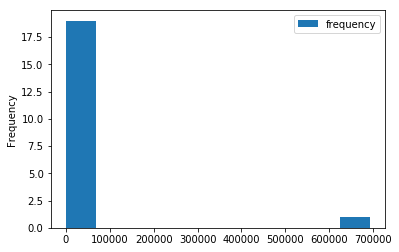

In [26]:
gre_histogram = df_totalTime.select('total_time').rdd.flatMap(lambda x: x).histogram(20)
# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*gre_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='hist');

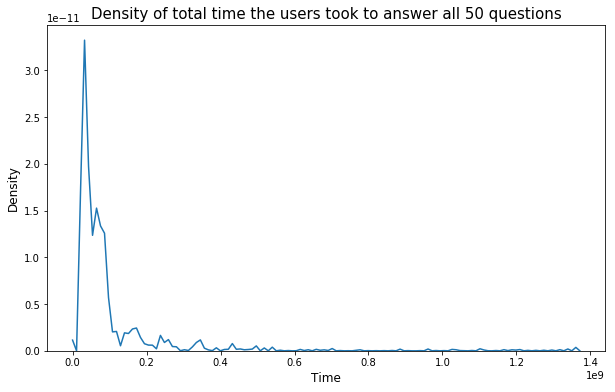

In [28]:
import seaborn as sns
y_total_time = [val.total_time for val in df_totalTime.select('total_time').collect()]
plt.figure(figsize = (10, 6))
ax = sns.kdeplot(y_total_time)    
plt.title("Density of total time the users took to answer all 50 questions", fontsize = 15)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

### Finding which countries most participants are from
#### Using Pyspark SQL

In [10]:
dfc = df.groupBy("country").count().orderBy(F.desc("count"))
dfc.show()

+-------+------+
|country| count|
+-------+------+
|     US|355225|
|     GB| 49490|
|     CA| 44215|
|     AU| 34414|
|     DE| 11841|
|     PH| 11729|
|     IN| 10982|
|   NONE|  9451|
|     MX|  8871|
|     NO|  8144|
|     NL|  7816|
|     SE|  7442|
|     MY|  7348|
|     NZ|  6521|
|     SG|  5456|
|     ID|  5333|
|     BR|  5142|
|     FR|  4967|
|     IT|  4157|
|     ES|  4026|
+-------+------+
only showing top 20 rows



#### Using RDDs

In [11]:
rdd = df.rdd.map(tuple)
rddc = rdd.map(lambda x : (x[-4], 1)).reduceByKey(lambda i,j: i+j) # Get RDD of countries
rddc.takeOrdered(20, key = lambda i : -i[1])

[(u'US', 355225),
 (u'GB', 49490),
 (u'CA', 44215),
 (u'AU', 34414),
 (u'DE', 11841),
 (u'PH', 11729),
 (u'IN', 10982),
 (u'NONE', 9451),
 (u'MX', 8871),
 (u'NO', 8144),
 (u'NL', 7816),
 (u'SE', 7442),
 (u'MY', 7348),
 (u'NZ', 6521),
 (u'SG', 5456),
 (u'ID', 5333),
 (u'BR', 5142),
 (u'FR', 4967),
 (u'IT', 4157),
 (u'ES', 4026)]

We observe that English speaking countries are the most popular, with the US having a significantly higher number of test-takers than any other country.

#### Summary statistics

In [31]:
from pyspark.mllib.stat import Statistics
summary = Statistics.colStats(rdd.map(lambda x : x[0:100]))
print(summary.mean())
print(summary.variance())
print(summary.numNonzeros())

[2.58990781e+00 2.83512347e+00 3.24721339e+00 3.20680148e+00
 3.26151534e+00 2.41507429e+00 2.72576191e+00 3.46284284e+00
 2.95916524e+00 3.60924938e+00 3.30351220e+00 3.17858448e+00
 3.87073739e+00 2.67058206e+00 2.84887169e+00 2.86446087e+00
 3.05459736e+00 2.69227229e+00 3.09630802e+00 2.83982223e+00
 2.23199384e+00 3.85962692e+00 2.26535546e+00 3.95099311e+00
 2.29858189e+00 3.76361518e+00 2.22821125e+00 3.69427433e+00
 3.79783112e+00 3.60650808e+00 3.32956033e+00 2.98783529e+00
 4.00850868e+00 2.64155964e+00 2.60111033e+00 2.85144328e+00
 3.73648837e+00 2.47979404e+00 3.17766543e+00 3.63627839e+00
 3.76874685e+00 2.02435674e+00 4.06232651e+00 1.95443340e+00
 3.83924262e+00 1.87953947e+00 4.05777445e+00 3.27737778e+00
 4.21701017e+00 4.00046743e+00 1.01389628e+05 8.47108268e+03
 8.94967826e+03 7.58919625e+03 7.52424257e+03 5.96961226e+03
 7.79819594e+03 6.82901222e+03 5.68577044e+03 5.34656710e+03
 9.93584730e+03 8.92953945e+03 7.01494554e+03 1.06258112e+04
 7.59477711e+03 8.125781

### Finding which questions took the longest to answer

#### Using Pyspark SQL

In [56]:
x = df.select(df.columns[50:100]).groupBy().sum().collect()
print(x)

[Row(sum(EXT1_E)=98335348944, sum(EXT2_E)=8454135800, sum(EXT3_E)=11799067450, sum(EXT4_E)=7749025041, sum(EXT5_E)=7240846048, sum(EXT6_E)=7554577642, sum(EXT7_E)=11046998175, sum(EXT8_E)=7134619001, sum(EXT9_E)=6241230881, sum(EXT10_E)=7517958370, sum(EST1_E)=9562113656, sum(EST2_E)=9372498851, sum(EST3_E)=7833529896, sum(EST4_E)=13017952300, sum(EST5_E)=10515153667, sum(EST6_E)=8233450213, sum(EST7_E)=7204178961, sum(EST8_E)=8050652552, sum(EST9_E)=5599428334, sum(EST10_E)=4819599038, sum(ARG1_E)=18519335610, sum(ARG2_E)=8918285594, sum(ARG3_E)=6725623563, sum(ARG4_E)=9168219418, sum(ARG5_E)=11331052993, sum(ARG6_E)=6340602413, sum(ARG7_E)=8360540505, sum(ARG8_E)=9077498667, sum(ARG9_E)=5438377294, sum(ARG10_E)=6128320325, sum(CSN1_E)=12463385496, sum(CSN2_E)=10393054211, sum(CSN3_E)=9189411334, sum(CSN4_E)=9322766186, sum(CSN5_E)=9157552115, sum(CSN6_E)=11884822321, sum(CSN7_E)=5632295052, sum(CSN8_E)=11289437120, sum(CSN9_E)=5506132263, sum(CSN10_E)=10934968140, sum(OPN1_E)=8501032

In [57]:
a = list((x[0]))
print (sorted((e, i) for i, e in enumerate(a)))

[(4819599038, 19), (5408660331, 49), (5438377294, 28), (5497482672, 47), (5506132263, 38), (5599428334, 18), (5632295052, 36), (6128320325, 29), (6241230881, 8), (6340602413, 25), (6367007869, 44), (6411567145, 48), (6725623563, 22), (7134619001, 7), (7204178961, 16), (7240846048, 4), (7288316795, 42), (7517958370, 9), (7554577642, 5), (7749025041, 3), (7793741689, 46), (7833529896, 12), (8050652552, 17), (8233450213, 15), (8360540505, 26), (8368520160, 45), (8454135800, 1), (8501032421, 40), (8918285594, 21), (9077498667, 27), (9157552115, 34), (9168219418, 23), (9189411334, 32), (9322766186, 33), (9372498851, 11), (9562113656, 10), (10393054211, 31), (10515153667, 14), (10934968140, 39), (11046998175, 6), (11289437120, 37), (11331052993, 24), (11799067450, 2), (11884822321, 35), (12463385496, 30), (13017952300, 13), (13190917103, 41), (13469910324, 43), (18519335610, 20), (98335348944, 0)]


#### So question 0, 20, and 43 took the longest times to answer.
0 corresponds to EXT1 I am the life of the party. It is also likely extra time was spent on this question simply due to it being the first one asked.

20 corresponds to AGR1 I feel little concern for others.

43 corresponds to OPN4 I am not interested in abstract ideas.

#### Question 19 took the shortest time followed by questions 49 and 28.

19 corresponds to EST10 I often feel blue.

49 corresponds to OPN10 I am full of ideas.

28 corresponds to AGR9 I feel others' emotions.

#### Using RDDs to answer the same question.

In [58]:
rddt = rdd.map(lambda x : x[50:100]).reduce(lambda x,y: [x[i]+y[i] for i in range(50)])
print (sorted((e, i) for i, e in enumerate(rddt)))

[(4819599038, 19), (5408660331, 49), (5438377294, 28), (5497482672, 47), (5506132263, 38), (5599428334, 18), (5632295052, 36), (6128320325, 29), (6241230881, 8), (6340602413, 25), (6367007869, 44), (6411567145, 48), (6725623563, 22), (7134619001, 7), (7204178961, 16), (7240846048, 4), (7288316795, 42), (7517958370, 9), (7554577642, 5), (7749025041, 3), (7793741689, 46), (7833529896, 12), (8050652552, 17), (8233450213, 15), (8360540505, 26), (8368520160, 45), (8454135800, 1), (8501032421, 40), (8918285594, 21), (9077498667, 27), (9157552115, 34), (9168219418, 23), (9189411334, 32), (9322766186, 33), (9372498851, 11), (9562113656, 10), (10393054211, 31), (10515153667, 14), (10934968140, 39), (11046998175, 6), (11289437120, 37), (11331052993, 24), (11799067450, 2), (11884822321, 35), (12463385496, 30), (13017952300, 13), (13190917103, 41), (13469910324, 43), (18519335610, 20), (98335348944, 0)]


## K-means and K-means ++

### How does the K-means algorithm work?

The objective of the K-Means algorithm is to minimise the sum of distances between points and their respective cluster centroid.
We call this sum the cost/potential let us denote this with P. 

$P = \sum \substack{\text  {min c in C}} (X_i-c)^2$

Where $X_i$ is a point, and C is the set of clusters.
 
1. Choose the number of clusters and select k random points from the data as centroids.
2. Assign each of the points to their closest cluster centroid.
3. Recompute the centroids of newly formed clusters.
4. Repeat steps 2 and 3 till either, points remain in the same cluster and centroids do not change, or the maximum number of iterations are reached.

The k-means algorithm has two major theoretic shortcomings:
1.	The lower bound construction for which the running time of k-means is superpolynomial.
2.	The approximation found can be arbitrarily bad with respect to the objective function compared to the optimal clustering.

Below is an animated demonstration of the second shortcoming.

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(8, 4))
col = [1, 2, 3, 4, 5, 6]
def draw_chart(k): 
    ax.clear()
    ax.plot([0], [0], marker='o', markersize=10, color="red")
    ax.plot([0], [1], marker='o', markersize=10, color="blue")
    ax.plot([2*k], [0], marker='o', markersize=10, color="red")
    ax.plot([2*k], [1], marker='o', markersize=10, color="blue")
    ax.plot([k], [0], marker='x', markersize=10, color="black", label='Centroid 1')
    ax.plot([k], [1], marker='x', markersize=10, color="black", label='Centroid 2')
animator = animation.FuncAnimation(fig, draw_chart, frames=col, interval = 500)
plt.close()                # Plot may not display without running this block of code
HTML(animator.to_jshtml()) # Only this block needs to be run

If both points on the left (or both points on the right) were selected as our initial centroids the K-means algorithm immediately converges. This is problematic, as our approximation can become arbitrarily bad as shown above. The optimal solution is shown below.

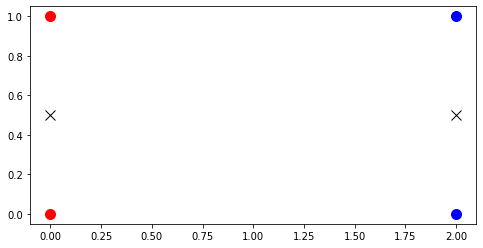

In [60]:
plt.figure(figsize=(8,4))
plt.plot([0], [0], marker='o', markersize=10, color="red")
plt.plot([0], [1], marker='o', markersize=10, color="red")
plt.plot([2], [0], marker='o', markersize=10, color="blue")
plt.plot([2], [1], marker='o', markersize=10, color="blue")
plt.plot([0], [0.5], marker='x', markersize=10, color="black", label='Centroid 1')
plt.plot([2], [0.5], marker='x', markersize=10, color="black", label='Centroid 2')

The K-means ++ algorithm was created to address the second shortcoming, it produces a result which is O(log k)-competitive with the optimal clustering. In particular:

$E(P) \leq 8*(ln(k)+2)*P_{optimal}$

It does this by altering the way the points are initialised.

1.	The first point is chosen uniformly at random.
2.	Compute $\lvert \lvert X_i - c \rvert \rvert$ for each data point x, which is the distance from x to its nearest centroid already chosen.
3.	Choose a new data point as the next centroid, choose a point x is with probability $\frac{\lvert \lvert (X_i - c)^2 \rvert \rvert}{\sum_{i} \lvert \lvert (X_i - c)^2 \rvert \rvert}$.
4.	Repeat steps 2 and 3 until we have chosen k centroids.
5.	Then proceed with the normal k means.

Intuitively, this initialisation method utilises the fact that a good clustering is relatively spread out. Below are some empirical results from reference [3]

![Final Results](Project_pictures/kmeans1.png)

### Drawbacks of K-means
K-means assumes a spherical shape of clusters, ie objects within the same category have similar scores across all dimensions. K-means may still cluster data even if is data is from a uniform distribution.

## Applying K-means to the data
We only use answers to the 50 questions to cluster people.

In [7]:
df1 = df.select(df.columns[:50]) # Creating a dataframe of only the answers to the questions

In [8]:
display(df1)

DataFrame[EXT1: int, EXT2: int, EXT3: int, EXT4: int, EXT5: int, EXT6: int, EXT7: int, EXT8: int, EXT9: int, EXT10: int, EST1: int, EST2: int, EST3: int, EST4: int, EST5: int, EST6: int, EST7: int, EST8: int, EST9: int, EST10: int, ARG1: int, ARG2: int, ARG3: int, ARG4: int, ARG5: int, ARG6: int, ARG7: int, ARG8: int, ARG9: int, ARG10: int, CSN1: int, CSN2: int, CSN3: int, CSN4: int, CSN5: int, CSN6: int, CSN7: int, CSN8: int, CSN9: int, CSN10: int, OPN1: int, OPN2: int, OPN3: int, OPN4: int, OPN5: int, OPN6: int, OPN7: int, OPN8: int, OPN9: int, OPN10: int]

In [9]:
print(df1.schema.names)

['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'ARG1', 'ARG2', 'ARG3', 'ARG4', 'ARG5', 'ARG6', 'ARG7', 'ARG8', 'ARG9', 'ARG10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']


In [9]:
from pyspark.ml.feature import VectorAssembler 
# Creating a features column where each entry is a vector of all 50 answers
vecAssembler = VectorAssembler(inputCols=df1.schema.names, outputCol="features")
new_df = vecAssembler.transform(df1)
new_df.show(5)

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+--------------------+
|EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|ARG1|ARG2|ARG3|ARG4|ARG5|ARG6|ARG7|ARG8|ARG9|ARG10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|            features|
+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+--------------------+
|   4|   1|   5|   2|   5|   1|   5|   2|   4|    1|   1|   4|   4|   2|   2|   2|   2|   2|   3|    2|   2|   5|   2|   4|   2|   3|   2|   4|   3|    4|   3|   4|  

### Getting a correlation matrix of each column

In [10]:
from pyspark.ml.stat import Correlation
data = new_df.select('features')
r = Correlation.corr(data, 'features').head()
print("Pearson correlation matrix:\n" + str(r[0]))

Pearson correlation matrix:
DenseMatrix([[ 1.        , -0.4738788 ,  0.47441101, ...,  0.01546372,
              -0.07996207,  0.1609082 ],
             [-0.4738788 ,  1.        , -0.45647765, ..., -0.04450278,
               0.05331047, -0.14190003],
             [ 0.47441101, -0.45647765,  1.        , ..., -0.04953255,
              -0.07950495,  0.11066134],
             ...,
             [ 0.01546372, -0.04450278, -0.04953255, ...,  1.        ,
               0.19424268,  0.27517324],
             [-0.07996207,  0.05331047, -0.07950495, ...,  0.19424268,
               1.        ,  0.23312853],
             [ 0.1609082 , -0.14190003,  0.11066134, ...,  0.27517324,
               0.23312853,  1.        ]])


## Principal component analysis visualisation

In [12]:
from pyspark.ml.feature import PCA
# Using PCA to reduce feature space, not sure if necessary
pca = PCA(k = 30, inputCol = 'features', outputCol = 'pcaFeatures')
modelp = pca.fit(data)
pca.fit(data)

PCA_4cee99fe616ed4cdd6bd

In [13]:
pca_data = modelp.transform(data).select('pcaFeatures')
pca_data.show()

+--------------------+
|         pcaFeatures|
+--------------------+
|[-4.3283179845464...|
|[1.45429850483688...|
|[0.55704530734771...|
|[2.29003992025255...|
|[-3.5533803557161...|
|[-1.4643606732086...|
|[-0.4021769003736...|
|[-5.8536257078926...|
|[6.28445708669202...|
|[3.32693533714780...|
|[1.01864493483916...|
|[-3.3801554698178...|
|[5.30002361978660...|
|[2.05344418516455...|
|[5.28375717389773...|
|[-0.5841399659606...|
|[4.19848750435628...|
|[2.98592717849815...|
|[1.66620828892503...|
|[7.91711497141406...|
+--------------------+
only showing top 20 rows



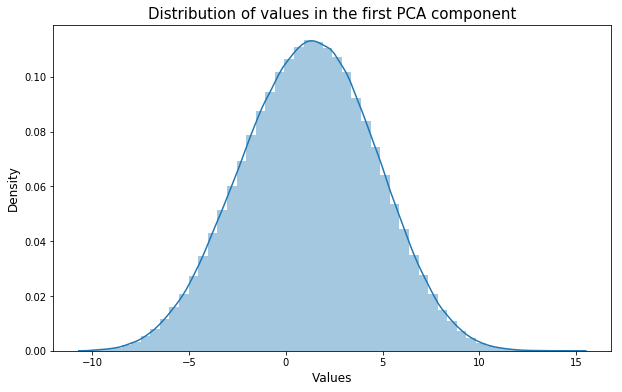

In [13]:
import seaborn as sns
y_ans_val = [(val.pcaFeatures)[0] for val in pca_data.select('pcaFeatures').collect()]
plt.figure(figsize = (10, 6))
ax = sns.distplot(y_ans_val)    
plt.title("Distribution of values in the first PCA component", fontsize = 15)
plt.ylabel("Density", fontsize = 12)
plt.xlabel("Values", fontsize = 12)
plt.show()

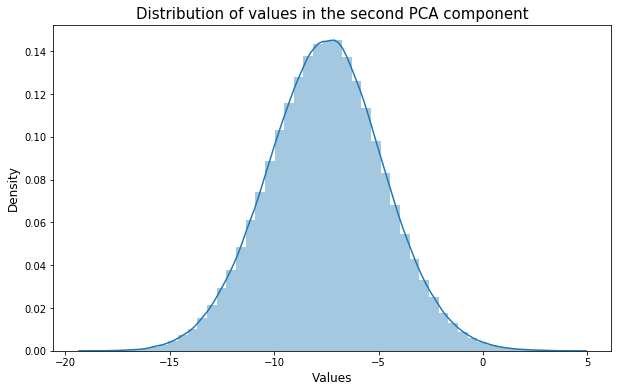

In [14]:
y_ans_val = [(val.pcaFeatures)[1] for val in pca_data.select('pcaFeatures').collect()]
plt.figure(figsize = (10, 6))
ax = sns.distplot(y_ans_val)    
plt.title("Distribution of values in the second PCA component", fontsize = 15)
plt.ylabel("Density", fontsize = 12)
plt.xlabel("Values", fontsize = 12)
plt.show()

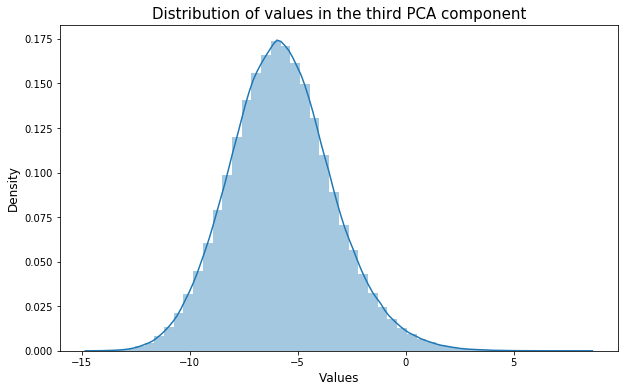

In [14]:
import seaborn as sns
y_ans_val = [(val.pcaFeatures)[2] for val in pca_data.select('pcaFeatures').collect()]
plt.figure(figsize = (10, 6))
ax = sns.distplot(y_ans_val)    
plt.title("Distribution of values in the third PCA component", fontsize = 15)
plt.ylabel("Density", fontsize = 12)
plt.xlabel("Values", fontsize = 12)
plt.show()

## Finding the right number of clusters
### Generating the "elbow curve" to identify the ideal number of clusters.
We do not need to scale the data as all of the data is on the same scale (all answers are on a scale from 1-5). Also we will be using the full 50 columns rather than the 30 PCA columns. We will test for cluster sizes between 2 and 72.

In [11]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import time
data = new_df.select('features')

('2', ':', 43324259.163511835, '--- 30.9767901897 seconds ---')
('3', ':', 41028535.63660797, '--- 15.1583490372 seconds ---')
('4', ':', 39470063.06711024, '--- 15.5679068565 seconds ---')
('5', ':', 38330884.292401776, '--- 16.0240018368 seconds ---')
('6', ':', 37685872.51718607, '--- 16.9666581154 seconds ---')
('7', ':', 36969925.951776676, '--- 17.0334708691 seconds ---')
('8', ':', 36496234.51203636, '--- 17.2803199291 seconds ---')
('9', ':', 36005189.12764616, '--- 17.7426948547 seconds ---')
('10', ':', 35527858.04510354, '--- 18.2739350796 seconds ---')
('11', ':', 35173394.93596523, '--- 18.9532968998 seconds ---')
('12', ':', 34816887.58196498, '--- 19.0134279728 seconds ---')
('13', ':', 34573620.07964118, '--- 19.4645409584 seconds ---')
('14', ':', 34280448.27349721, '--- 20.2641911507 seconds ---')
('15', ':', 34036120.92789868, '--- 20.8880300522 seconds ---')
('16', ':', 33805194.80573564, '--- 21.036894083 seconds ---')
('17', ':', 33633505.06260659, '--- 21.1052470

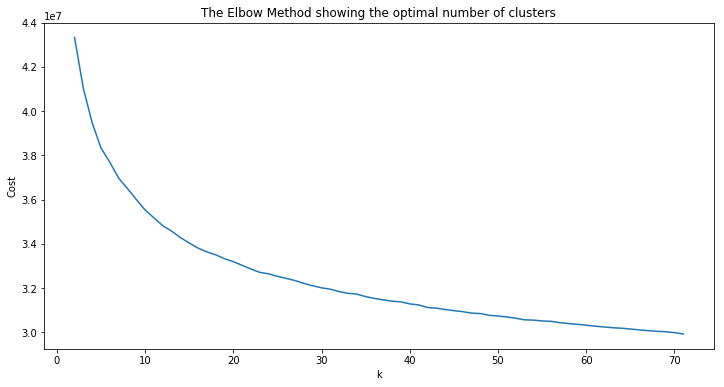

In [ ]:
# To get optimal number of clusters
start_time = time.time()
cost = [0 for i in range(70)]

for i in range(2,72):
    start = time.time()
    kmeans = KMeans(k=i, seed=1)
    model = kmeans.fit(data)
    cost[i-2] = model.computeCost(data)
    print(str(i), ":", cost[i-2], "--- %s seconds ---" % (time.time() - start))
    
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize = (12, 6))
plt.plot([i for i in range(2,72)], cost)
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

#### The curve does not show any obvious elbow point where the curve starts to flatten out. So we will evaluate both algorithms for cluster sizes 5, 10, 20 and 30.

## Spark implementation - Scalable K-means ++ called K-means||.
A major downside of the K-means++ is its sequential nature, which limits its applicability to enormous datasets as we must make k passes over the data to find a good initial set of centres. This initialisation is not apparently parallelisable, while the rest of the algorithm (i.e., Lloyd’s iterations) can be implemented in a parallel environment like MapReduce.
The proposed initialisation algorithm [4] K-means|| obtains a nearly optimal solution after a logarithmic number of passes, and usually, in practice, a constant number of passes is enough.

How this is different.
1.	Sample the first point uniformly, and set v to be the current total potential/cost (P) of all the points.
2.	For log(v) rounds we sample each x with probability $\frac{\lvert \lvert l*(X_i - c)^2 \rvert \rvert}{\sum_{i} \lvert \lvert (X_i - c)^2 \rvert \rvert}$. An expected number of l points are taken each round.
3.	We recalculate the P and repeat, at the end of the process, the expected number of points in C (the set of centroids) is $l* log (v)$.
4.	For each point x in C, we set $W_x$ to be the number of points in the data closer to x than any other point in C.
5.	Then re-cluster the weighted points in C into k clusters. As C is significantly smaller than the input size; the re-clustering can be done quickly.



## Evaluating the performance of K-means and K-means||

As this is an unsupervised learning problem (one without predictor values) we are more limited in our evaluation methods.

One technique is to use Silhouette analysis.
For this we:
1. Calculate the average distance from all data points in the same cluster $A_i$.
2. Calculate the average distance from all data points in the next closest cluster $B_i$.
3. Calculate $\frac{B_i - A_i}{\max{(A_i, B_i)} }$

If this coefficient is close to 1 we have a good cluster that is well separated, while a score near 0 tells us the sample is close to neighbouring clusters.

### We start looking at the difference for 20 clusters.
#### Normal K-means

In [16]:
start_time = time.time()
# Trains a k-means model.
kmeans_normal = KMeans(k=20, seed=1)
model = kmeans_normal.fit(data)
model1 = kmeans_normal.fit(data)
# Make predictions
predictions = model.transform(data)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

print("--- %s seconds ---" % (time.time() - start_time))

Silhouette with squared euclidean distance = 0.065313307128
Cluster Centers: 
[2.90160335 2.47783486 3.96629656 2.81356424 3.80821975 2.24205577
 3.2590007  3.44848158 2.92184199 3.18720222 2.91289307 3.48612089
 3.66847578 3.04051871 2.44976592 2.2478767  2.27836931 1.84759912
 2.37071716 1.94085843 1.93074947 4.23700128 1.56363674 4.32932842
 1.89489166 4.09319717 1.75626631 4.05064838 4.10751129 3.97713055
 3.79241414 2.17841902 4.14852716 1.82046236 3.39029291 1.96095207
 4.0374943  1.98019638 3.8459212  3.73055889 3.14181547 2.48518871
 3.42878154 2.43725401 3.59520653 2.24336082 3.87075859 2.37589593
 3.84297966 3.57710155]
[2.18110456 3.14587982 2.21377909 3.6223701  2.59730634 2.50633567
 2.02605993 3.50342684 2.92476889 4.16887153 4.09208639 2.50342684
 4.32507172 2.04379184 3.41289449 3.77470513 4.15954734 3.96736532
 4.24207045 3.97832324 3.43465094 2.84870099 3.6355196  2.59352088
 3.57395601 2.77625916 3.48697004 2.66875199 2.59228562 2.75773032
 2.6858862  3.70688556 3.88

In [17]:
start_time = time.time()
kmeans1 = KMeans(k=20, initMode='k-means||', initSteps=2, tol=0.0001, seed=None) # Kmeans ++
model = kmeans1.fit(data)
model2 = kmeans1.fit(data)
# Make predictions
predictions = model.transform(data)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

print("--- %s seconds ---" % (time.time() - start_time))

Silhouette with squared euclidean distance = 0.0646296200421
Cluster Centers: 
[3.74153459 1.56680627 4.00711724 2.14053817 4.3052476  1.57926145
 4.02493772 2.39358353 4.08611864 2.5757302  3.92702089 2.87843202
 4.3140894  2.26123019 3.37625578 3.66387452 4.02384276 3.70811092
 3.74254743 3.35731297 1.9468123  4.48326079 2.81339137 4.30015603
 1.84117599 4.10886644 1.66406614 3.95778927 4.23478689 3.94341792
 2.42123128 4.23798965 3.54290876 3.80613725 1.68424078 4.21650105
 3.01073061 3.16911664 2.37494183 3.1895924  3.86537461 2.00594016
 4.39949632 1.82190468 4.00271003 1.64224905 3.97270811 3.4732419
 4.24472366 4.30905259]
[1.86779774 3.65176715 2.4786531  3.70745471 2.23489011 3.54985892
 1.84084497 3.81322394 2.25245025 4.10046035 3.17552718 3.21391446
 3.53653104 2.70652658 2.93525394 2.8281482  2.94186219 2.61297149
 3.15039353 2.90206415 2.98418473 2.83070983 2.55297743 3.00363825
 3.14846302 3.1200995  3.15763291 2.91219929 2.75712801 2.81107069
 2.65536828 3.03693941 3.18

In [19]:
wssse_k3 = model1.computeCost(data)
wssse_k2 = model2.computeCost(data)
print("With Kmeans")
print("Within Set Sum of Squared Errors = " + str(wssse_k3))
print('--'*30)
print("With Kmeans||")
print("Within Set Sum of Squared Errors = " + str(wssse_k2))

With Kmeans
Within Set Sum of Squared Errors = 33191345.973
------------------------------------------------------------
With Kmeans||
Within Set Sum of Squared Errors = 33154109.9866


#### Findings
With Kmeans|| the cost is very slightly better, this means the points within each cluster are very slightly closer together. However, the Silhouette coefficient is slightly worse, this means that the clusters are slightly closer together. However, these differences are minimal and most likely due to the random error.

#### Number of points in each cluster.

In [21]:
# K-Means
model1.transform(data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|        12|38003|
|         1|25110|
|        13|23097|
|         6|30864|
|        16|35898|
|         3|27497|
|         5|36956|
|        19|36025|
|        15|24927|
|         9|37567|
|        17|37065|
|         4|44825|
|         8|36853|
|         7|33013|
|        10|35293|
|        11|38591|
|        14|27685|
|         2|41862|
|         0|48267|
|        18|35892|
+----------+-----+



In [22]:
# K-Means||
model2.transform(data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|        12|24001|
|         1|26660|
|        13|42777|
|         6|39057|
|        16|36305|
|         3|33952|
|         5|28620|
|        19|40641|
|        15|43571|
|         9|34504|
|        17|31257|
|         4|36967|
|         8|41516|
|         7|37943|
|        10|34594|
|        11|41568|
|        14|23835|
|         2|29132|
|         0|36559|
|        18|31831|
+----------+-----+



##### Taking a look at the number of points in each cluster, there does not seem to be any significant differences between the algorithms.
### Comparing for cluster sizes 5, 10, 20 and 30.

In [15]:
evaluator = ClusteringEvaluator()
cost_k = []
sil_k =[]
for i in [5, 10, 20, 30]:
    print ("Cluster size:", str(i))
    start_time = time.time()  
    kmeans_normal = KMeans(k=i, seed=1)
    model1 = kmeans_normal.fit(data)
    # Make predictions
    predictions = model1.transform(data)
    # Evaluate clustering by computing Silhouette score
    cost = model1.computeCost(data) 
    silhouette = evaluator.evaluate(predictions)
    cost_k.append(cost)
    sil_k.append(silhouette)
    print("Silhouette with squared euclidean distance = " + str(silhouette))
    print("Cost = " + str(cost))
    print("For", str(i), "clusters", "--- %s seconds ---" % (time.time() - start_time))

('Cluster size:', '5')
Silhouette with squared euclidean distance = 0.115334426732
Cost = 38330884.2924
('For', '5', 'clusters', '--- 26.8951759338 seconds ---')
('Cluster size:', '10')
Silhouette with squared euclidean distance = 0.0882474392865
Cost = 35527858.0451
('For', '10', 'clusters', '--- 29.6417257786 seconds ---')
('Cluster size:', '20')
Silhouette with squared euclidean distance = 0.065313307128
Cost = 33191345.973
('For', '20', 'clusters', '--- 34.9018580914 seconds ---')
('Cluster size:', '30')
Silhouette with squared euclidean distance = 0.0549372331866
Cost = 32009356.4315
('For', '30', 'clusters', '--- 40.7251870632 seconds ---')


In [16]:
evaluator = ClusteringEvaluator()
cost_k1 = []
sil_k1 =[]
for i in [5, 10, 20, 30]:
    print ("Cluster size:", str(i))
    start_time = time.time()  
    kmeans1 = KMeans(k=i, initMode='k-means||', initSteps=3, seed=None) # Kmeans ++
    model2 = kmeans1.fit(data)
    # Make predictions
    predictions = model2.transform(data)
    # Evaluate clustering by computing Silhouette score
    cost = model2.computeCost(data)
    silhouette = evaluator.evaluate(predictions)
    cost_k1.append(cost)
    sil_k1.append(silhouette)
    print("Silhouette with squared euclidean distance = " + str(silhouette))
    print("Cost = " + str(cost))
    print("For", str(i), "clusters", "--- %s seconds ---" % (time.time() - start_time))

('Cluster size:', '5')
Silhouette with squared euclidean distance = 0.115761193984
Cost = 38399456.2889
('For', '5', 'clusters', '--- 26.8686060905 seconds ---')
('Cluster size:', '10')
Silhouette with squared euclidean distance = 0.0878736017782
Cost = 35494879.9253
('For', '10', 'clusters', '--- 30.6483089924 seconds ---')
('Cluster size:', '20')
Silhouette with squared euclidean distance = 0.0668766134722
Cost = 33105510.9523
('For', '20', 'clusters', '--- 36.3513889313 seconds ---')
('Cluster size:', '30')
Silhouette with squared euclidean distance = 0.0545650078295
Cost = 32030046.5016
('For', '30', 'clusters', '--- 42.6768240929 seconds ---')


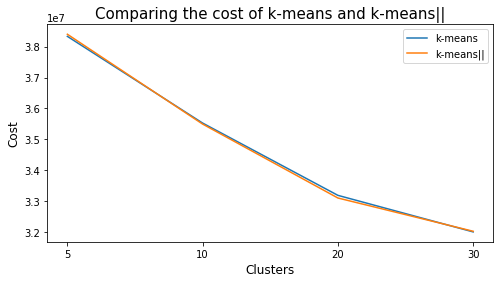

In [26]:
plt.figure(figsize=(8,4))
plt.plot(cost_k, label='k-means')
plt.plot(cost_k1, label='k-means||')
x = [5, 10, 20, 30]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title("Comparing the cost of k-means and k-means||", fontsize = 15)
plt.ylabel("Cost", fontsize = 12)
plt.xlabel("Clusters", fontsize = 12)
plt.legend()

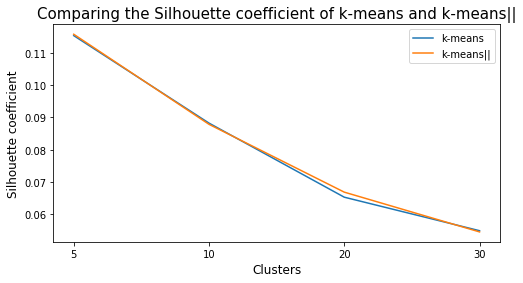

In [41]:
plt.figure(figsize=(8,4))
plt.plot(sil_k, label='k-means')
plt.plot(sil_k1, label='k-means||')
x = [5, 10, 20, 30]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title("Comparing the Silhouette coefficient of k-means and k-means||", fontsize = 15)
plt.ylabel("Silhouette coefficient", fontsize = 12)
plt.xlabel("Clusters", fontsize = 12)
plt.legend()

#### Looking at the two graphs there does not seem any significant difference in performance between the two algorithms. 

## Comparing run time

### Test 1
For this test, we are going to record the time in seconds of how long it takes to repeat five iterations of each algorithm. We will also test the effect of it being run on the local machine vs on the GCP with a varying number of nodes.

In [35]:
import pandas as pd

data_5reps = {' Local':  [379, 394, 502, 719, 320, 350, 406, 510], # Local Machine
        'GCP 2': [157, 159, 184, 208, 156, 165, 188, 200], # GCP 2 nodes
         'GCP 3': [149, 155, 180, 206, 152, 151, 184 ,198], # GCP 3 nodes
        'GCP 4': [139, 144, 173, 202, 138, 145, 173, 185], # GCP 4 nodes        
        'GCP 5': [156, 152, 176, 204, 150, 147, 177, 200], # GCP 5 nodes
        'GCP 2+': [84, 86, 100, 117, 82, 85, 99, 110], # GCP 2 nodes with E2 CPU (More powerful than standard CPU)
        }
df5 = pd.DataFrame(data_5reps, index=['K-means (k=5)','K-means (k=10)','K-means (k=20)','K-means (k=30)', 
                                     'K-means|| (k=5)','K-means|| (k=10)','K-means|| (k=20)','K-means|| (k=30)'])
df5.head(8)

Local  GCP 2  GCP 2+  GCP 3  GCP 4  GCP 5
K-means (k=5)        379    157      84    149    139    156
K-means (k=10)       394    159      86    155    144    152
K-means (k=20)       502    184     100    180    173    176
K-means (k=30)       719    208     117    206    202    204
K-means|| (k=5)      320    156      82    152    138    150
K-means|| (k=10)     350    165      85    151    145    147
K-means|| (k=20)     406    188      99    184    173    177
K-means|| (k=30)     510    200     110    198    185    200

Text(0.5,1,u'K = 30')

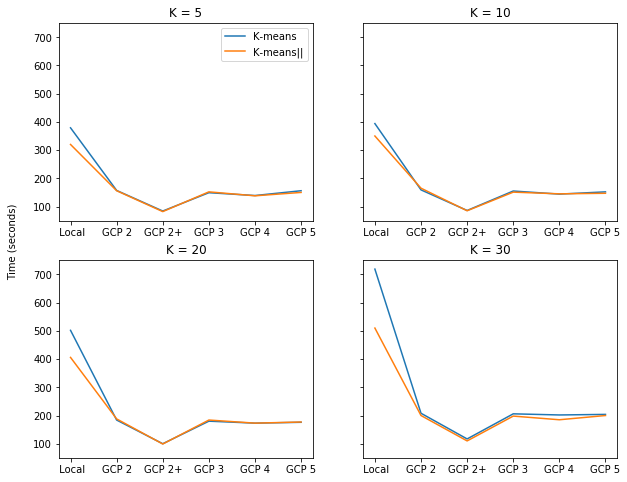

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(10,8),  sharex=False,  sharey=True)
fig.text(0.06, 0.5, 'Time (seconds)', ha='center', va='center', rotation='vertical')
axs[0, 0].plot(df5.iloc[[0,4],:].T)
axs[0, 0].legend(['K-means', 'K-means||'])
axs[0, 0].set_title('K = 5')
axs[0, 1].plot(df5.iloc[[1,5],:].T)
axs[0, 1].set_title('K = 10')
axs[1, 0].plot(df5.iloc[[2,6],:].T)
axs[1, 0].set_title('K = 20')
axs[1, 1].plot(df5.iloc[[3,7],:].T)
axs[1, 1].set_title('K = 30')

From the graphs above we can see that only for the Local machine is the K-means|| significantly faster than the standard K-means algorithm. Interestingly as the number of clusters increases, this difference is more apparent, however on the GCP, there is no significant difference in speed of both algorithms. All speeds were recorded from my ProjectTimeTester5.ipynb file.

### Test 2
For this test, we made the data 10 times larger and test run times of each algorithm on this larger dataset, which included around seven million data points.

In [37]:
data_10 = {' Local':  [896, 943, 1011, 1090, 891, 949, 1022, 1102], # Local Machine
        'GCP 2': [173, 176, 223, 273, 140, 146, 151, 160], # GCP 2 nodes
           'GCP 3': [164, 167, 193, 220, 115, 126, 139, 148], # GCP 2 nodes
        'GCP 4': [89, 93, 118, 144, 95, 100, 120, 126],  # GCP 2 nodes     
        'GCP 5': [73, 74, 92, 112, 94, 94, 95, 92], # GCP 2 nodes
        'GCP 2+': [131, 134, 139, 178, 138, 140, 141, 157] # GCP 2 nodes with E2 CPU
        }
df10 = pd.DataFrame(data_10, index=['K-means (k=5)','K-means (k=10)','K-means (k=20)','K-means (k=30)', 
                                     'K-means|| (k=5)','K-means|| (k=10)','K-means|| (k=20)','K-means|| (k=30)'])
df10.head(8)

Local  GCP 2  GCP 2+  GCP 3  GCP 4  GCP 5
K-means (k=5)        896    173     131    164     89     73
K-means (k=10)       943    176     134    167     93     74
K-means (k=20)      1011    223     139    193    118     92
K-means (k=30)      1090    273     178    220    144    112
K-means|| (k=5)      891    140     138    115     95     94
K-means|| (k=10)     949    146     140    126    100     94
K-means|| (k=20)    1022    151     141    139    120     95
K-means|| (k=30)    1102    160     157    148    126     92

Text(0.5,1,u'K = 30')

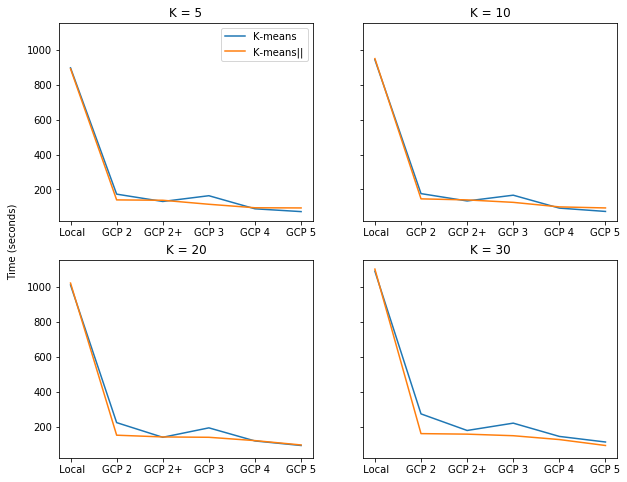

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(10,8),  sharex=False,  sharey=True)
fig.text(0.06, 0.5, 'Time (seconds)', ha='center', va='center', rotation='vertical')
axs[0, 0].plot(df10.iloc[[0,4],:].T)
axs[0, 0].legend(['K-means', 'K-means||'])
axs[0, 0].set_title('K = 5')
axs[0, 1].plot(df10.iloc[[1,5],:].T)
axs[0, 1].set_title('K = 10')
axs[1, 0].plot(df10.iloc[[2,6],:].T)
axs[1, 0].set_title('K = 20')
axs[1, 1].plot(df10.iloc[[3,7],:].T)
axs[1, 1].set_title('K = 30')

Here we observe a very large run time decrease by using the GCP rather than my local machine (GCP runs around five times as quickly). Here we observe that the K-means|| is slightly faster when using 2 and 3 GCP node, with the difference being more apparent for higher values of K. For other configurations the difference is not as apparent. Again, all speeds were recorded from my ProjectTimeTester5.ipynb file.

#### Below is the obervations in paper [4]

The key observations from the experiments are: 
1.	$log (v)$ iterations are not necessary and after as little as five rounds, the solution of k-means|| is consistently as good or better than that found by any other methods. 
2.	The parallel implementation of k-means|| is much faster than existing parallel algorithms for k-means. 
3.	The number of iterations until the normal k-means algorithm converges is smallest when using k-means|| as the seed.
The results of these observations are shown below using reference [4].

![Final Results](Project_pictures/kmeans2.png)

![Final Results](Project_pictures/kmeans3.png)

![Final Results](Project_pictures/kmeans4.png)

## Overall findings 
1. There was no clear "optimal" number of clusters to place people in, as the elbow curve did not show any kink.

2. My dataset showed no significant performance difference between K-means|| and K-means.

3. K-means|| did seem to be faster than K-means but the result was not as significant as those in the research papers.

A key reason could be that my dataset not being suitable for clustering, i.e. I am trying to cluster data that can not be clustered (the data may be from a uniform distribution or something). Observation 1 supports this finding. This may be why the results from the papers showed much more significant differences, as their data was designed for clustering tasks. 


https://openpsychometrics.org/_rawdata/ [0]

https://openpsychometrics.org/tests/IPIP-BFFM/ [1]

https://en.wikipedia.org/wiki/Big_Five_personality_traits [2]

http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf [3]

http://theory.stanford.edu/~sergei/papers/vldb12-kmpar.pdf [4]

https://en.wikipedia.org/wiki/K-means%2B%2B [5]